In [11]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(purrr)
library(tidyr)
load("ProcessData.RData")
library(tidyverse)
library(broom)
library(ggforce)
combined_df <- subset(combined_df, unique_SNVs > 500)
Hiatt <- subset(Hiatt, unique_SNVs > 500)
LeeSix <- subset(LeeSix, unique_SNVs > 500)



In [13]:
Cornish_site_SNV <- data.frame(
                       stringsAsFactors = FALSE,
  primary_tumour_site_more_specific_idx = c("cecum","asc_col","HF",
                                            "trans_col","SF","desc_col",
                                            "sig_col","RS","rectum"),
                             n_snv_Mean = c(14467,14563,14701,
                                            14747,12253,13149,12554,10686,11235),
                                 Median = c(13318,13544,12817,
                                            12867,10507,11826,10725,9496,10176),
                                Minimum = c(5008,6016,7739,5370,
                                            5449,4006,5018,4703,3402),
                                Maximum = c(43732,48510,46033,
                                            43643,23472,42561,47847,27835,42638),
                     Standard.Deviation = c(6378,6636,7974,6842,
                                            5061,7280,6289,4093,5427),
                    Interquartile.Range = c(6428,6362,5398,8255,
                                            6188,6751,5944,4270,5162),
                              n.tumours = c(158L,79L,21L,60L,21L,
                                            34L,262L,98L,173L)
)


Cornish_site_SNVs <- tibble::tribble(
  ~region_key, ~Cornish_Mean, ~Cornish_Median, ~Cornish_Minimum, ~Cornish_Maximum,
  "cecum",   14467, 13318, 5008,  43732,
  "asc_col", 14563, 13544, 6016,  48510,
  "HF",      14701, 12817, 7739,  46033,
  "trans_col",14747,12867, 5370,  43643,
  "SF",      12253, 10507, 5449,  23472,
  "desc_col",13149,11826, 4006,  42561,
  "sig_col", 12554,10725, 5018,  47847,
  "RS",      10686, 9496,  4703,  27835,
  "rectum",  11235,10176, 3402,  42638
)

# ---- DEFINE Cornish reference data.frames (numeric values — no commas) ----
Cornish_SNVs <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(14467, 14563, 14701, 14747, 12253, 13149, 12554, 10686, 11235),
  Cornish_SD   = c(6378, 6636, 7974, 6842, 5061, 7280, 6289, 4093, 5427),
  stringsAsFactors = FALSE
)

Cornish_INDELs <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(1988,1804,1615,1679,1502,1734,1452,1333,1292),
  Cornish_SD   = c(1263,712,507,714,819,920,689,593,510),
  stringsAsFactors = FALSE
)

Cornish_SBS18 <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(3807.98,3375.80,3482.71,3056.58,2309.67,2628.68,2226.31,2244.63,1916.16),
  Cornish_SD   = c(2523.83,1565.50,1402.03,2211.55,1803.30,2046.63,1790.99,1445.30,1394.51),
  stringsAsFactors = FALSE
)

Cornish_SBS1 <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(2320.16,2331.44,2239.48,2268.68,1955.38,1976.35,1853.96,1823.53,1785.93),
  Cornish_SD   = c(915.63,911.38,618.52,715.21,583.03,917.33,672.62,705.91,655.73),
  stringsAsFactors = FALSE
)

Cornish_SBS5 <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(5401.74,5432.66,5623.10,5330.62,5381.14,5006.29,4458.89,4423.61,4385.60),
  Cornish_SD   = c(2525.62,2432.57,4465.54,2432.91,2599.82,2248.67,2150.13,1451.04,1666.24),
  stringsAsFactors = FALSE
)

Cornish_ID18 <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(29.25,24.32,40.19,15.78,49.52,33.82,40.39,68.62,92.84),
  Cornish_SD   = c(142.37,111.71,175.27,64.45,125.31,94.09,129.90,124.93,170.07),
  stringsAsFactors = FALSE
)

Cornish_ID1 <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(1003.53,869.67,777.38,799.08,728.33,859.00,661.12,666.17,588.47),
  Cornish_SD   = c(1028.05,365.33,248.58,357.31,422.03,432.08,316.71,313.51,273.67),
  stringsAsFactors = FALSE
)

Cornish_ID2 <- data.frame(
  region_key = c("cecum","asc_col","HF","trans_col","SF","desc_col","sig_col","RS","rectum"),
  Cornish_Mean = c(940.35,838.67,808.86,807.33,715.90,805.65,613.67,556.61,538.84),
  Cornish_SD   = c(482.24,436.48,216.09,392.54,451.04,629.53,436.80,324.21,328.95),
  stringsAsFactors = FALSE
)
region_levels <- c("cecum","asc_col","HF",
                                            "trans_col","SF","desc_col",
                                            "sig_col","RS","rectum")

region_col <- "region"
cohort_col <- "cohort"

normalise_cohort <- function(x) {
  x0 <- ifelse(is.na(x) | x == "", NA_character_, tolower(x) %>% str_trim())
  xc <- str_replace_all(x0, "[^a-z0-9]", "")
  dplyr::case_when(
    xc %in% c("normal","n","norm","ctrl","control","healthy","nonneoplastic") ~ "normal",
    xc %in% c("adenoma","adeno","adenomatous") ~ "adenoma",
    xc %in% c("carcinoma","crc","cancer","tumour","tumor") ~ "carcinoma",
    TRUE ~ ifelse(is.na(x0), "unknown", x0)
  )
}

plot_columns <- c("unique_SNVs", "total_indels", "SBS18", "SBS1", "SBS5", "ID18", "ID1", "ID2")


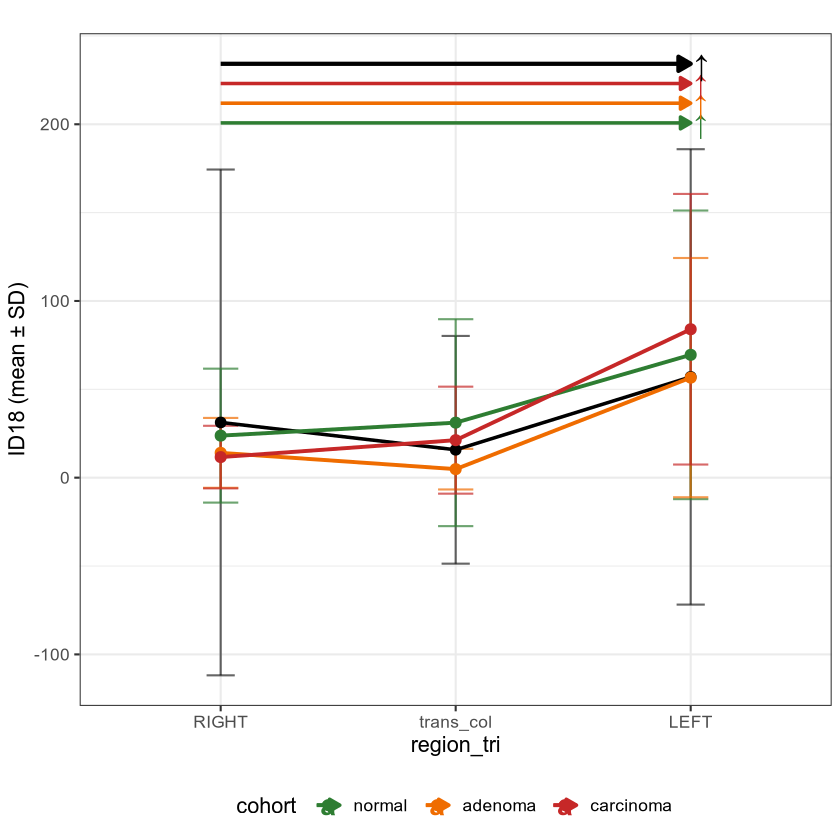

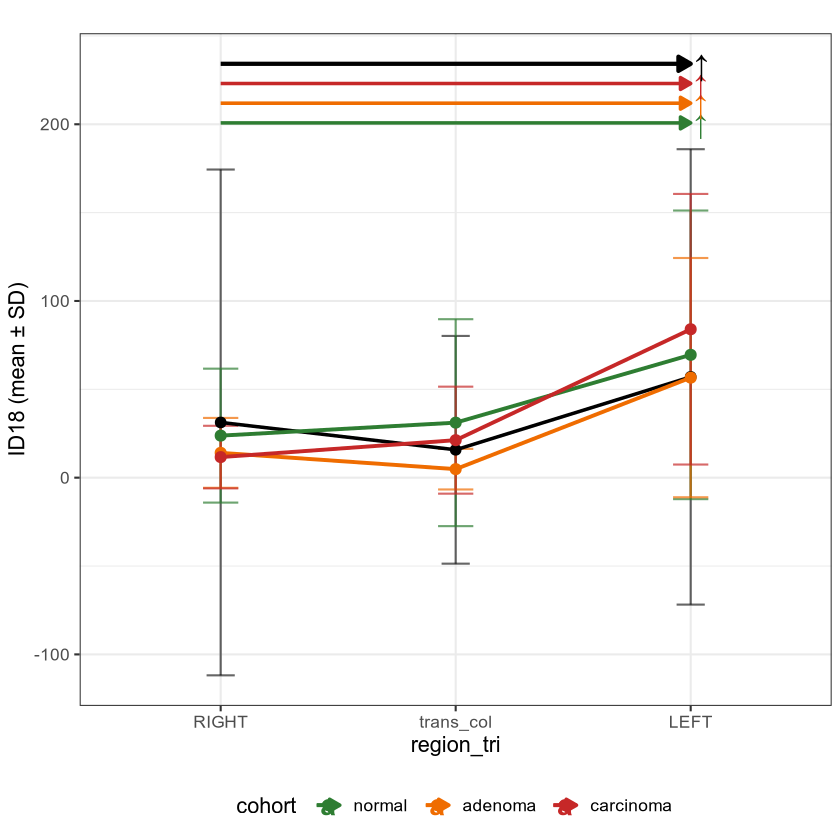

In [14]:
### from Fig 3 code if needed to grab any script

df_raw <- combined_df
# ---- collapse helper ----
collapse_to_tri <- function(x) {
  case_when(
    x %in% c("right", "cecum", "asc_col", "hf") ~ "RIGHT",
    x == "trans_col" ~ "trans_col",
    TRUE ~ "LEFT"
  )
}

df_base <- df_raw %>%
  mutate(
    region = as.character(.data[[region_col]]) |> str_trim() |> str_to_lower(),
    cohort_raw = if (cohort_col %in% names(df_raw)) as.character(.data[[cohort_col]]) else NA_character_,
    cohort = normalise_cohort(cohort_raw)
  ) %>%
  mutate(
    region = recode(
      region,
      "c"="cecum","ac"="asc_col","hc"="hf","tc"="trans_col",
      "dc"="desc_col","s"="sig_col","r"="rectum",
      .default = region
    )
  ) %>%
  mutate(
    region_tri = collapse_to_tri(region),
    region_tri = factor(region_tri, levels = c("RIGHT","trans_col","LEFT")),
    cohort = factor(cohort, levels = c("normal","adenoma","carcinoma"))
  )

df_long <- df_base %>%
  pivot_longer(
    cols = all_of(plot_columns),
    names_to = "signature",
    values_to = "value"
  )

# -------------------------------------------------
# ID18 — TRINARY REGIONS — RAW SCALE — 3 COHORTS
# -------------------------------------------------

plot_ID18_tri_same_scale <- function() {

  signature_name <- "ID18"

  tri_levels <- c("RIGHT", "trans_col", "LEFT")

  # ----------------------------
  # Filter ID18
  # ----------------------------
  df_sig <- df_long %>%
    filter(signature == signature_name)

  # Use region_tri (NOT region)
  summary_sig <- df_sig %>%
    group_by(region_tri, cohort) %>%
    summarise(
      mean = mean(value, na.rm = TRUE),
      sd   = sd(value, na.rm = TRUE),
      .groups = "drop"
    )

  summary_sig$region_tri <- factor(summary_sig$region_tri,
                                   levels = tri_levels)

  # ----------------------------
  # Cornish — collapse to tri
  # ----------------------------
  cornish_df <- Cornish_ID18 %>%
    mutate(
      region_tri = collapse_to_tri(tolower(region_key)),
      region_tri = factor(region_tri, levels = tri_levels)
    ) %>%
    group_by(region_tri) %>%
    summarise(
      Cornish_Mean = mean(Cornish_Mean, na.rm = TRUE),
      Cornish_SD   = mean(Cornish_SD, na.rm = TRUE),
      .groups = "drop"
    )

  # ----------------------------
  # Arrow height
  # ----------------------------
  max_cohort <- max(summary_sig$mean + summary_sig$sd, na.rm = TRUE)
  max_corn   <- max(cornish_df$Cornish_Mean + cornish_df$Cornish_SD, na.rm = TRUE)
  y_arrow_base <- max(max_cohort, max_corn)

  # ----------------------------
  # Cohort arrows
  # ----------------------------
  arrow_df <- summary_sig %>%
    mutate(region_num = as.numeric(region_tri)) %>%
    group_by(cohort) %>%
    filter(!is.na(region_num) & !is.na(mean)) %>%
    summarise(
      slope = if (n() > 1) coef(lm(mean ~ region_num))[2] else NA_real_,
      .groups = "drop"
    ) %>%
    mutate(
      direction = ifelse(is.na(slope) | slope <= 0, "down", "up"),
      x_from = ifelse(direction == "up", tri_levels[1], tri_levels[3]),
      x_to   = ifelse(direction == "up", tri_levels[3], tri_levels[1]),
      y = y_arrow_base * case_when(
        cohort == "normal"    ~ 1.08,
        cohort == "adenoma"   ~ 1.14,
        cohort == "carcinoma" ~ 1.20,
        TRUE                  ~ 1.08
      )
    )

  # ----------------------------
  # Cornish arrow
  # ----------------------------
  cornish_arrow <- cornish_df %>%
    mutate(region_num = as.numeric(region_tri)) %>%
    summarise(
      slope = if (n() > 1) coef(lm(Cornish_Mean ~ region_num))[2] else NA_real_
    ) %>%
    mutate(
      direction = ifelse(is.na(slope) | slope <= 0, "down", "up"),
      x_from = ifelse(direction == "up", tri_levels[1], tri_levels[3]),
      x_to   = ifelse(direction == "up", tri_levels[3], tri_levels[1]),
      y = y_arrow_base * 1.26
    )

  # ----------------------------
  # Plot
  # ----------------------------
  p <- ggplot(summary_sig,
              aes(x = region_tri, y = mean, color = cohort)) +

    # Cornish error bars
    geom_errorbar(
      data = cornish_df,
      aes(
        x = region_tri,
        ymin = Cornish_Mean - Cornish_SD,
        ymax = Cornish_Mean + Cornish_SD
      ),
      inherit.aes = FALSE,
      width = 0.12,
      linewidth = 0.6,
      alpha = 0.6,
      color = "black"
    ) +

    # Cohort error bars
    geom_errorbar(
      aes(
        ymin = mean - sd,
        ymax = mean + sd,
        group = cohort
      ),
      width = 0.15,
      linewidth = 0.6,
      alpha = 0.7
    ) +

    # Cornish line + points
    geom_line(
      data = cornish_df,
      aes(x = region_tri, y = Cornish_Mean, group = 1),
      inherit.aes = FALSE,
      color = "black",
      linewidth = 1
    ) +
    geom_point(
      data = cornish_df,
      aes(x = region_tri, y = Cornish_Mean),
      inherit.aes = FALSE,
      color = "black",
      size = 2.5
    ) +

    # Cohort lines + points
    geom_line(aes(group = cohort), linewidth = 1.1) +
    geom_point(size = 2.6) +

    # Cohort arrows
    geom_segment(
      data = arrow_df,
      aes(x = x_from, xend = x_to, y = y, yend = y, color = cohort),
      arrow = arrow(length = unit(0.25, "cm"), type = "closed"),
      linewidth = 1,
      inherit.aes = FALSE
    ) +
    geom_text(
      data = arrow_df,
      aes(
        x = x_to,
        y = y,
        label = ifelse(direction == "up", "↑", "↓"),
        color = cohort
      ),
      hjust = ifelse(arrow_df$direction == "up", -0.2, 1.2),
      size = 6,
      fontface = "bold",
      inherit.aes = FALSE
    ) +

    # Cornish arrow
    geom_segment(
      data = cornish_arrow,
      aes(x = x_from, xend = x_to, y = y, yend = y),
      arrow = arrow(length = unit(0.3, "cm"), type = "closed"),
      linewidth = 1.2,
      color = "black",
      inherit.aes = FALSE
    ) +
    geom_text(
      data = cornish_arrow,
      aes(
        x = x_to,
        y = y,
        label = ifelse(direction == "up", "↑", "↓")
      ),
      hjust = ifelse(cornish_arrow$direction == "up", -0.2, 1.2),
      size = 6.5,
      fontface = "bold",
      color = "black",
      inherit.aes = FALSE
    ) +

    scale_color_manual(
      values = c(
        normal    = "#2E7D32",
        adenoma   = "#EF6C00",
        carcinoma = "#C62828"
      )
    ) +

    scale_y_continuous(
      name = "ID18 (mean ± SD)"
    ) +

    theme_bw(base_size = 13) +
    theme(
      legend.position = "bottom",
      plot.margin = margin(t = 20, r = 5, b = 5, l = 5)
    )

  print(p)
}

# ----------------------------
# RUN
# ----------------------------
plot_ID18_tri_same_scale()

cornish_tri_ID18 <- plot_ID18_tri_same_scale()

ggsave("ID18_tri_same_scale.svg", cornish_tri_ID18, width = 10, height = 8, dpi = 300)




In [15]:
table(df_long$crypt_sample)


       029_DC_T        030_CE_T        031_RE_T        058_RE_T          103_RE 
              8               8               8               8               8 
       116_RE_T          116_TR   12b_D12_84_TR          148_SI         17_27AS 
              8               8               8               8               8 
        18_27RE         19_27TR         20_40DC        21_116CE         22_76TR 
              8               8               8               8               8 
       23_180RE        24_130DC           27_CE           27_DC         29_74TR 
              8               8               8               8               8 
          29_CE        30_130RE           30_TR         32_29TR        33_130AS 
              8               8               8               8               8 
          40_AS           58_DC           58_TR           74_DC      A1__031_AS 
              8               8               8               8               8 
    A10__180_DC     A13__14

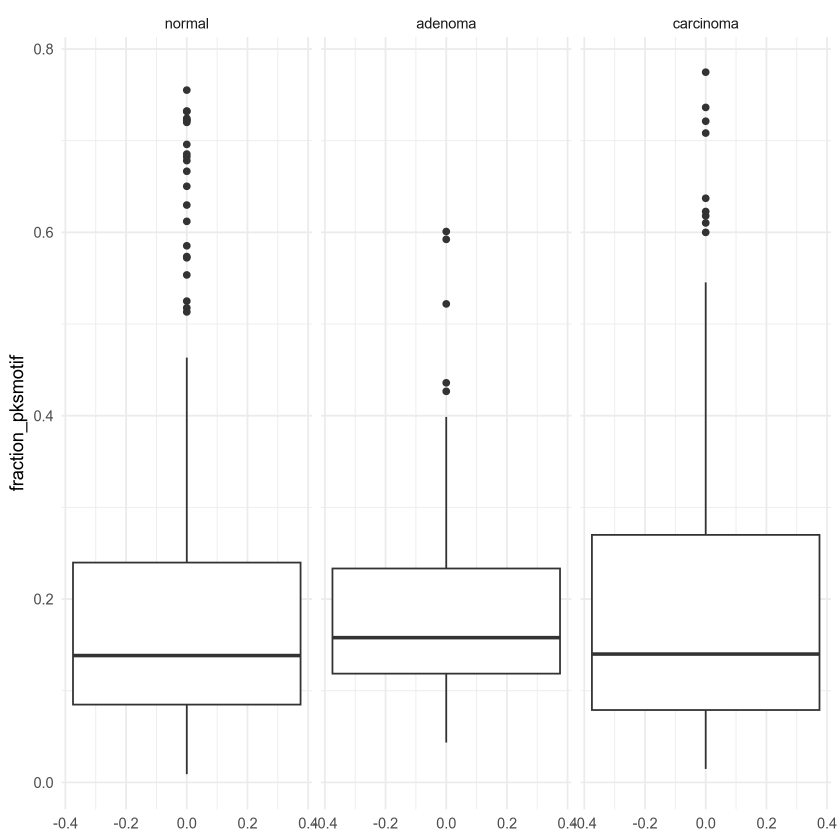

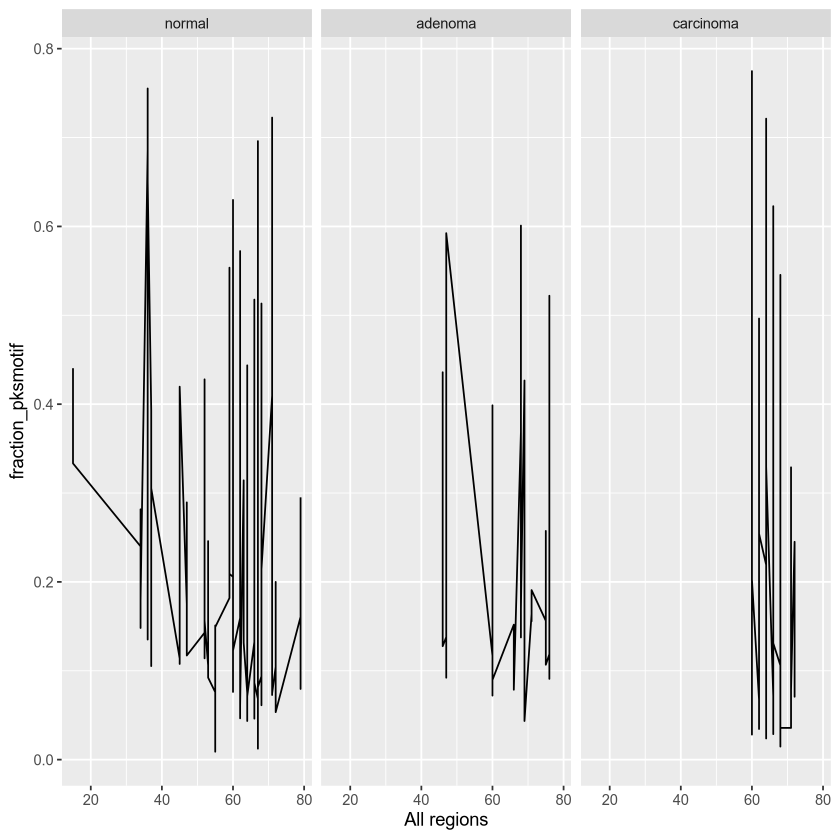

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


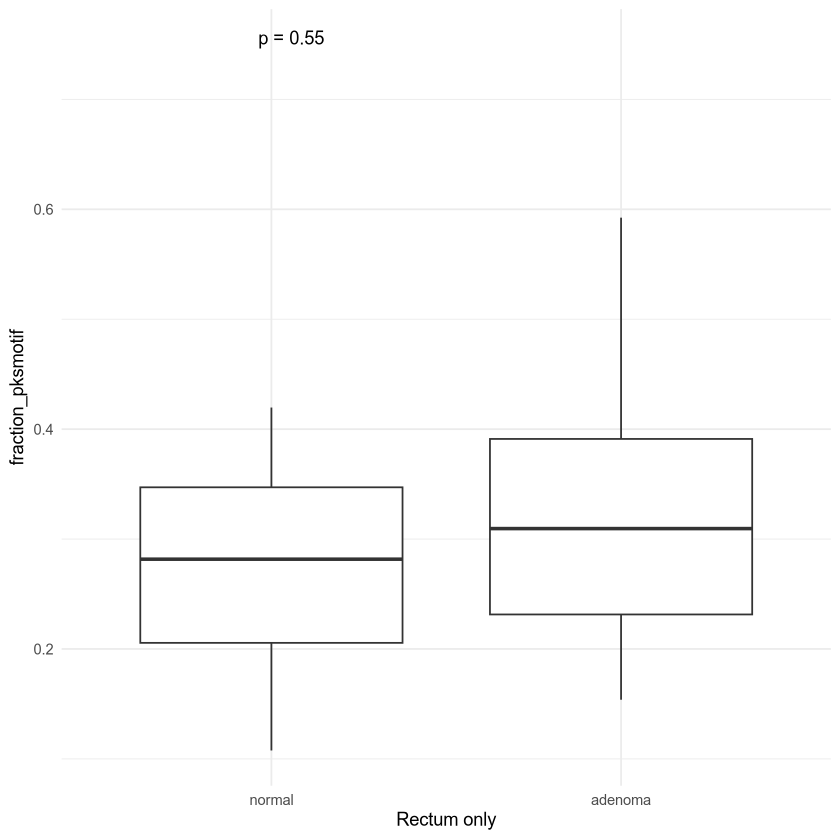

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


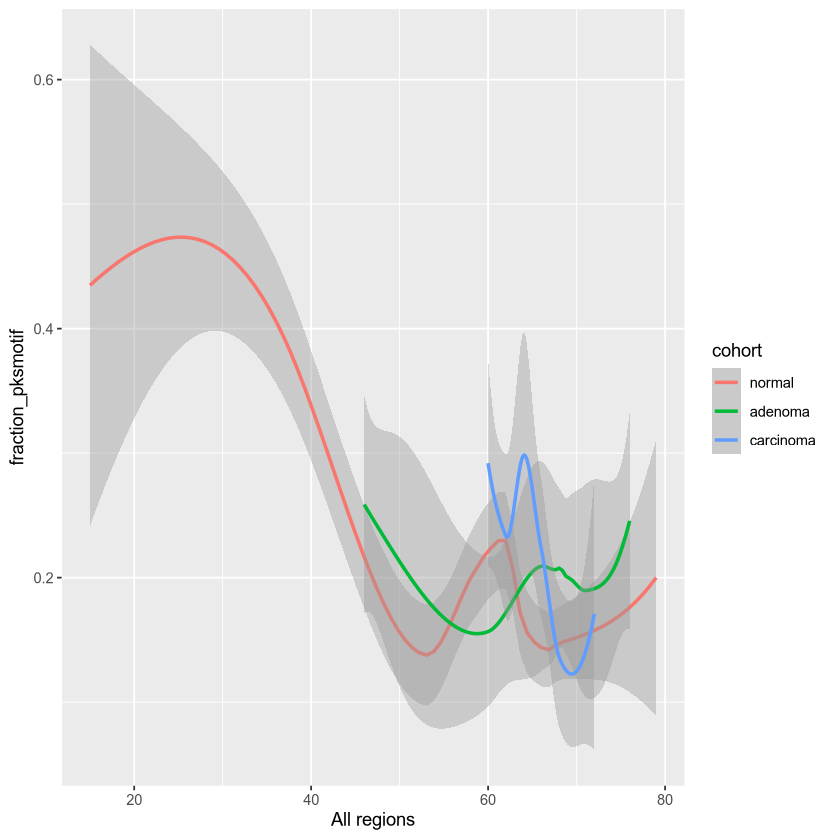

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


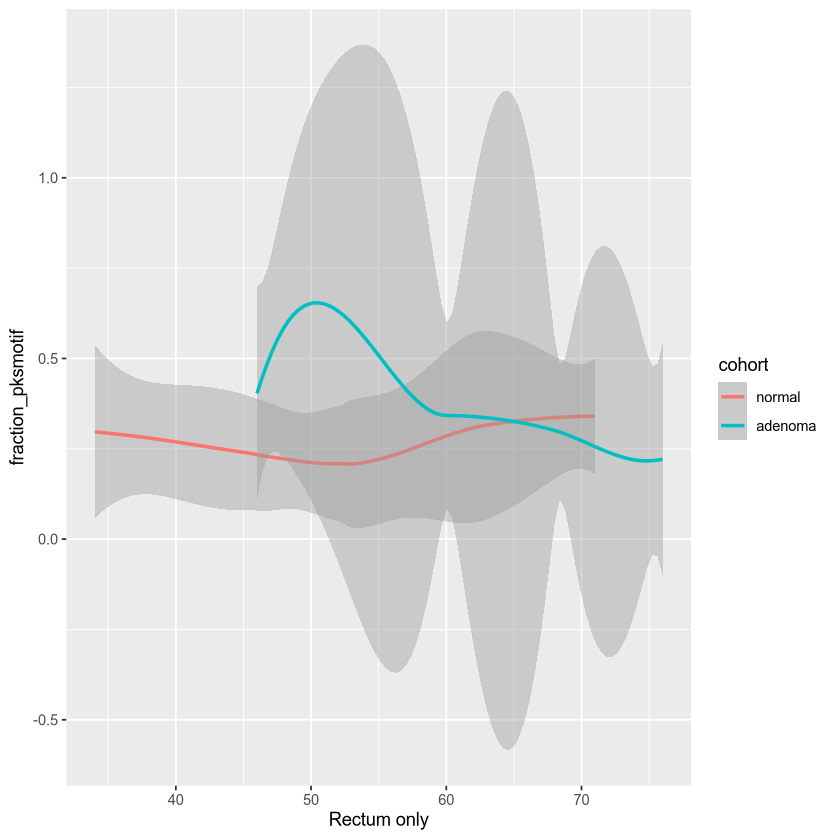

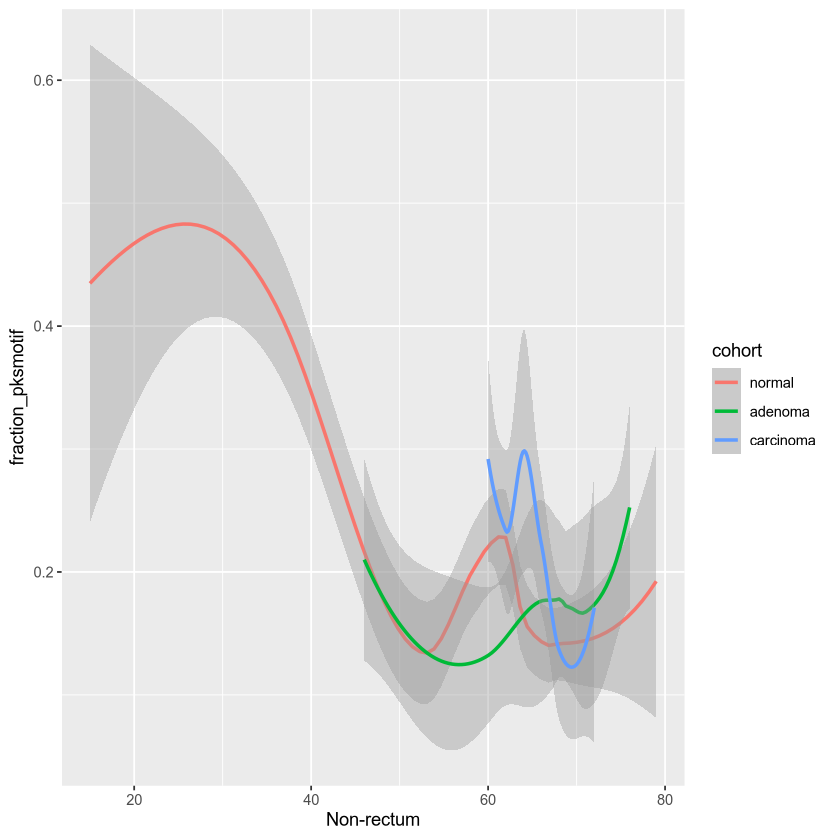

In [16]:
ggplot(combined_df, aes(y=fraction_pksmotif)) +
  geom_boxplot() + facet_wrap(~cohort) + theme_minimal()

ggplot(combined_df, aes(x=age, y=fraction_pksmotif)) +
  geom_line() + facet_wrap(~cohort) + xlab("All regions")

ggplot(subset(combined_df, region == "rectum"), aes(x = cohort, y=fraction_pksmotif)) +
  geom_boxplot() + theme_minimal() + xlab("Rectum only") + stat_compare_means(aes(group = cohort), label = "p.format", label.y = 0.75)

ggplot(subset(combined_df, coverage > 9), aes(x=age, y=fraction_pksmotif, color = cohort)) +
  geom_smooth() + xlab("All regions")

ggplot(subset(combined_df, region == "rectum"), aes(x=age, y=fraction_pksmotif, color = cohort)) +
  geom_smooth() + xlab("Rectum only")

ggplot(subset(combined_df, region != "rectum"), aes(x=age, y=fraction_pksmotif, color = cohort)) +
  geom_smooth() + xlab("Non-rectum")

Figure 4
Colibactin sequences for snvs and IDs
WGS
Coding
Signature refits
Signature corresponding to refit
Age
VAF?

See if in any driver mutations?


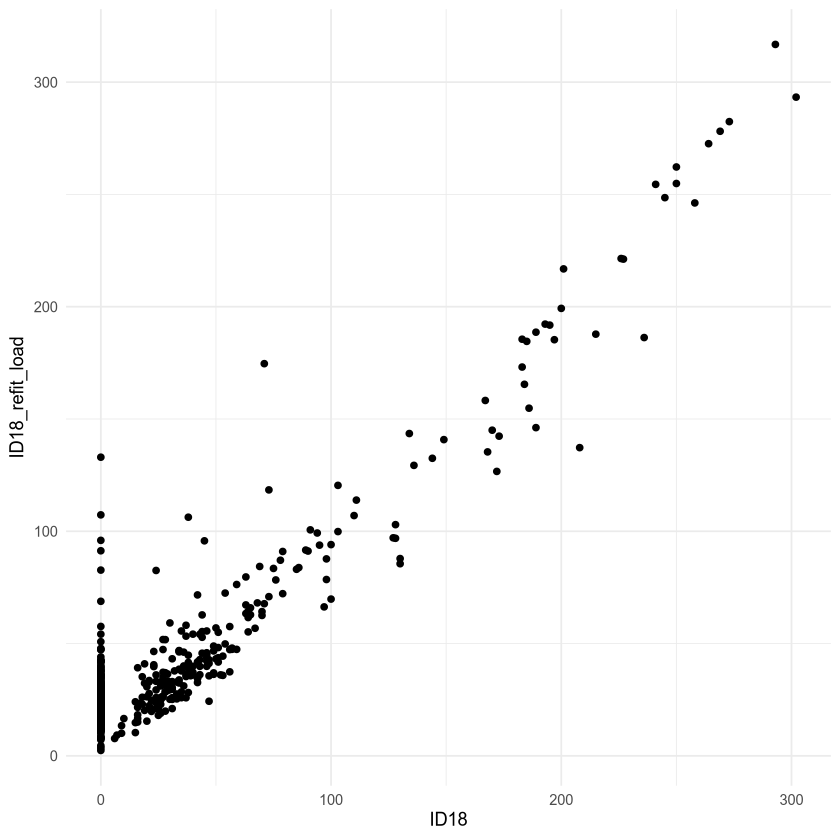

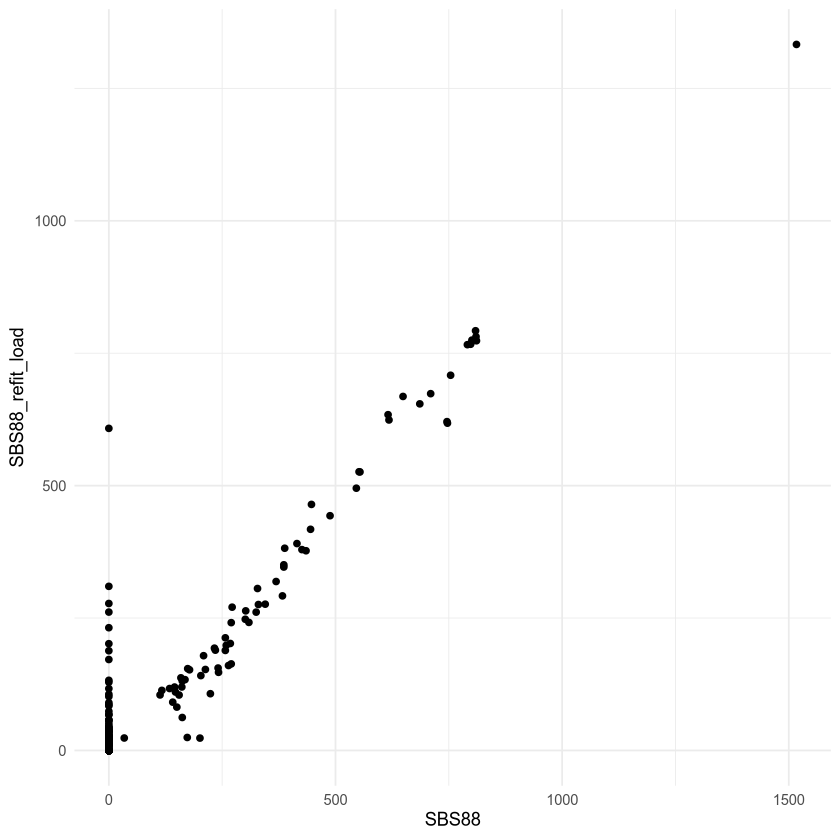

In [6]:
ggplot(combined_df, aes(x=ID18, y=ID18_refit_load)) + geom_point() + theme_minimal()
ggplot(combined_df, aes(x=SBS88, y=SBS88_refit_load)) + geom_point() + theme_minimal()

In [17]:
metrics <- c(
  "SBS88", "ID18", "ID18_perc", "snv_perc", "fraction_pksmotif",
  "SBS88_refit_load", "ID18_refit_load", "total_indels",
  "SBS88_refit_perc", "ID18_refit_perc", "n_with_driver_gene_coding",
  "fraction_pksmotif_coding", "total_indels_genic","fraction_pksmotif_genic",
  "n_AA_coding","n_with_driver_gene_id","n_with_driver_gene_snv",
  "total_coding_indels","total_indels_genic","n_AA_genic", "n_with_gene_snv",
  "ID18_refit_coding", "SBS88_refit_coding","ID18_refit_genic","SBS88_refit_genic",
  "n_with_coding_snv", "in_pks_motif", "n_AA"
)

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”


`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


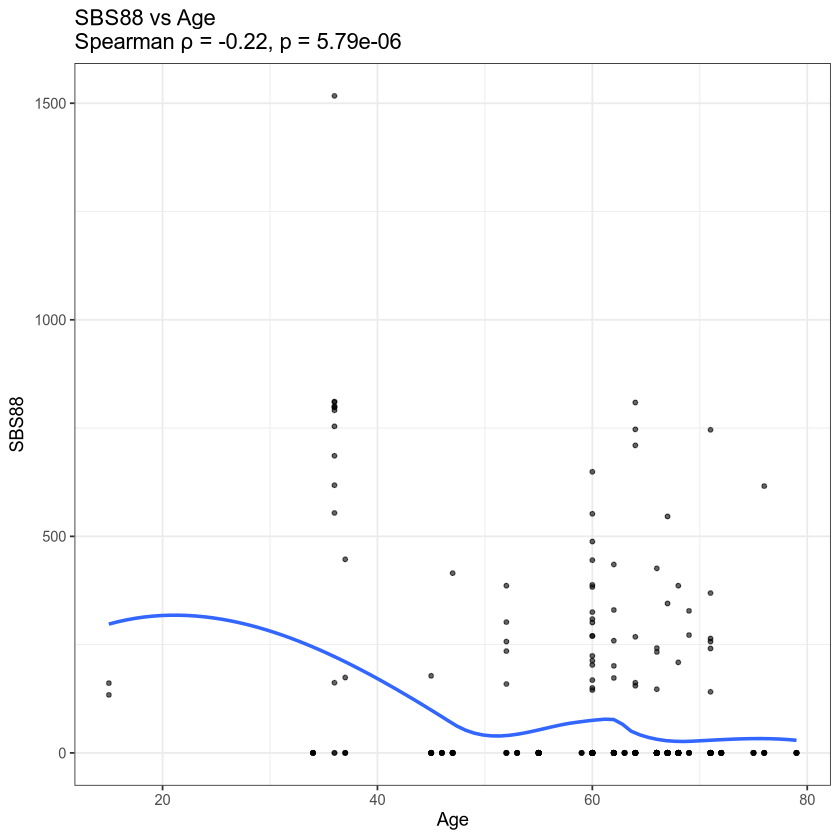

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


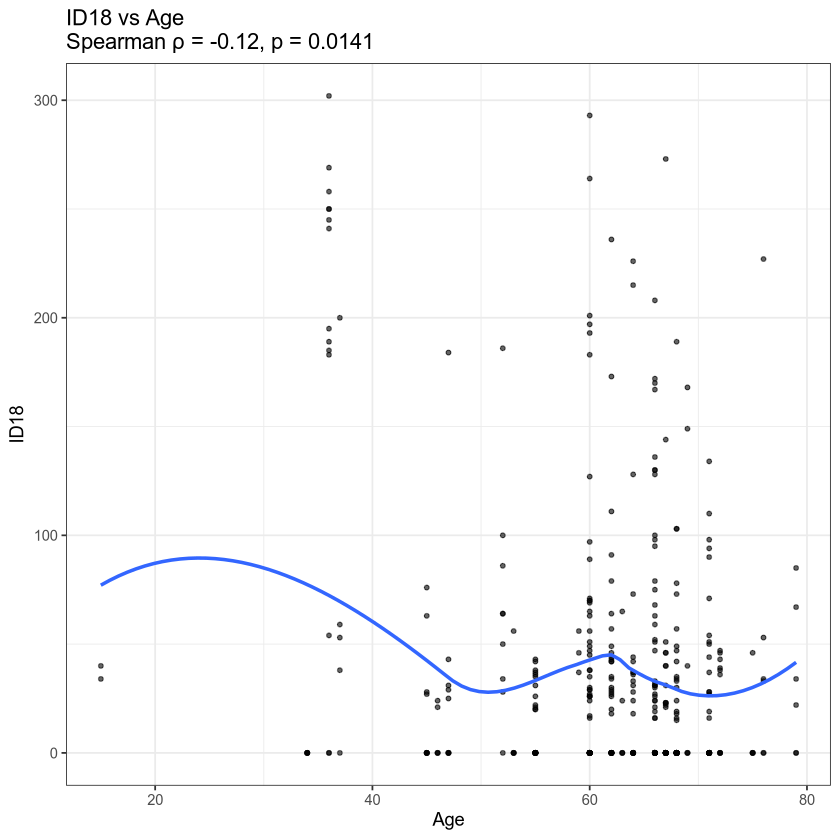

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


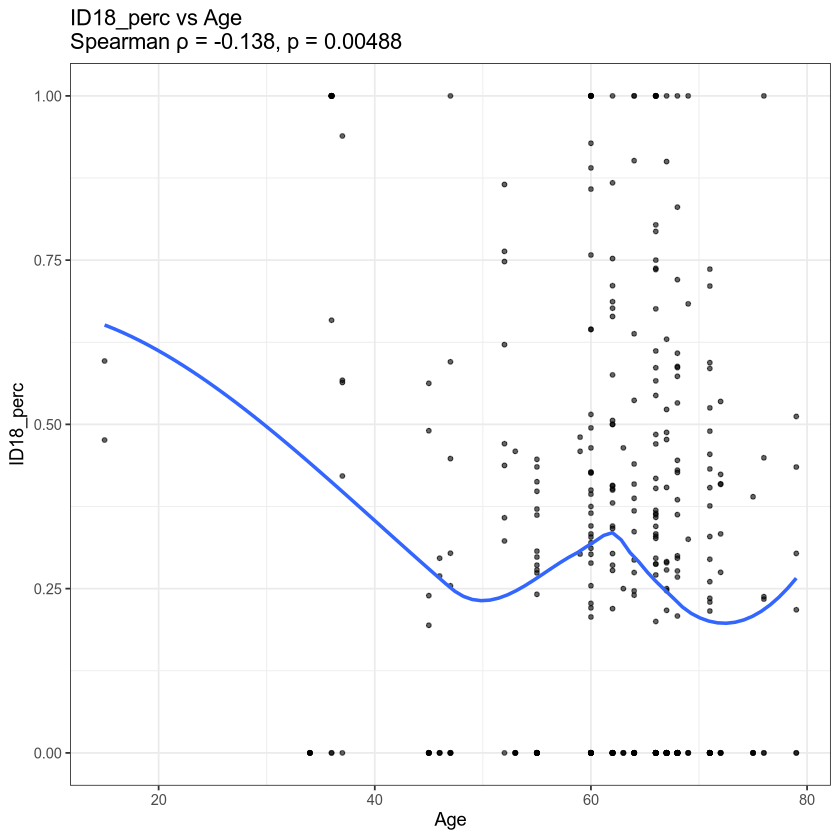

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


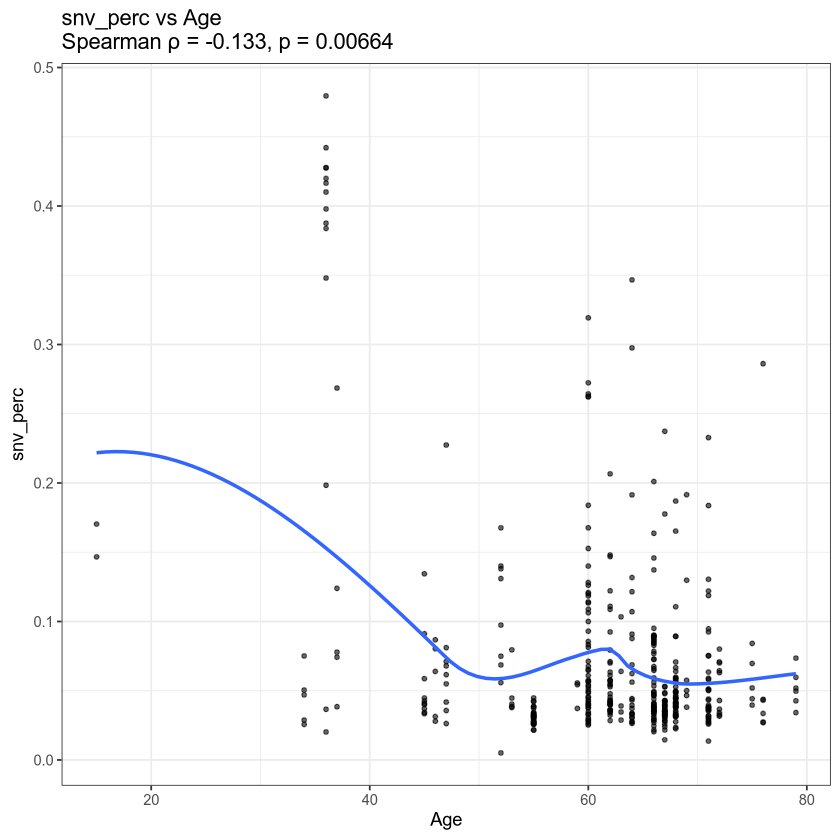

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


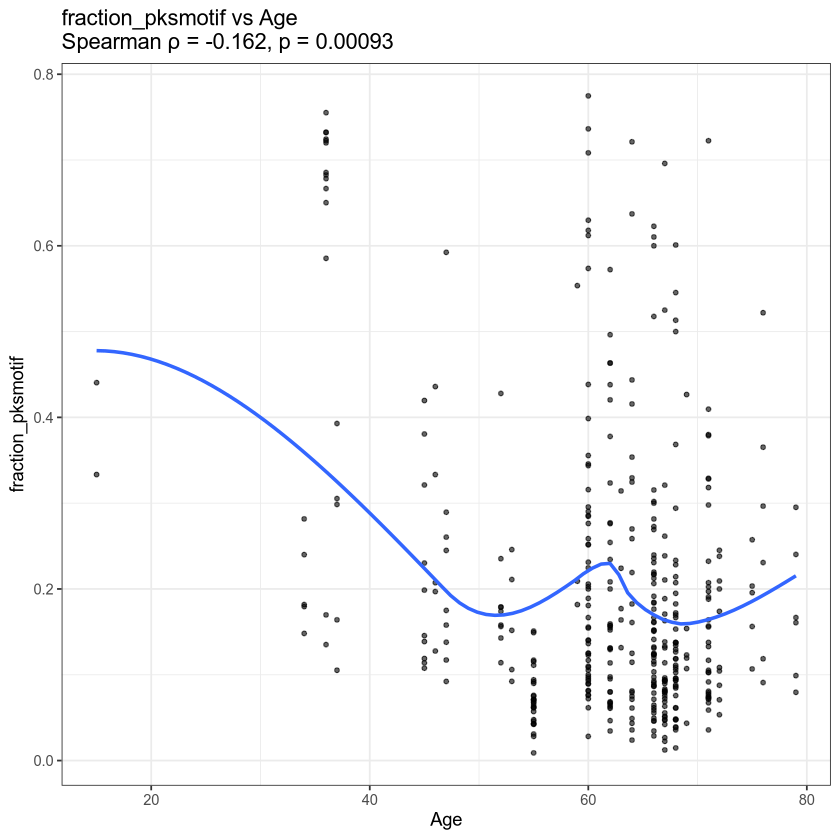

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


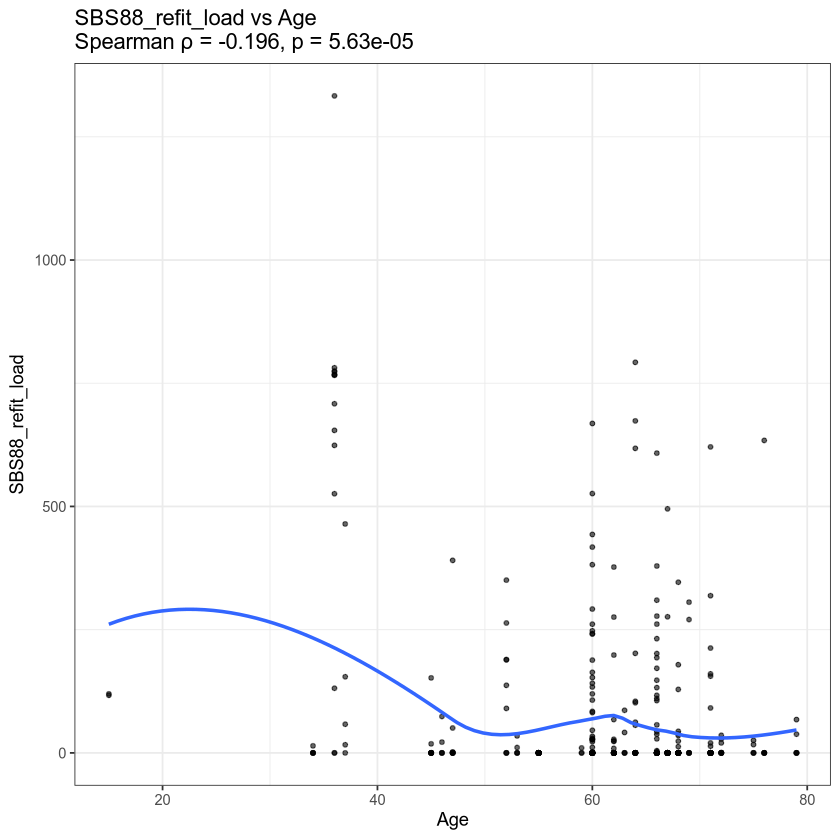

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


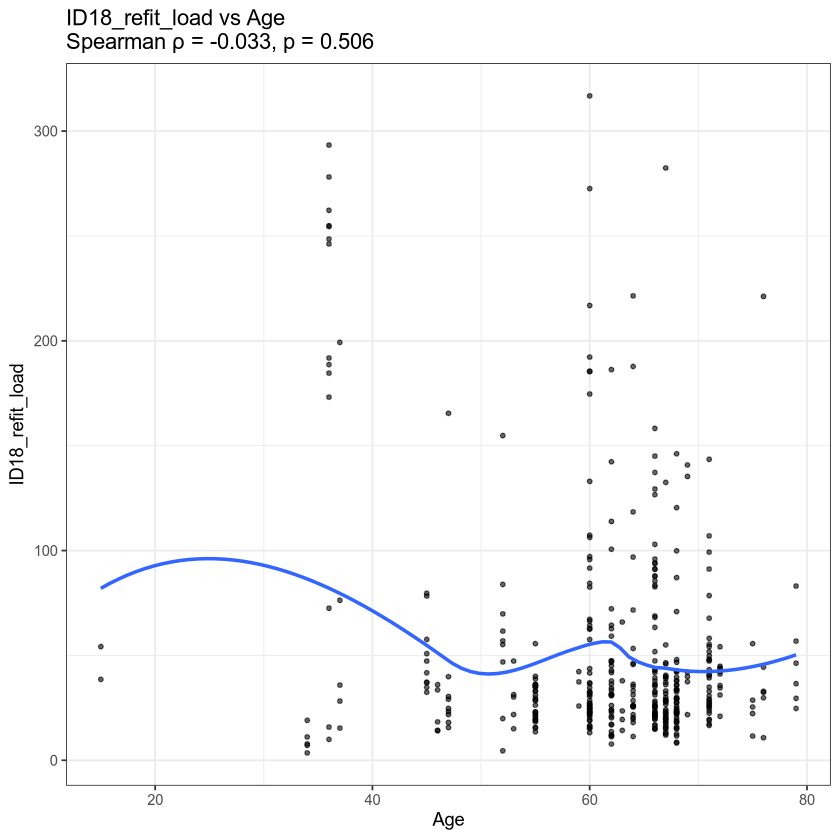

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


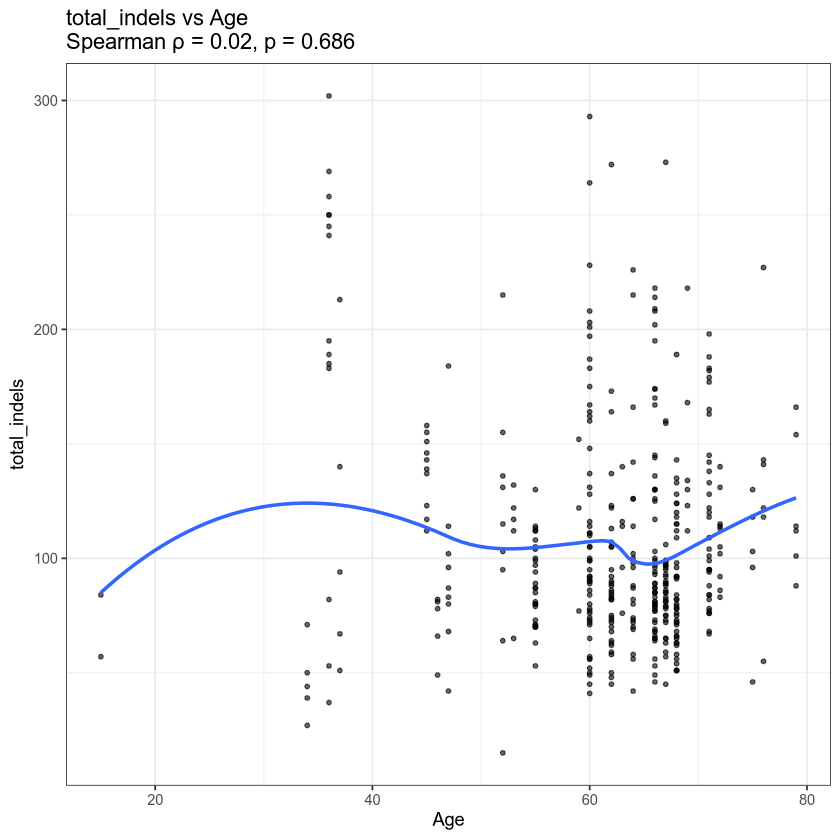

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


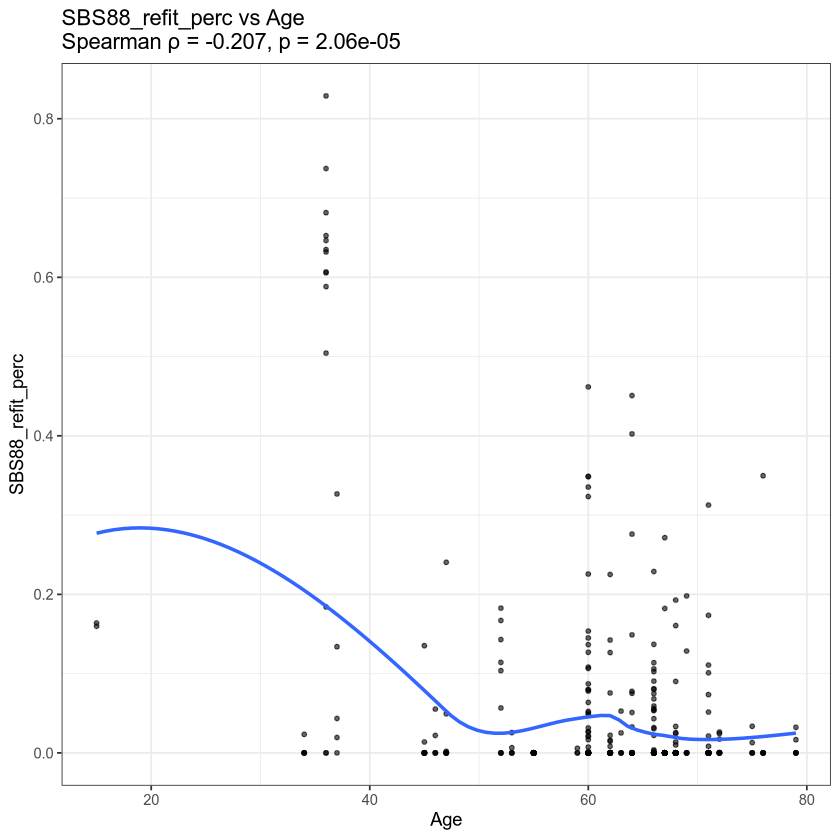

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


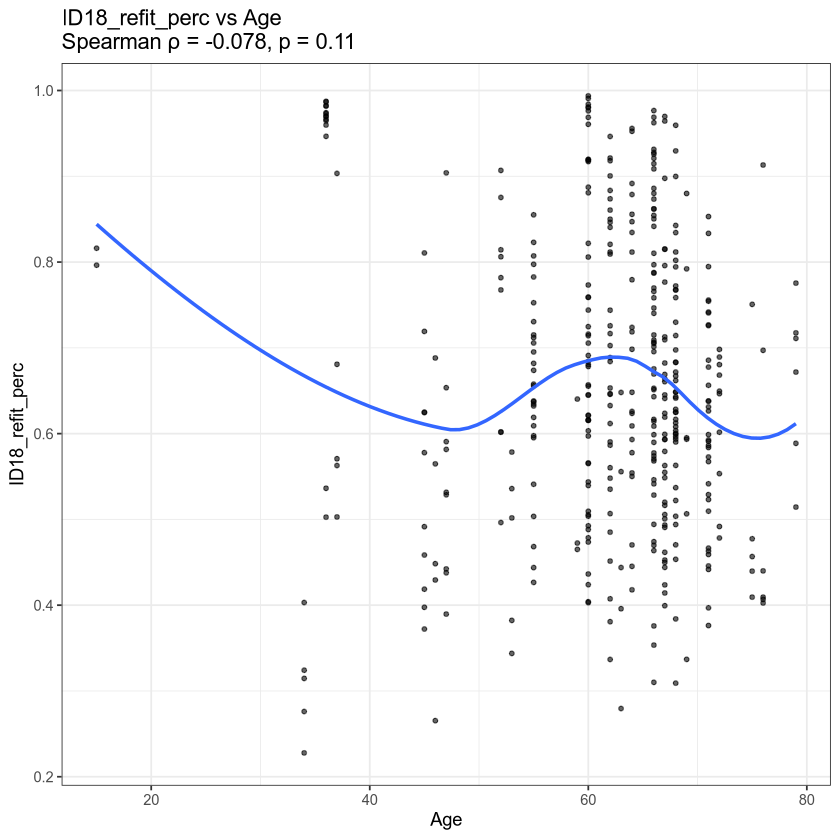

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


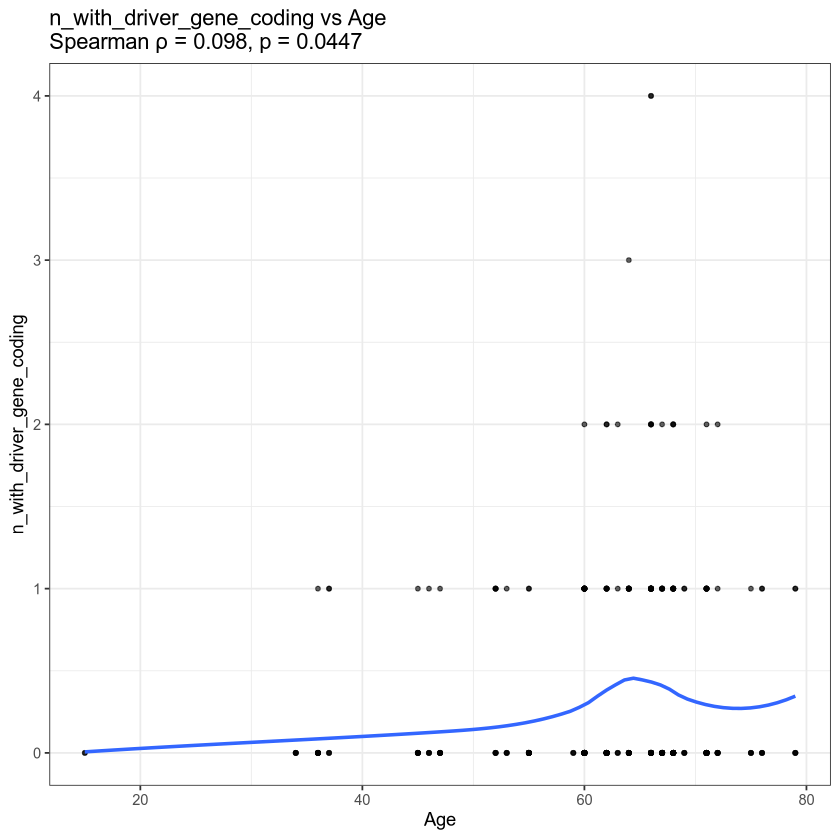

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


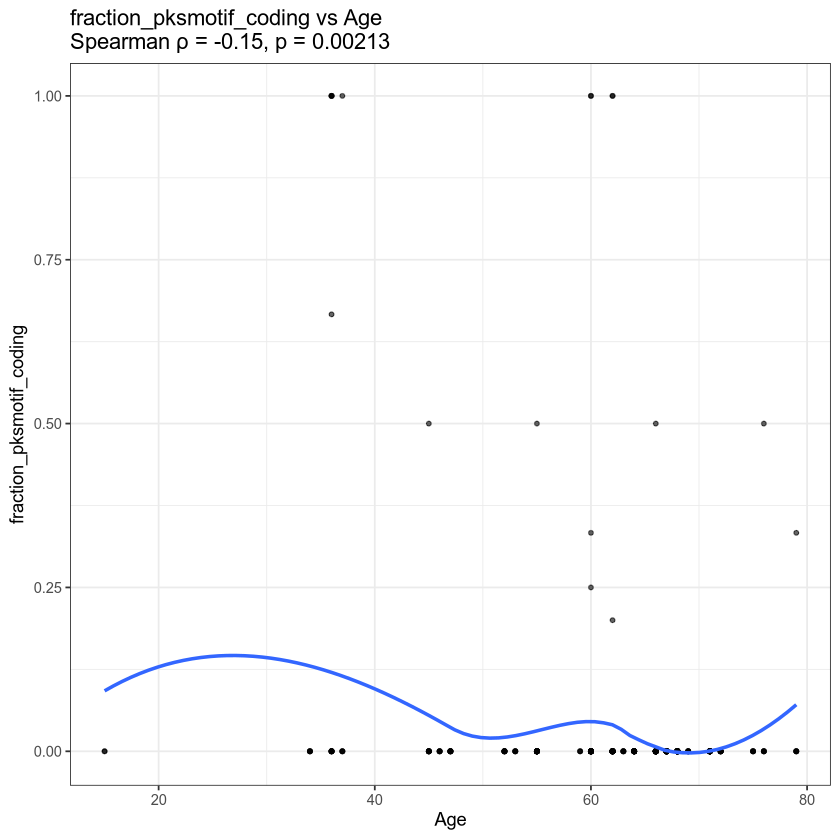

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


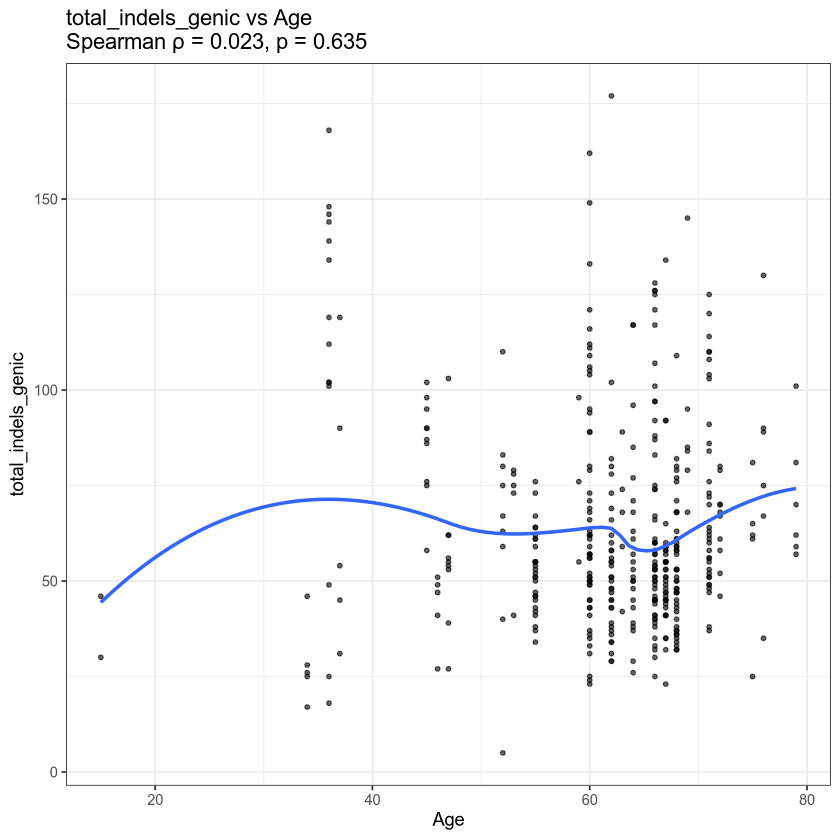

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


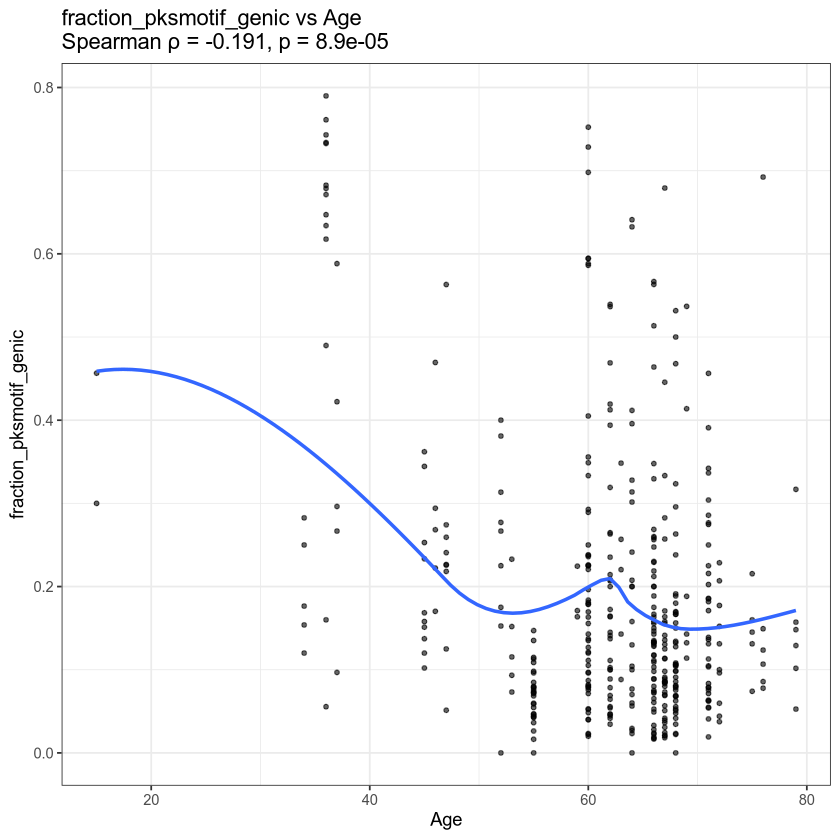

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


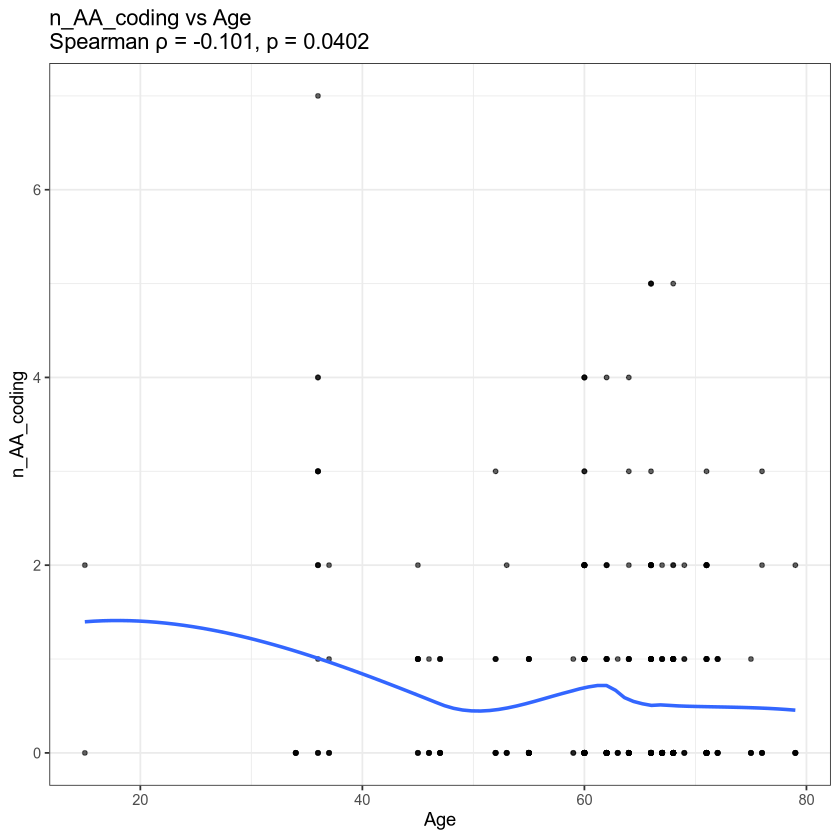

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


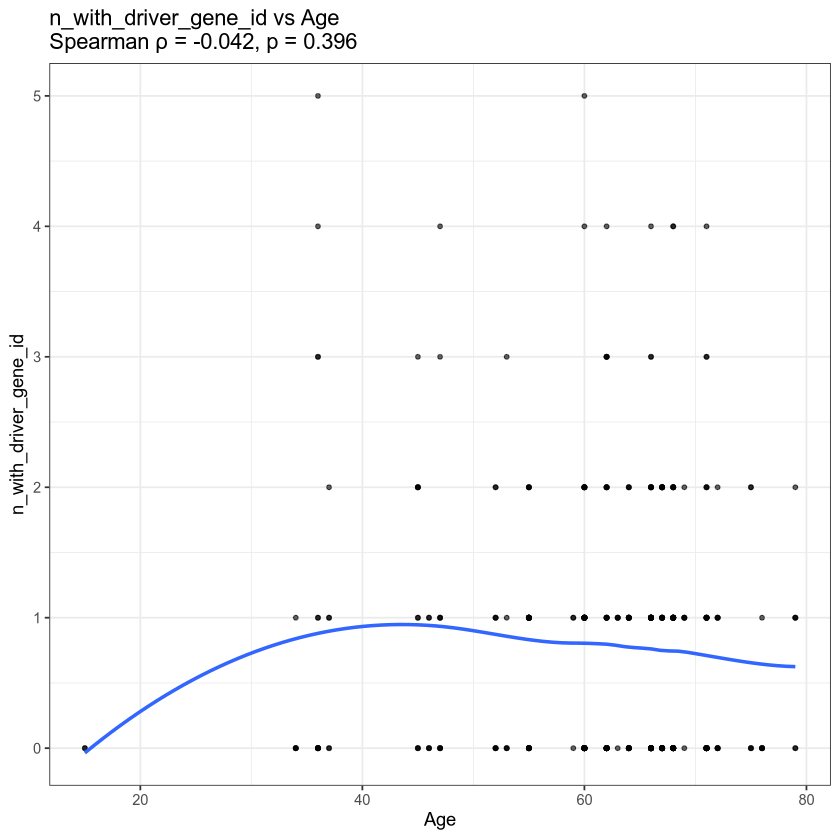

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


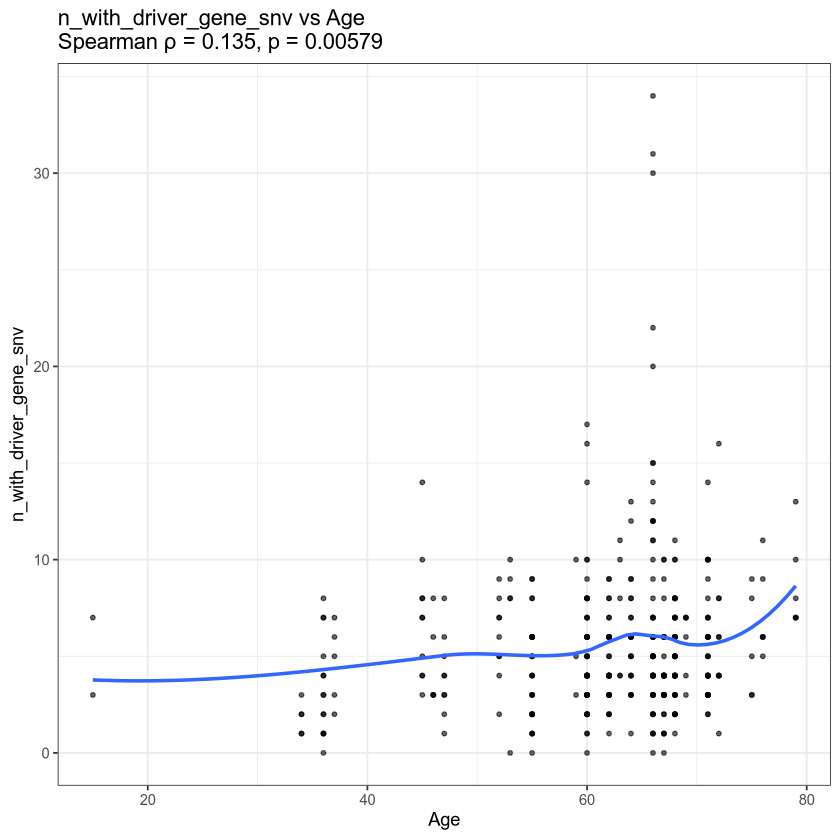

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


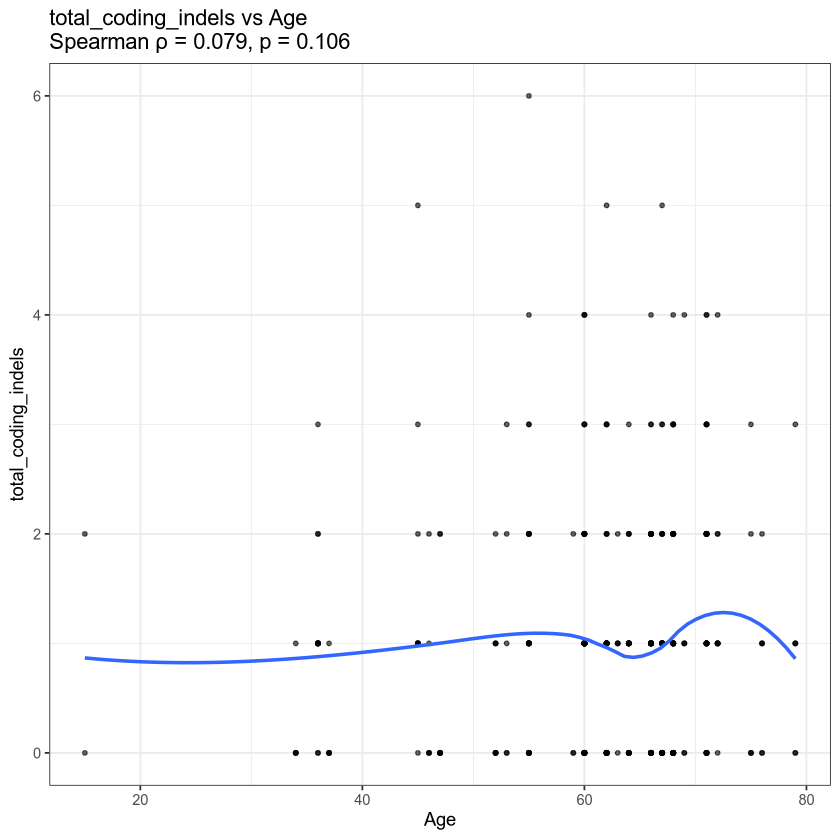

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


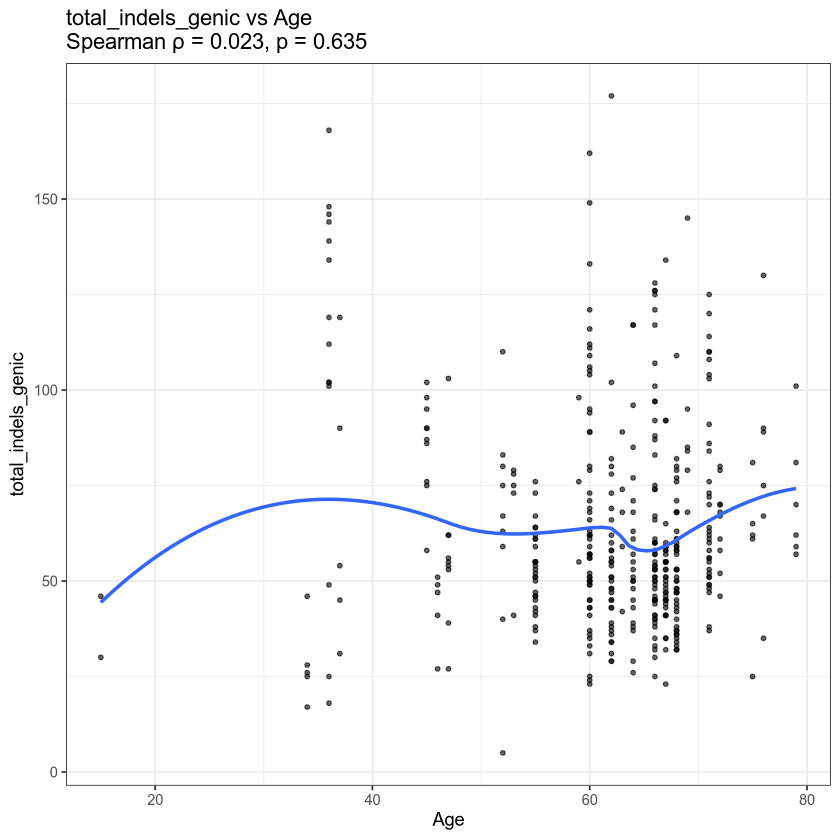

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


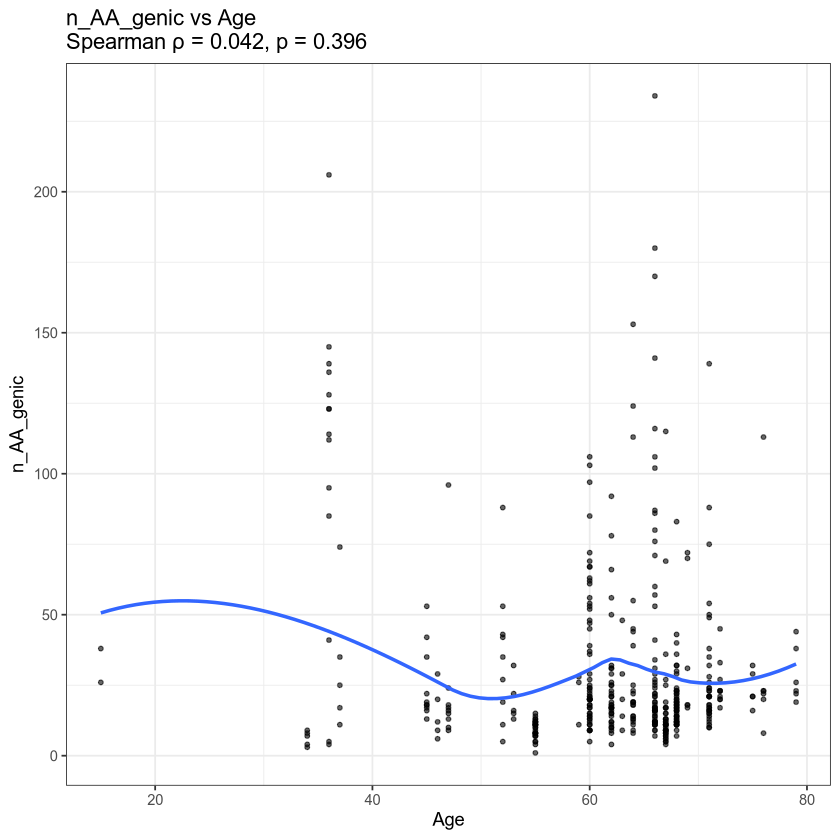

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


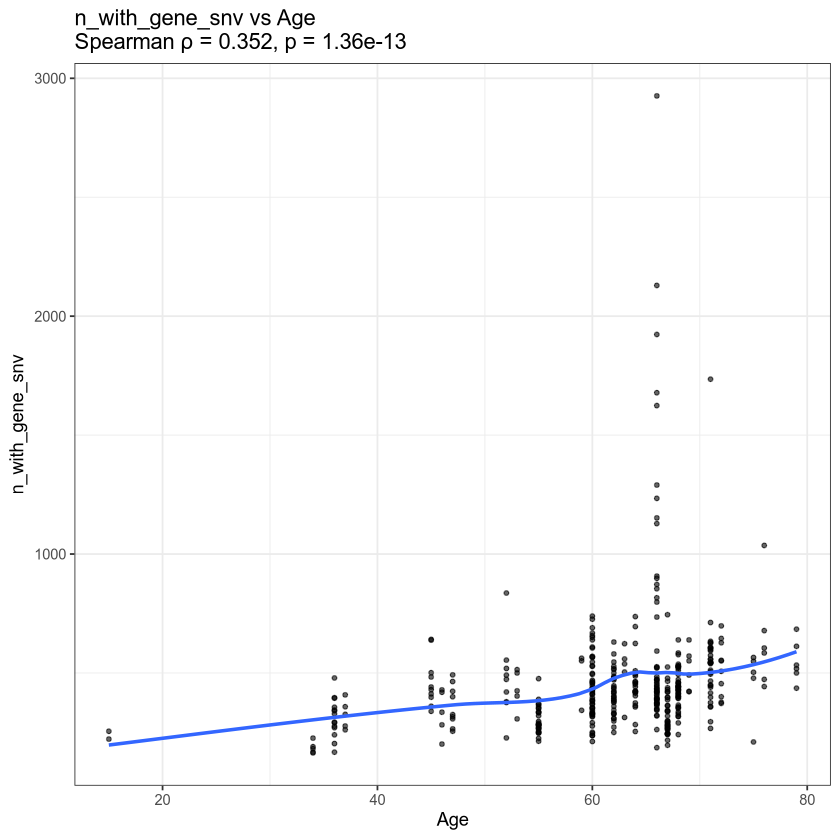

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


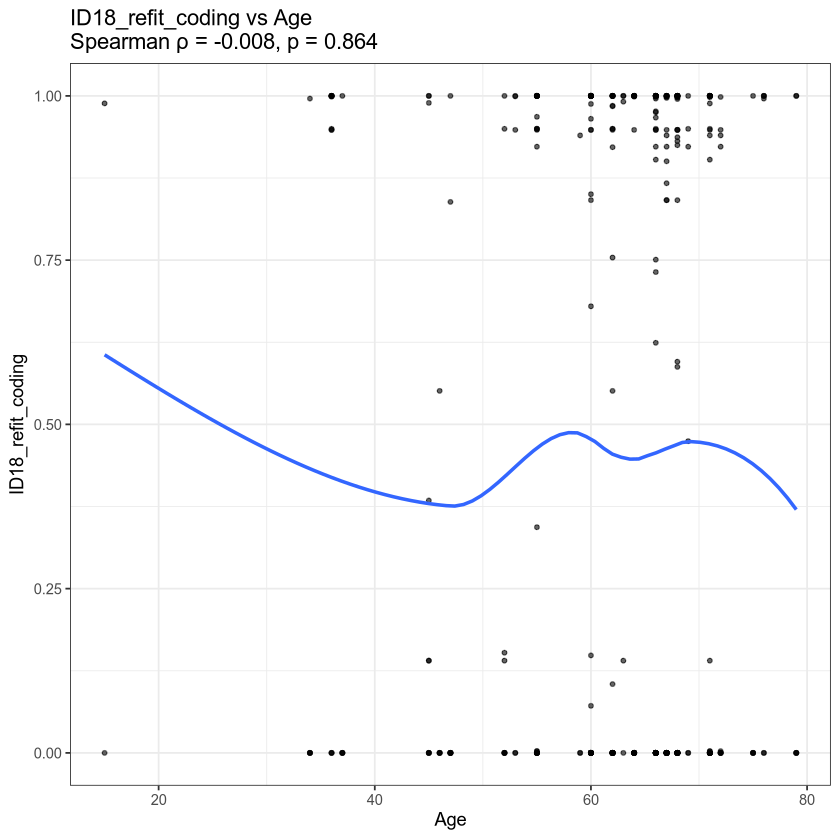

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


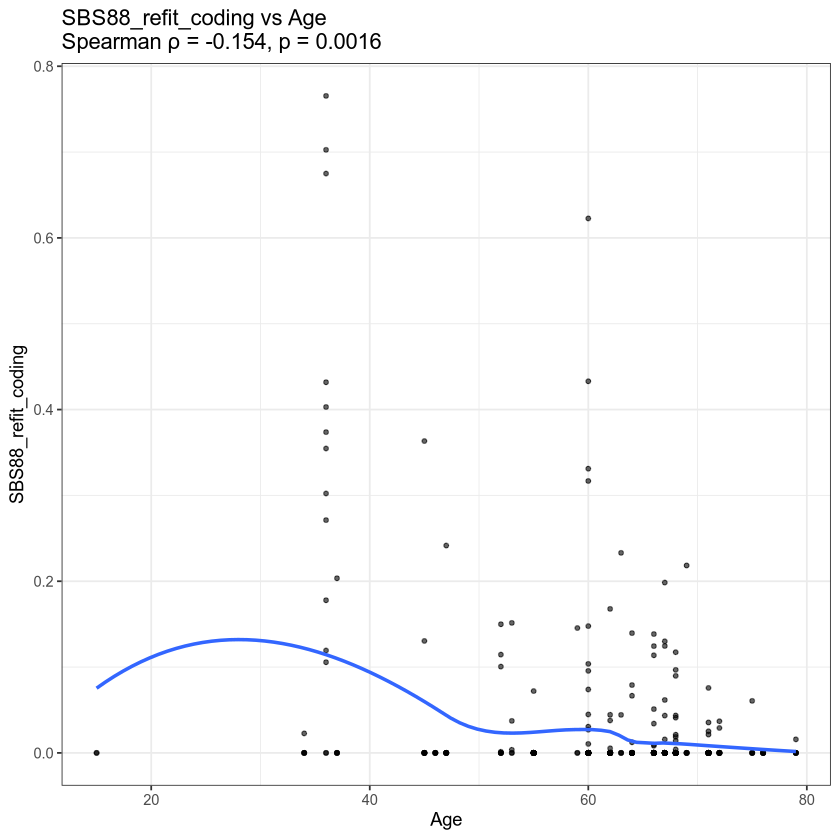

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


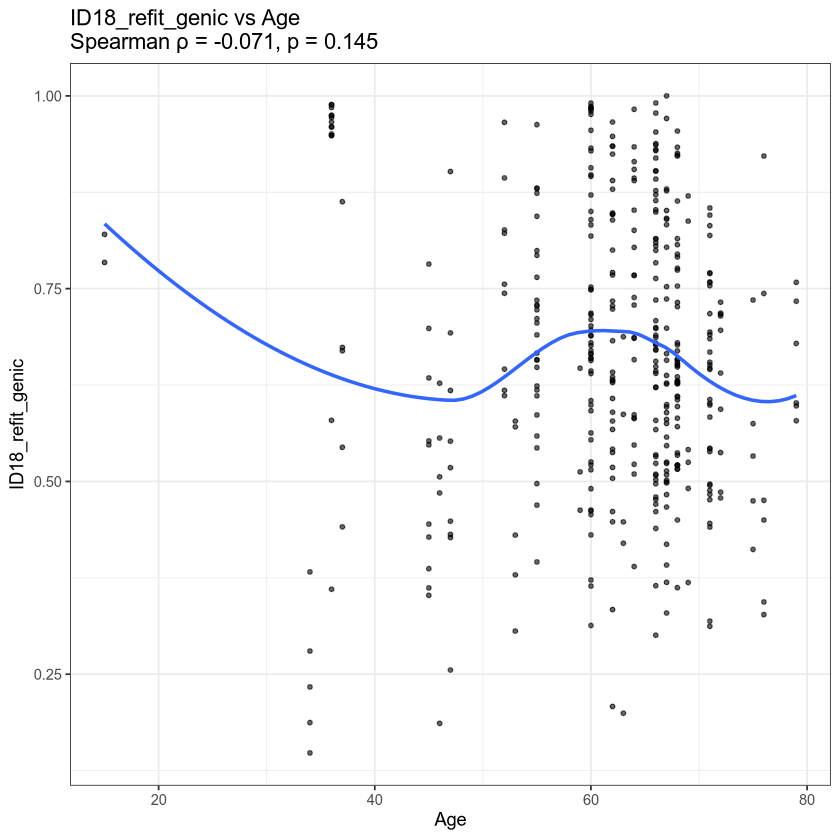

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


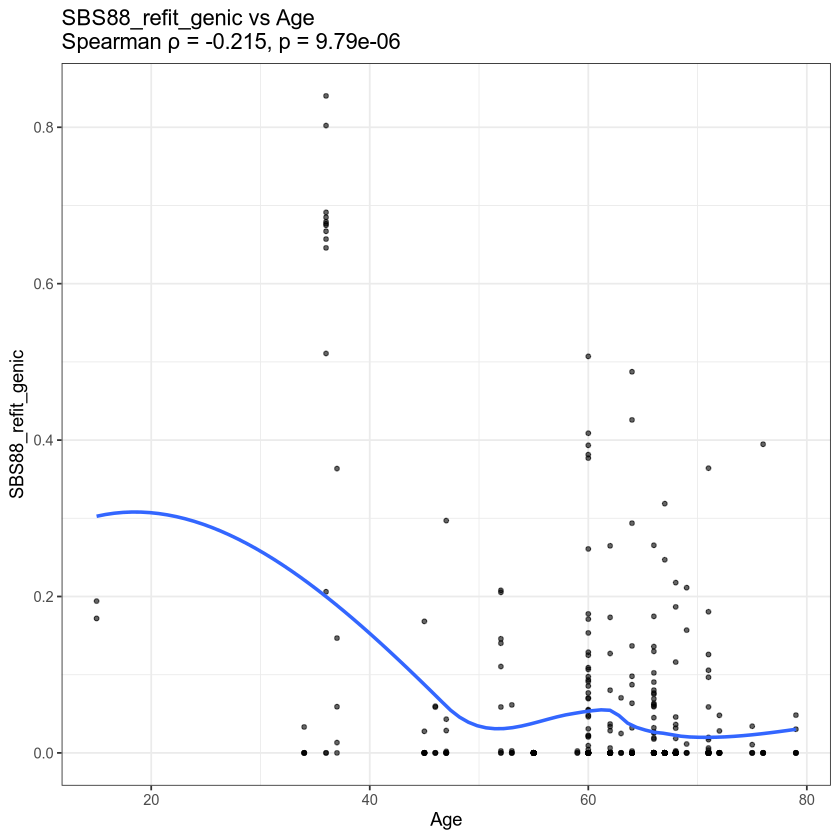

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


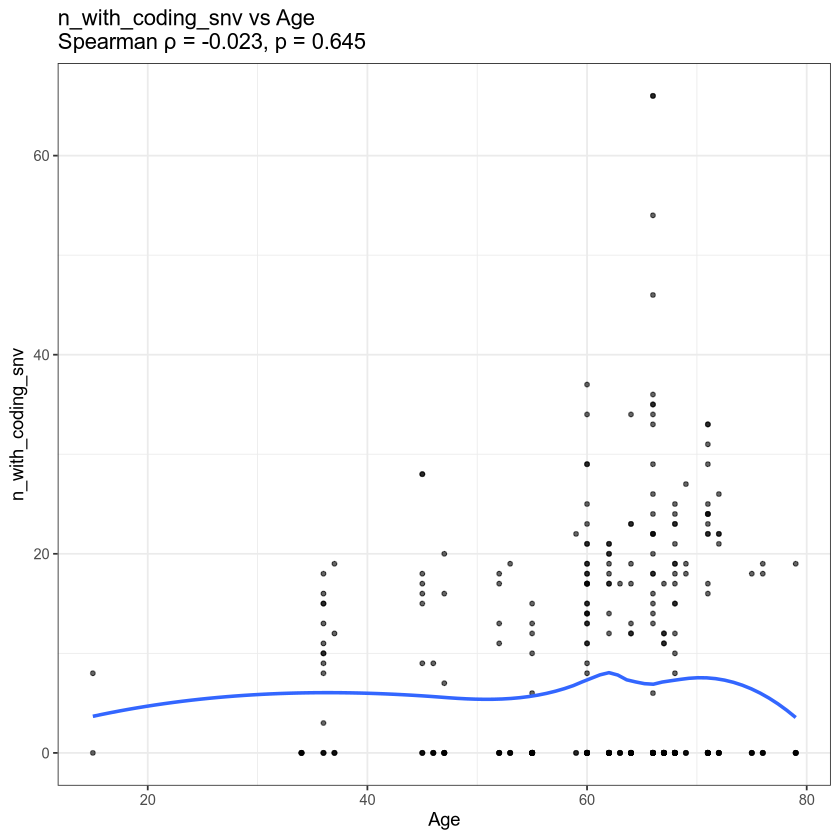

Warning message in cor.test.default(combined_df$age, combined_df[[m]], method = "spearman", :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'


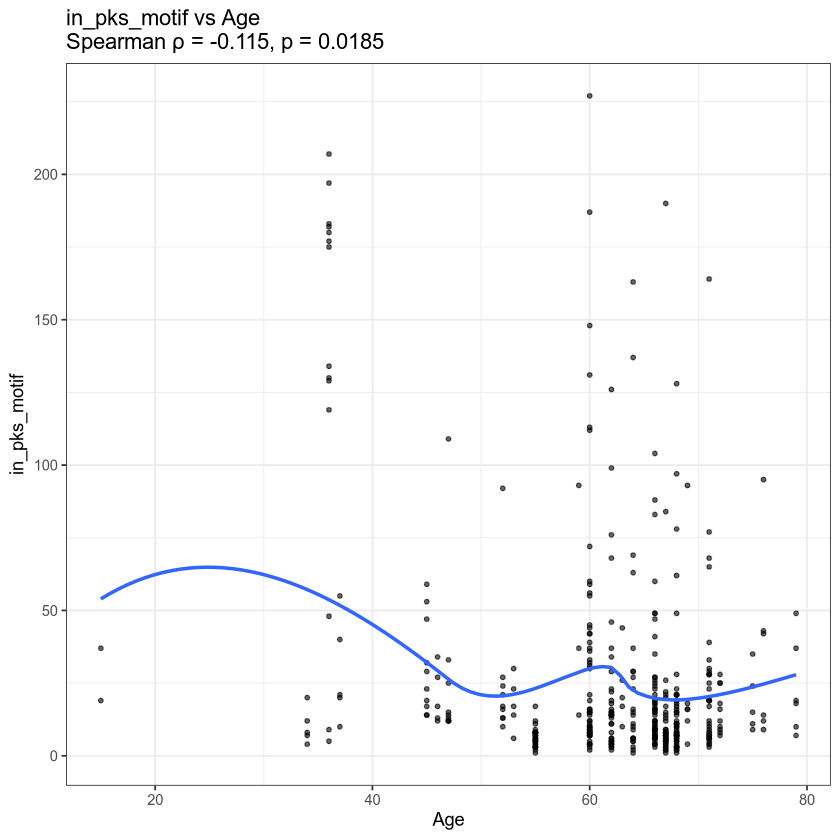

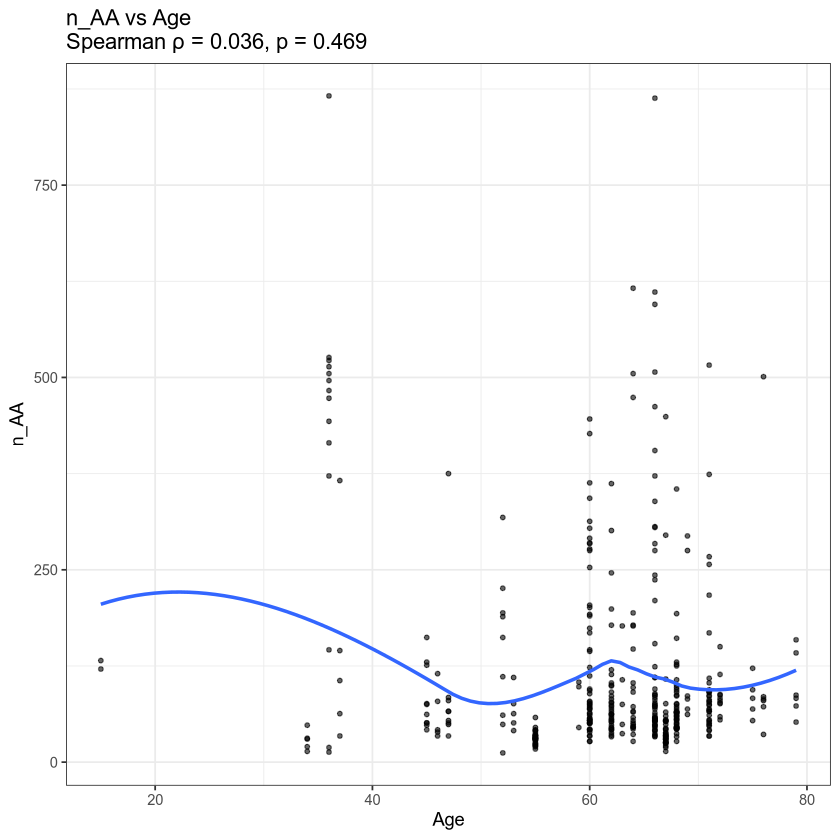

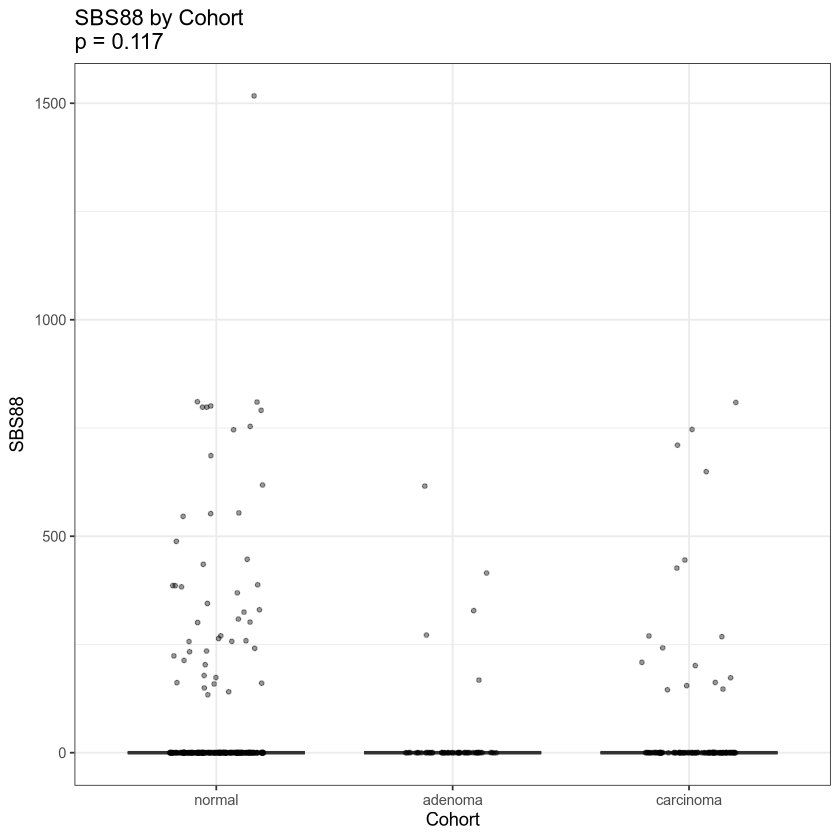

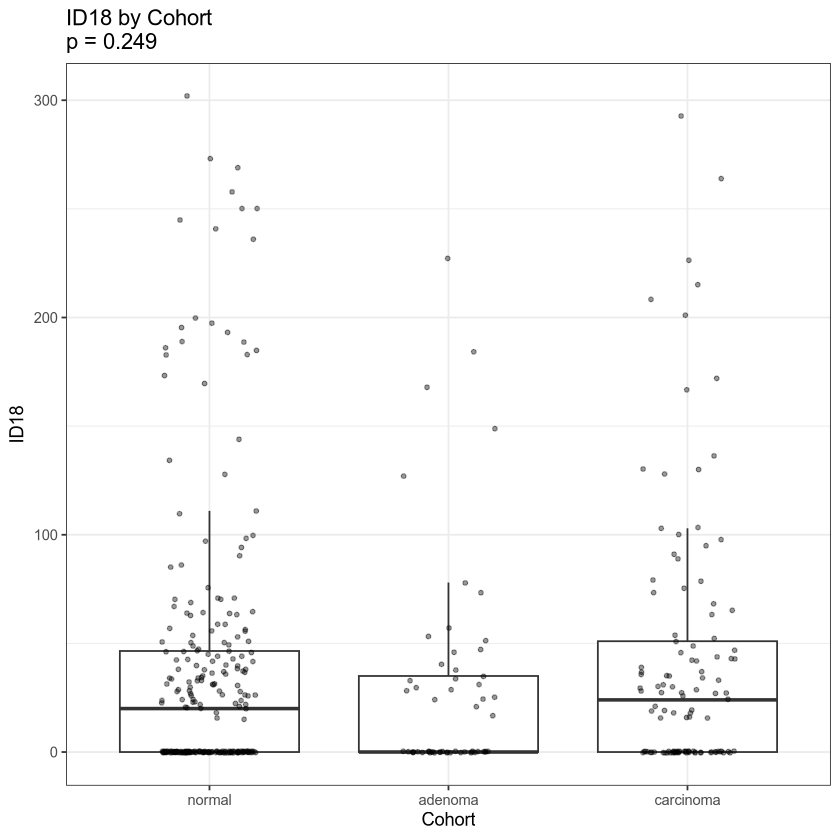

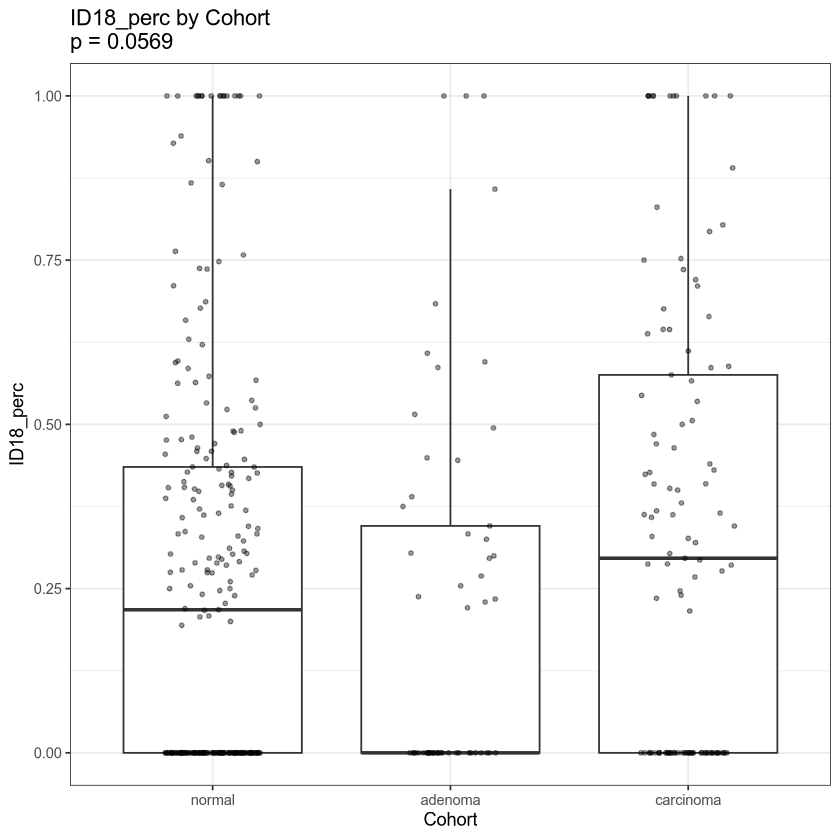

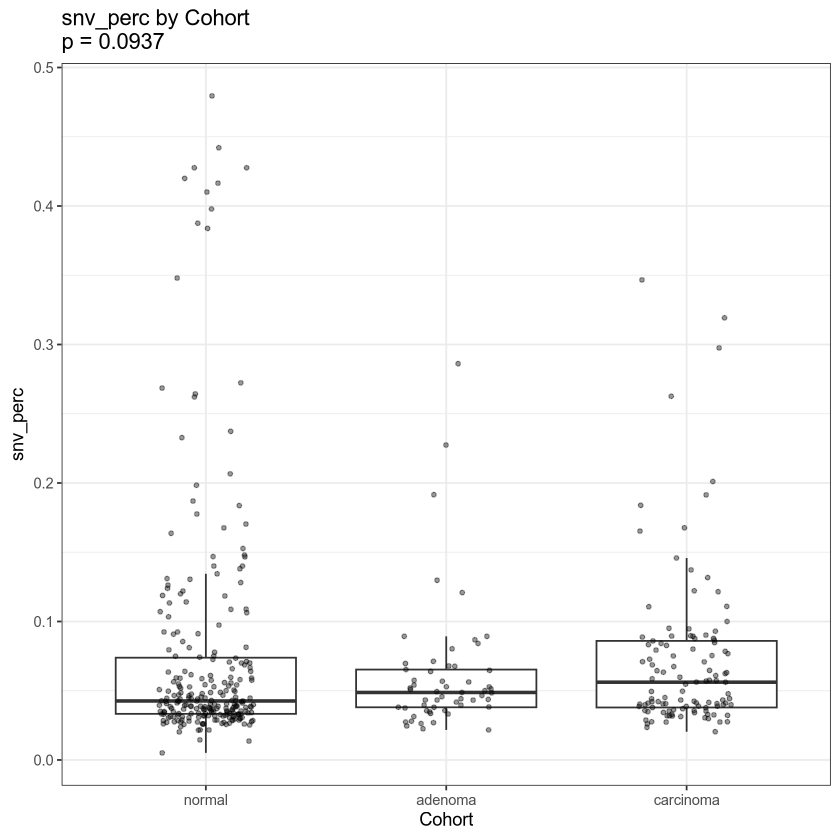

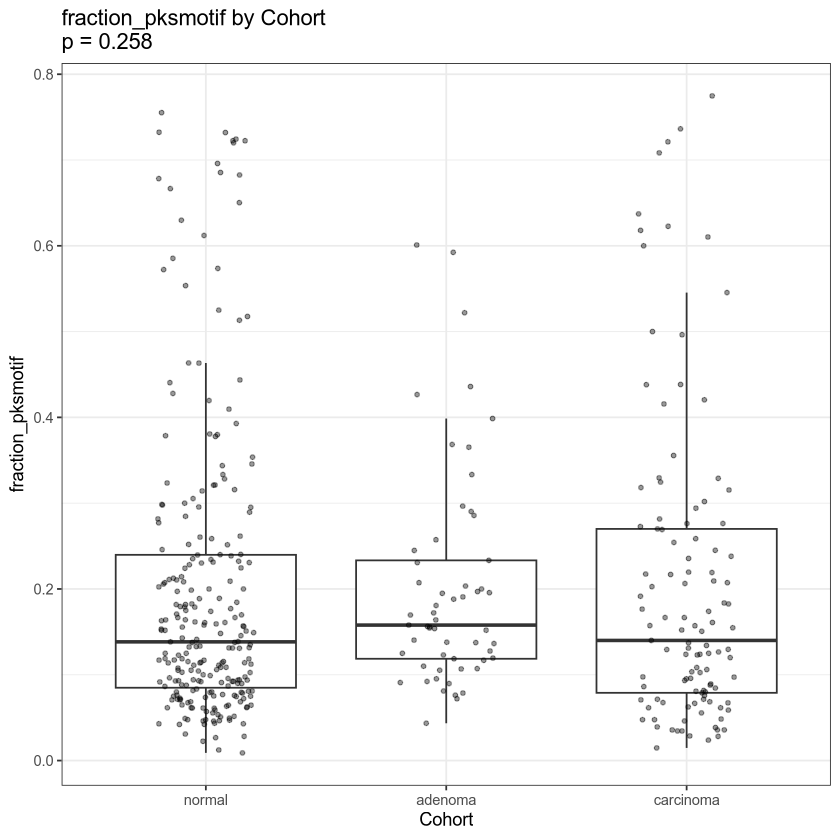

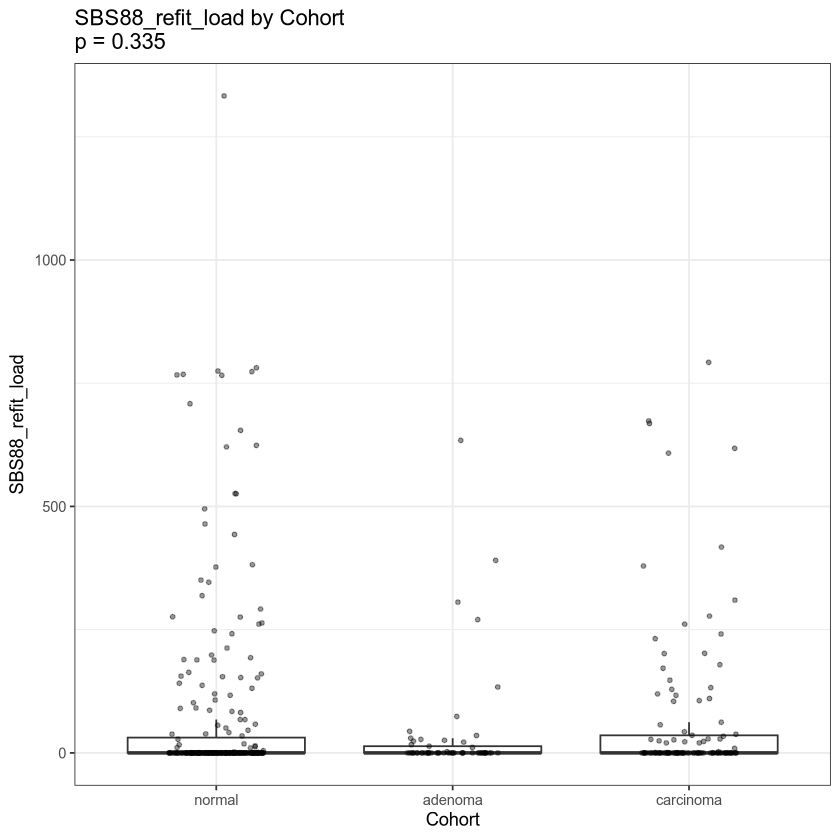

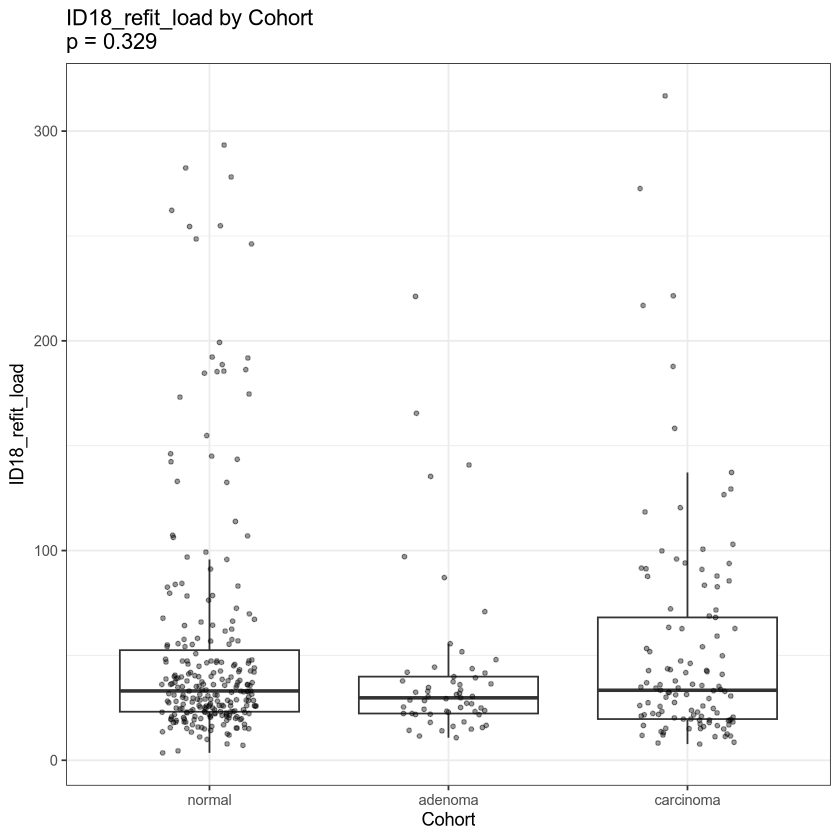

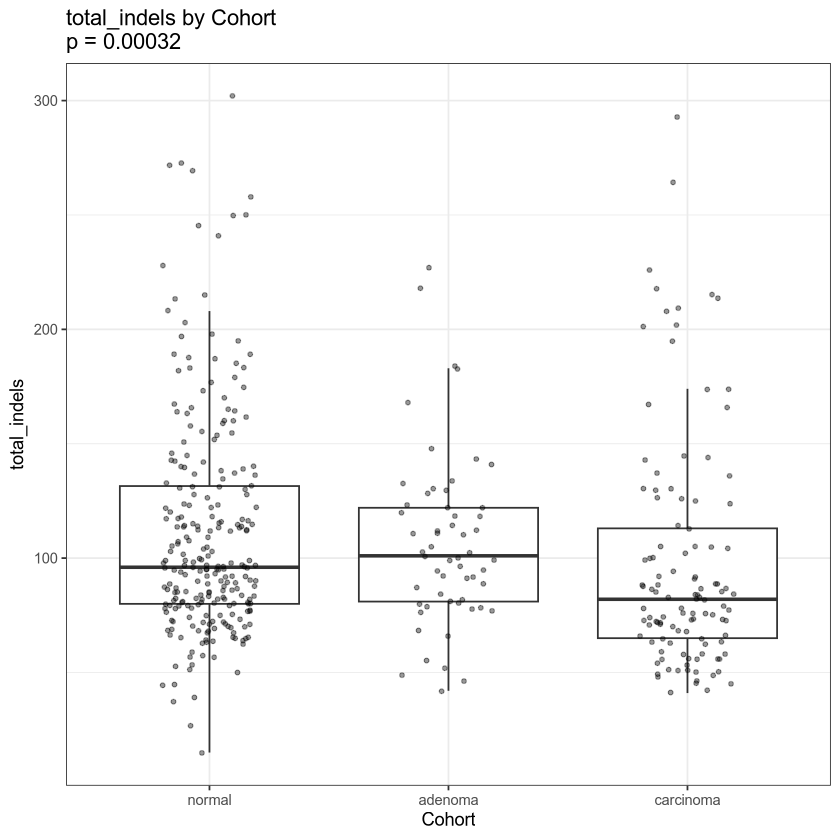

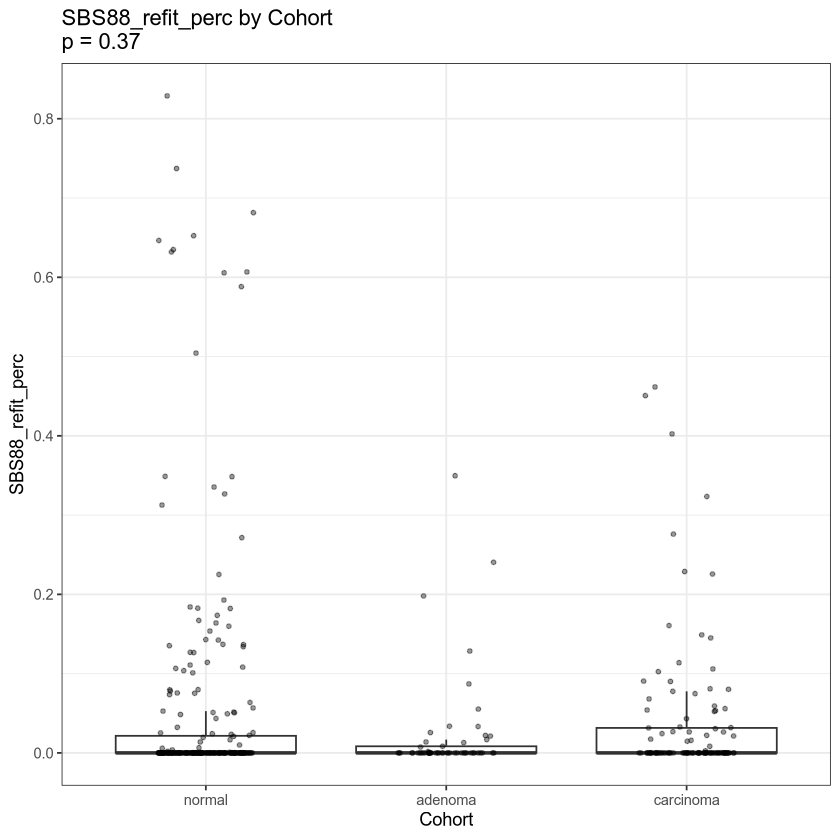

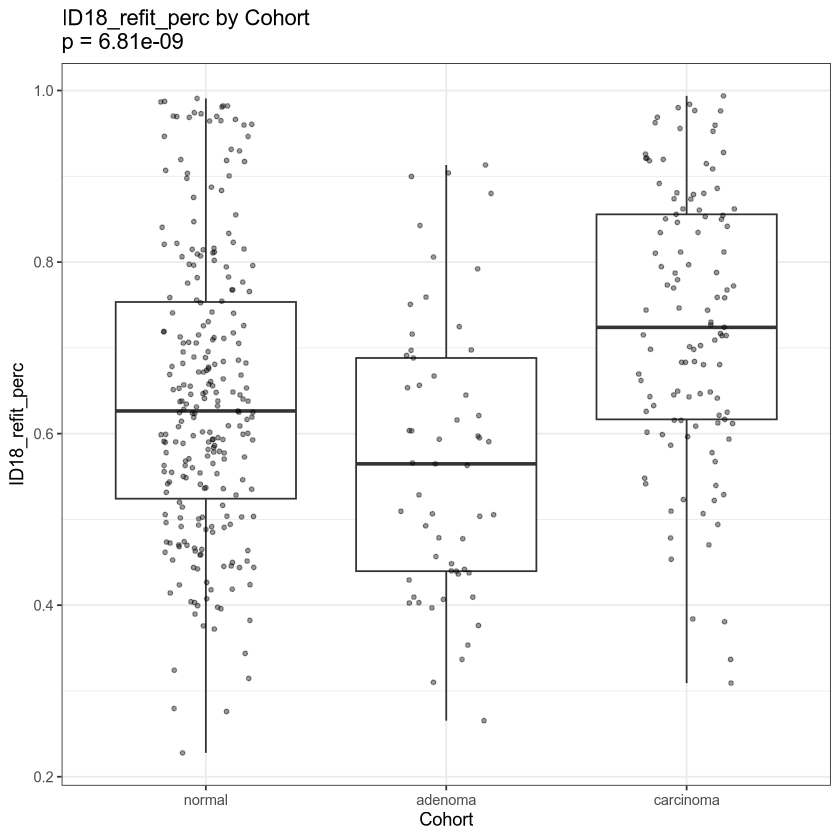

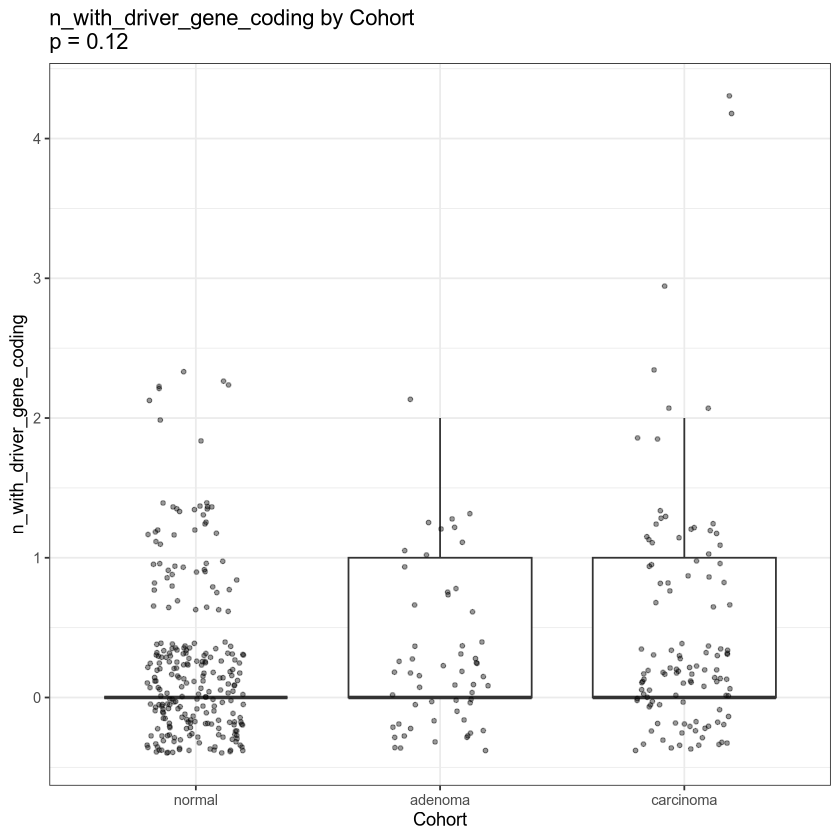

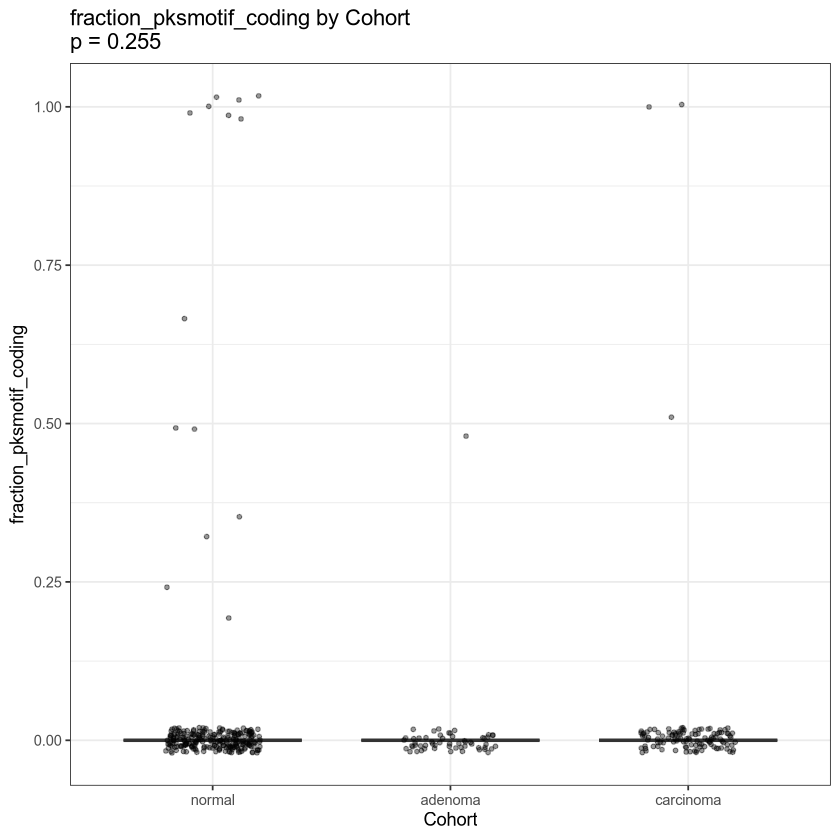

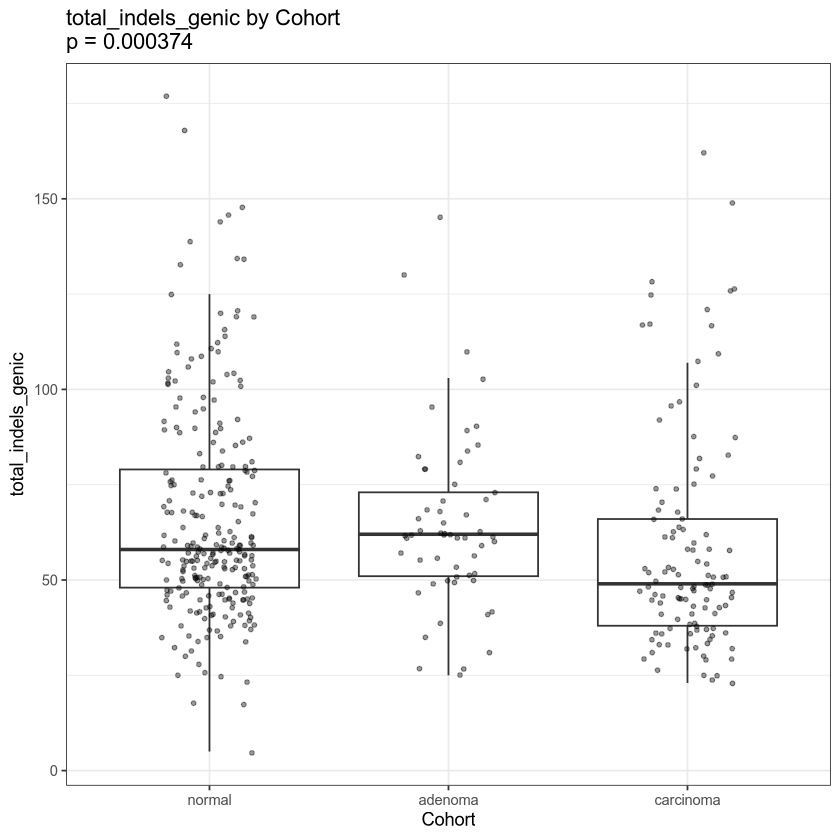

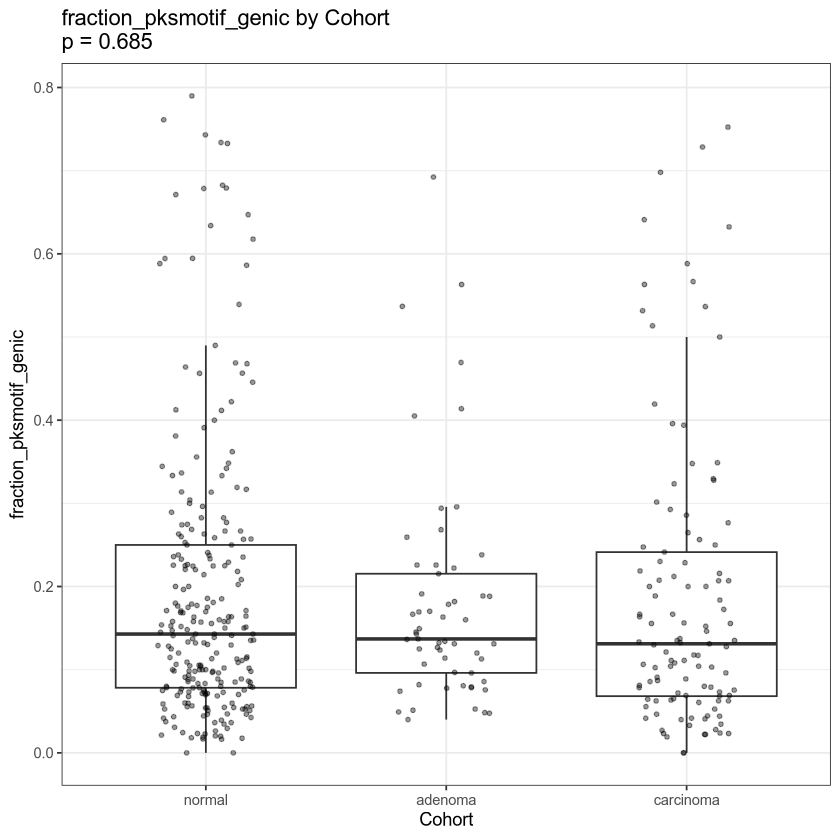

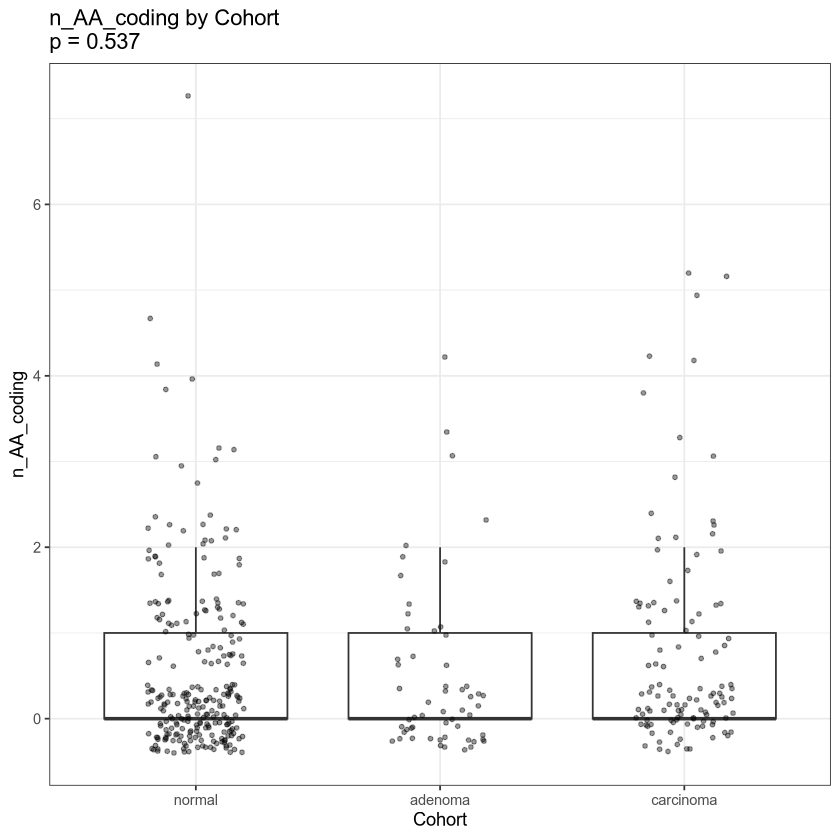

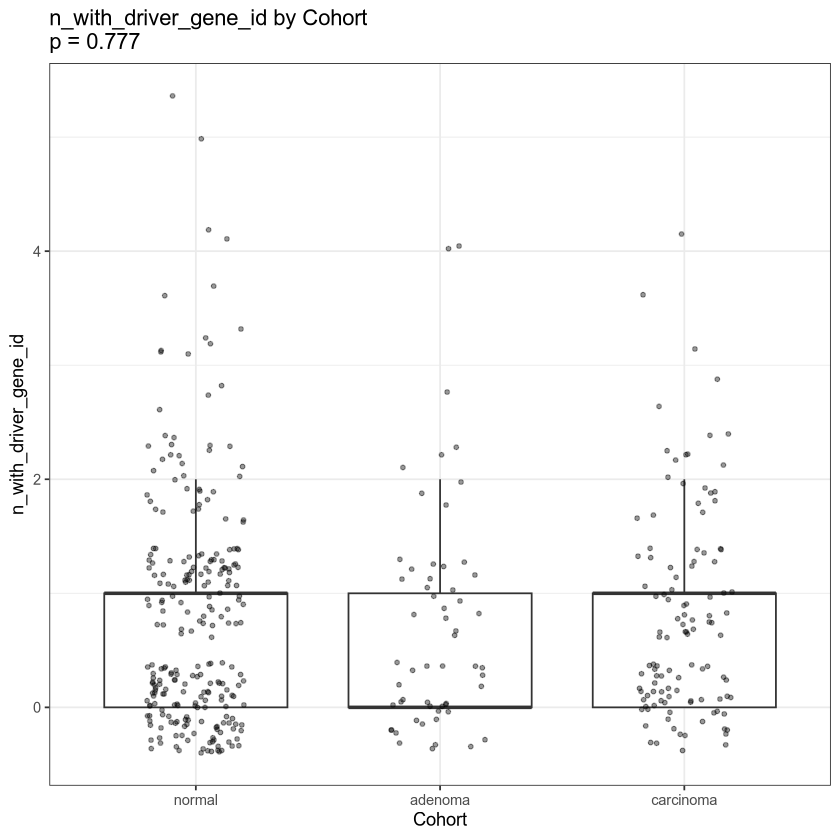

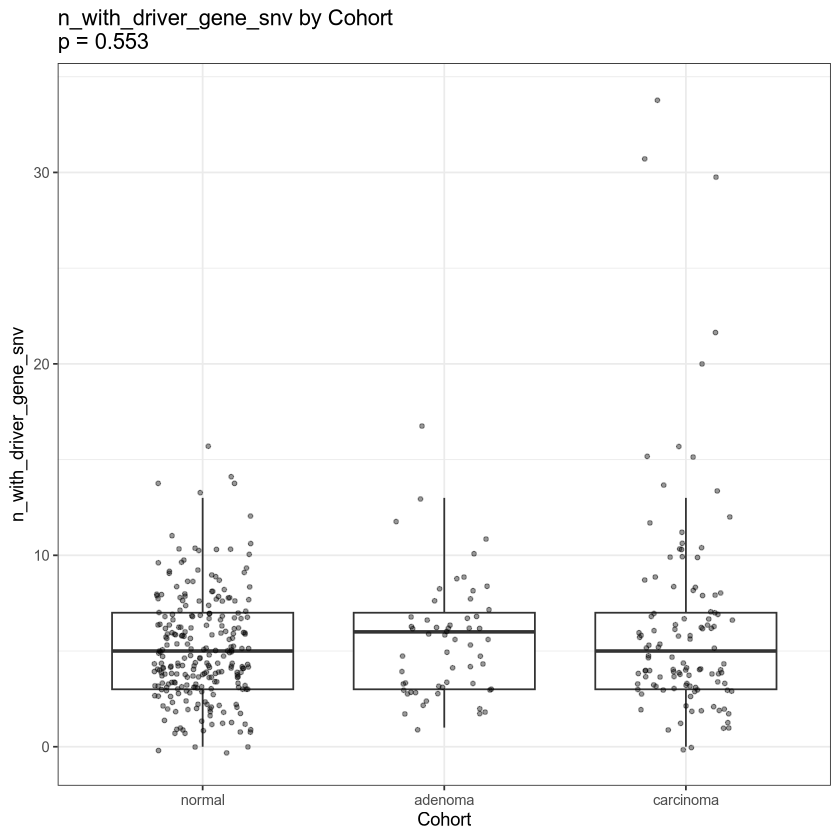

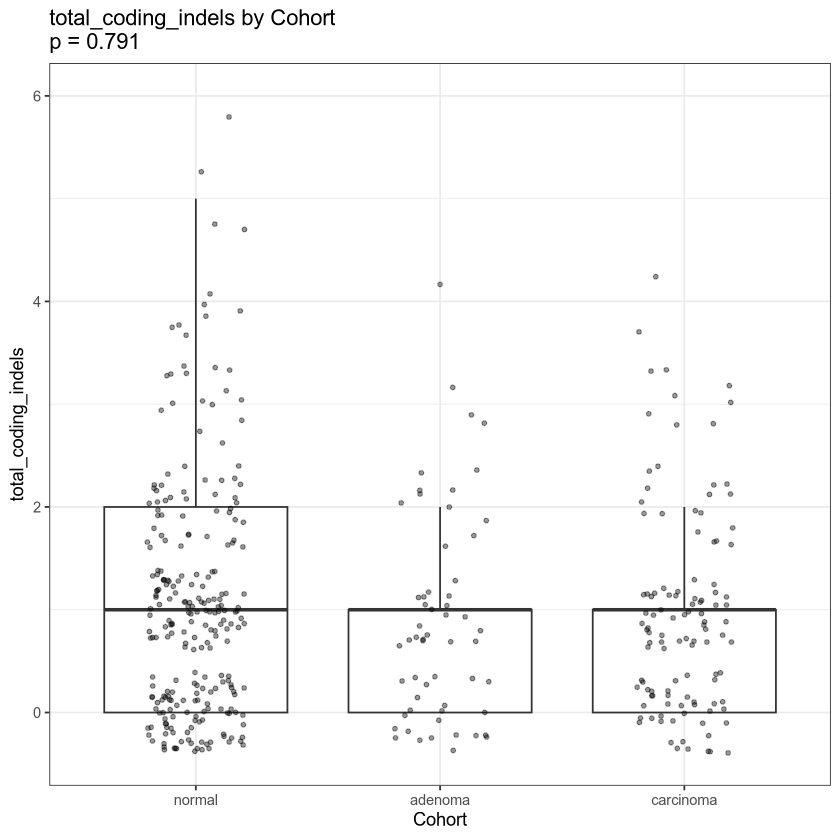

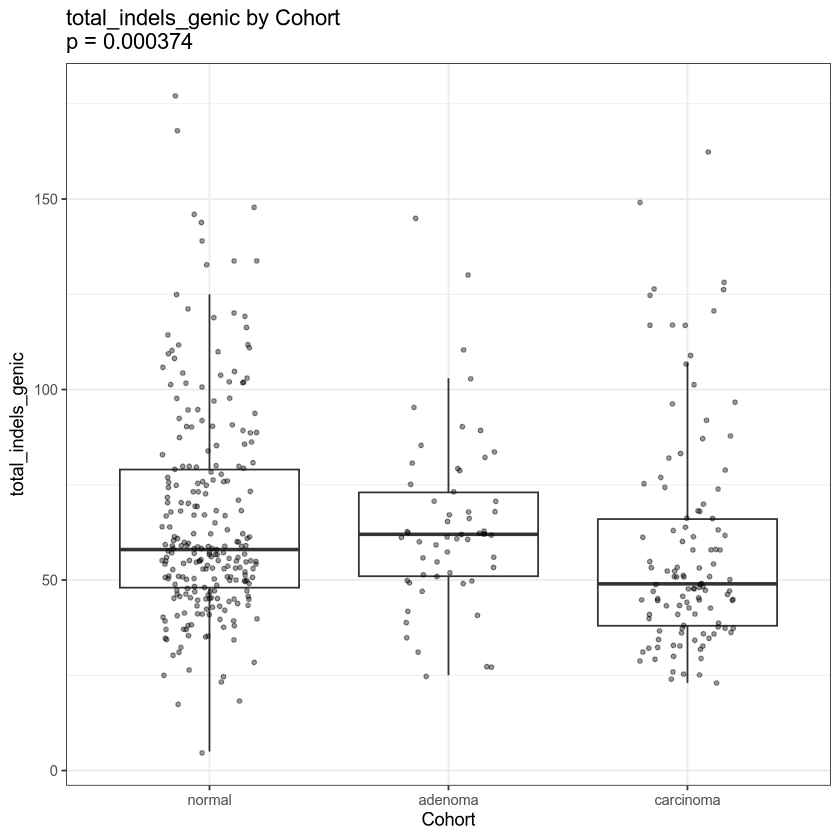

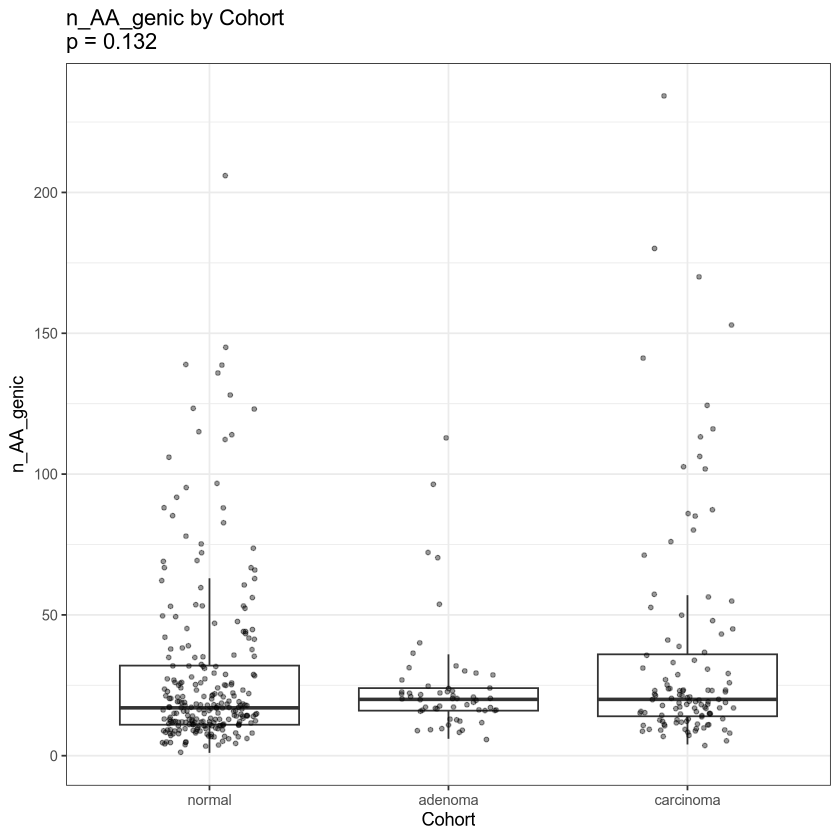

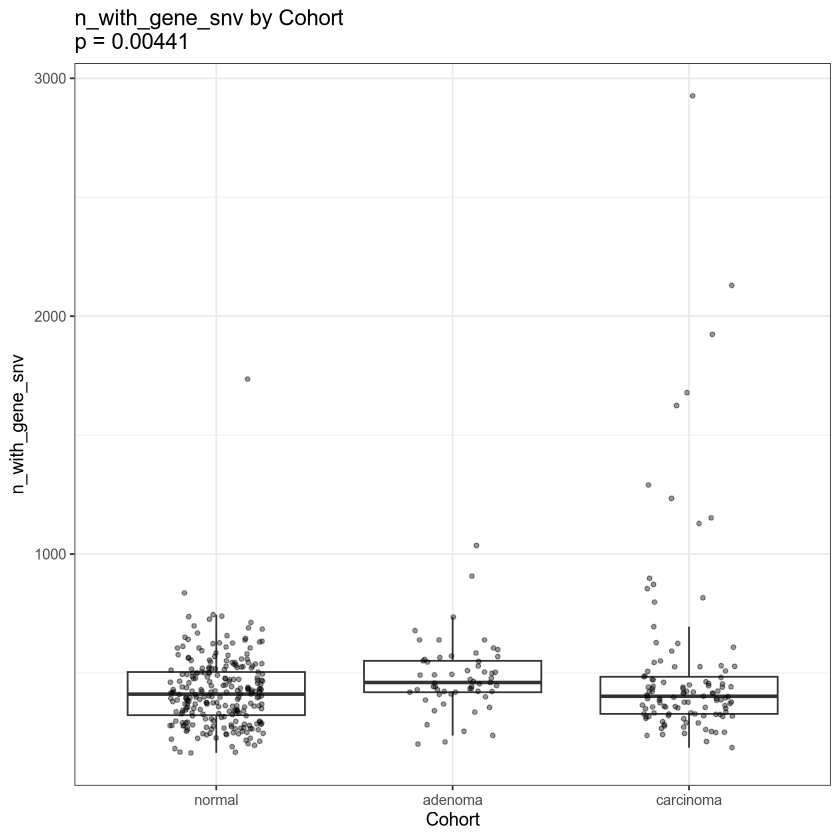

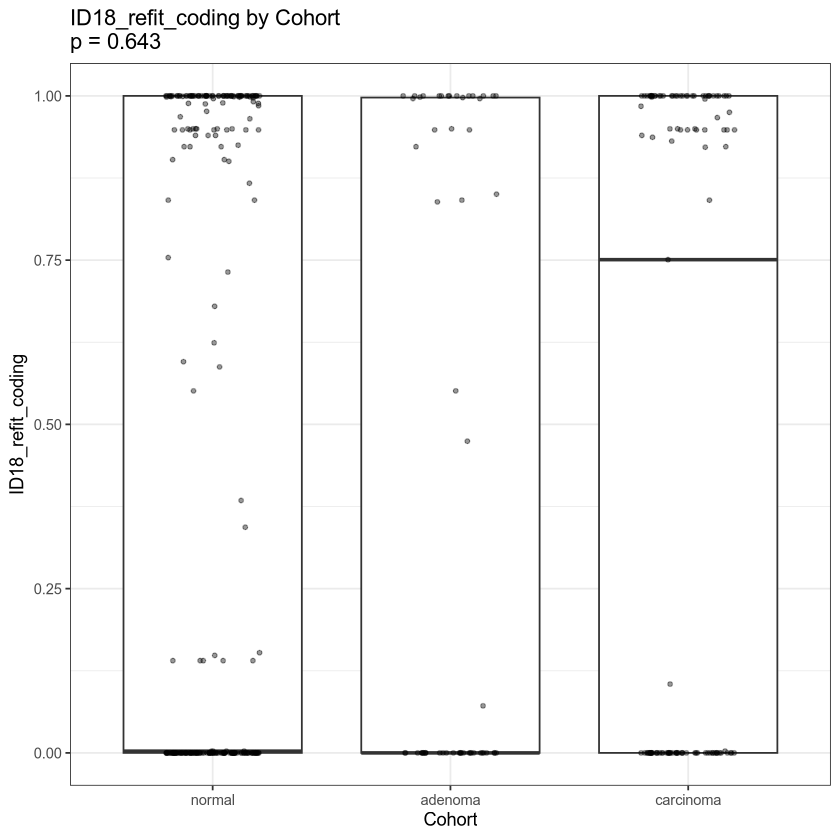

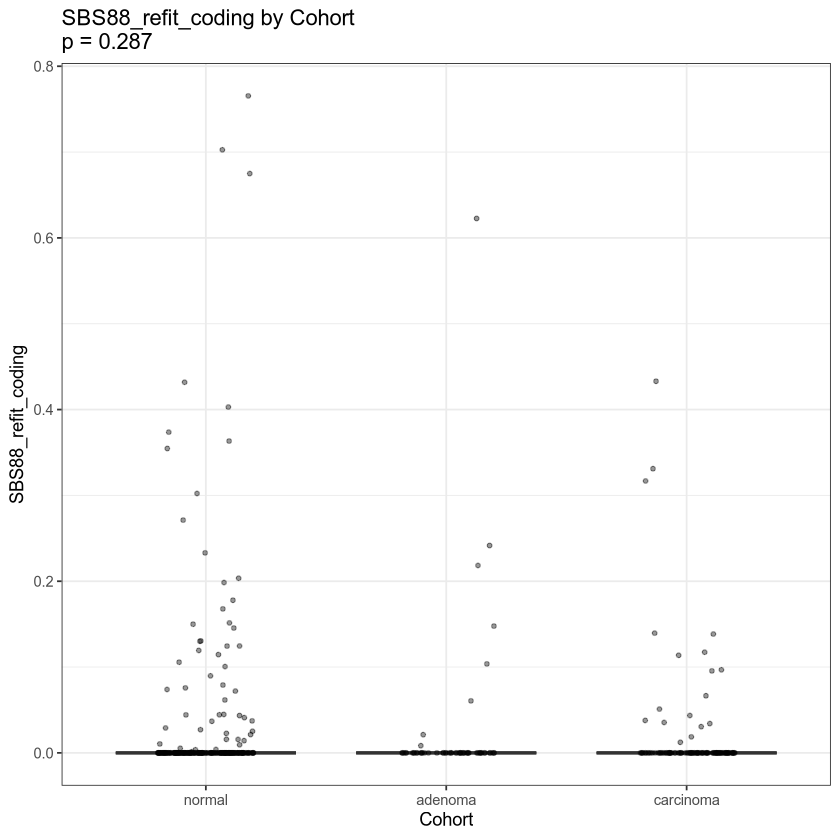

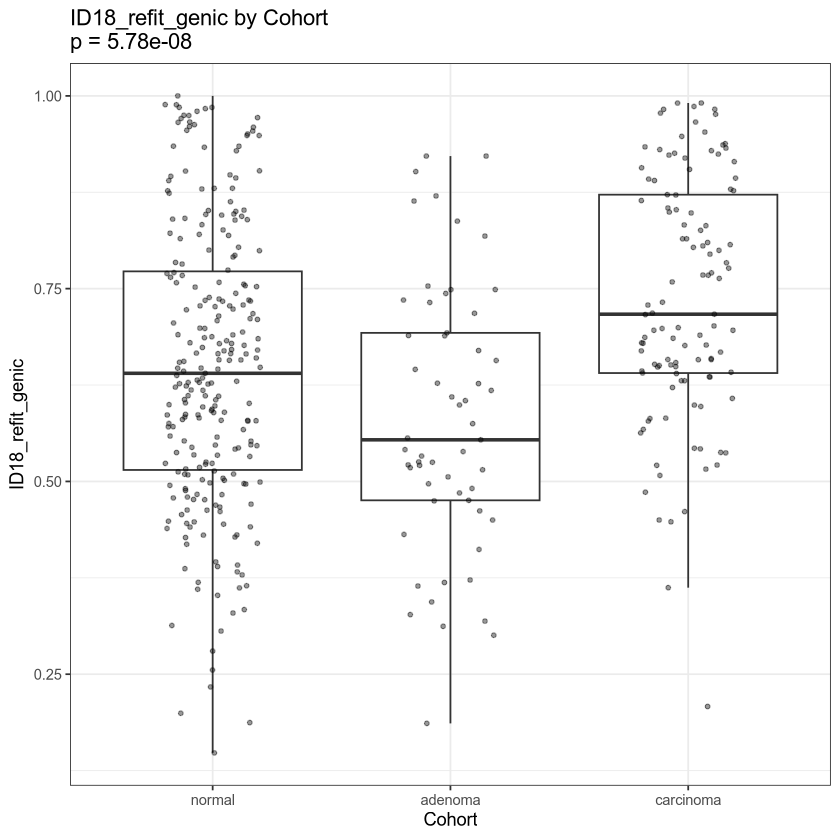

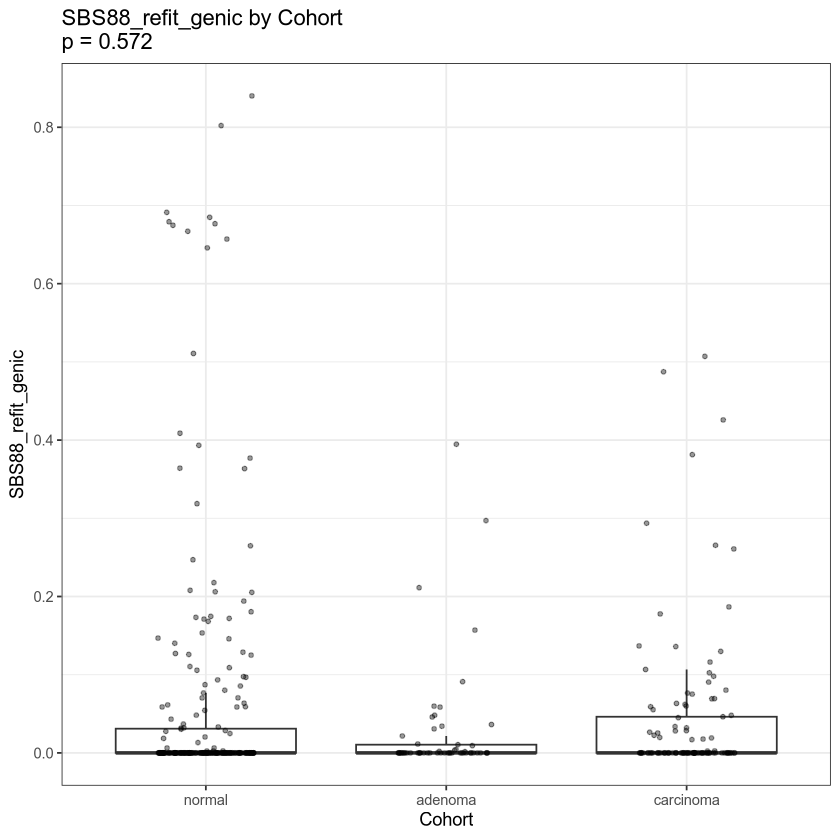

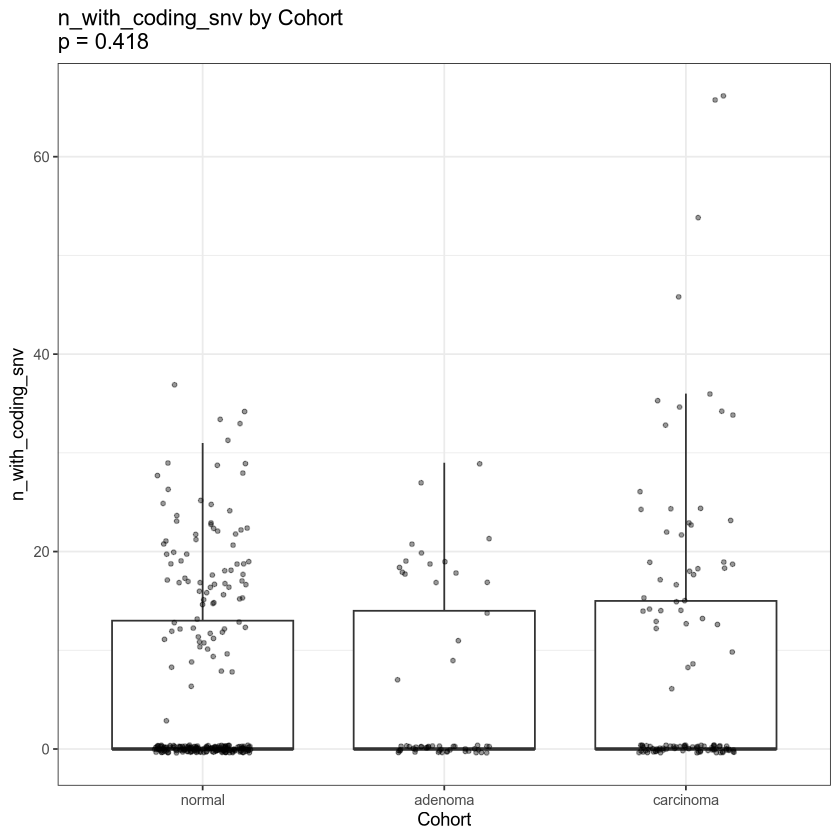

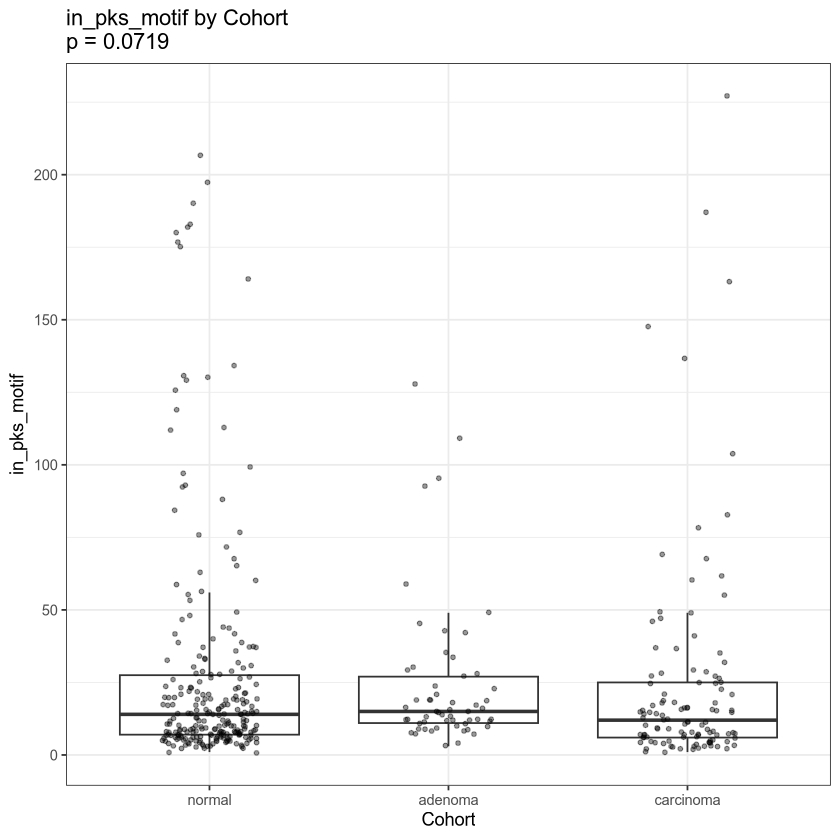

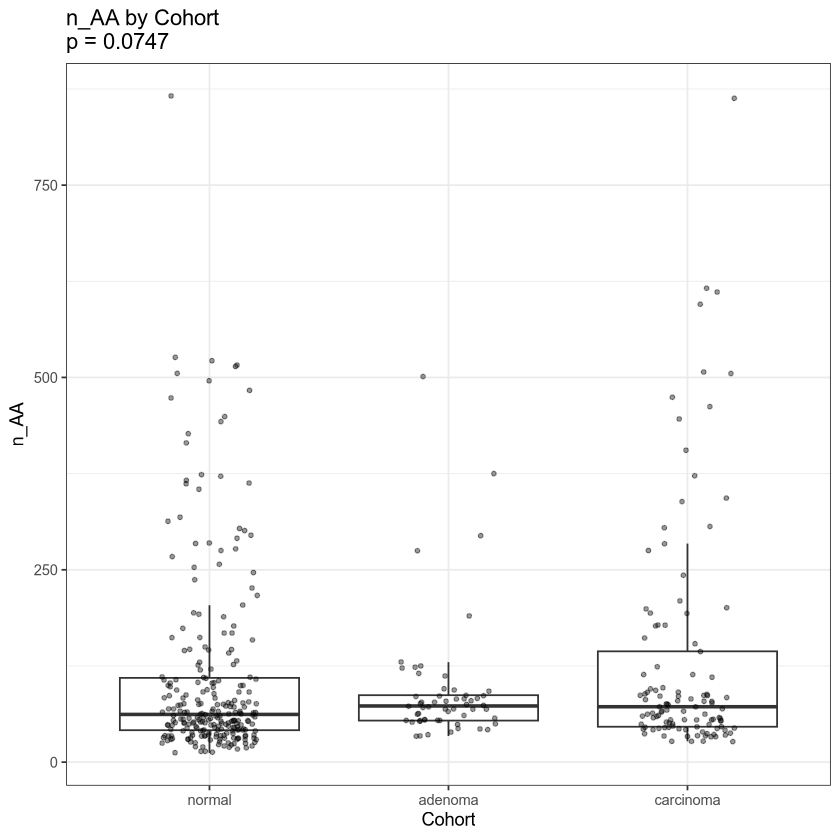

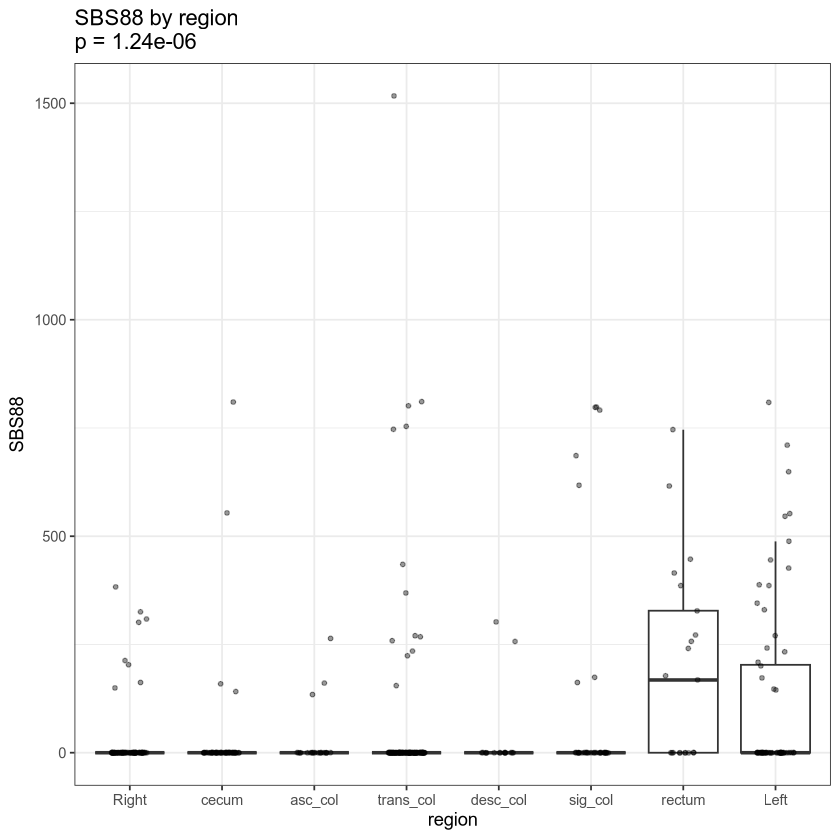

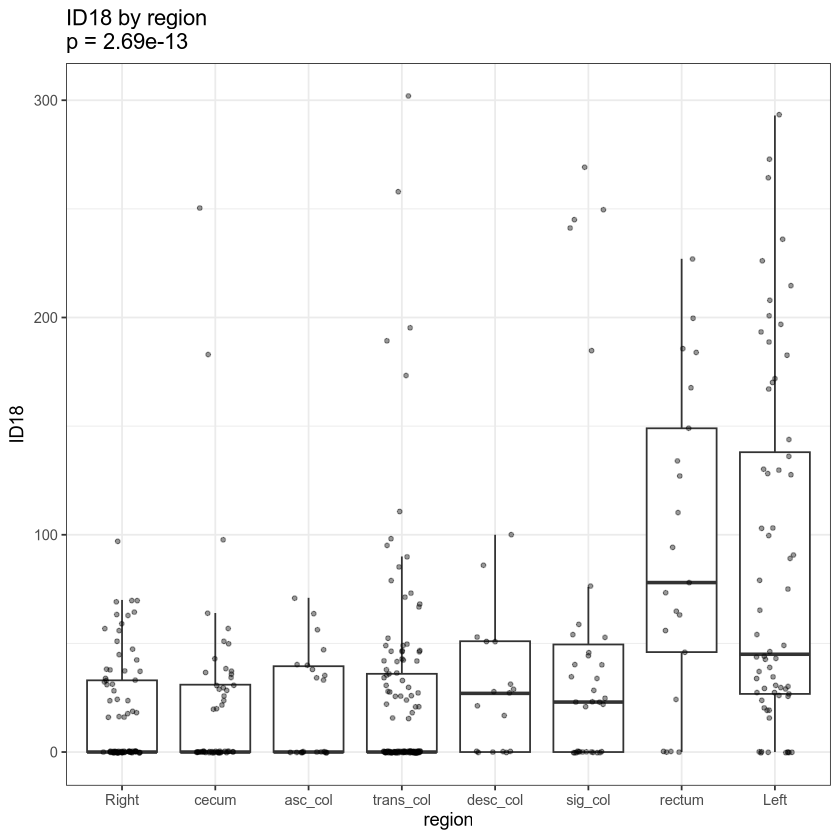

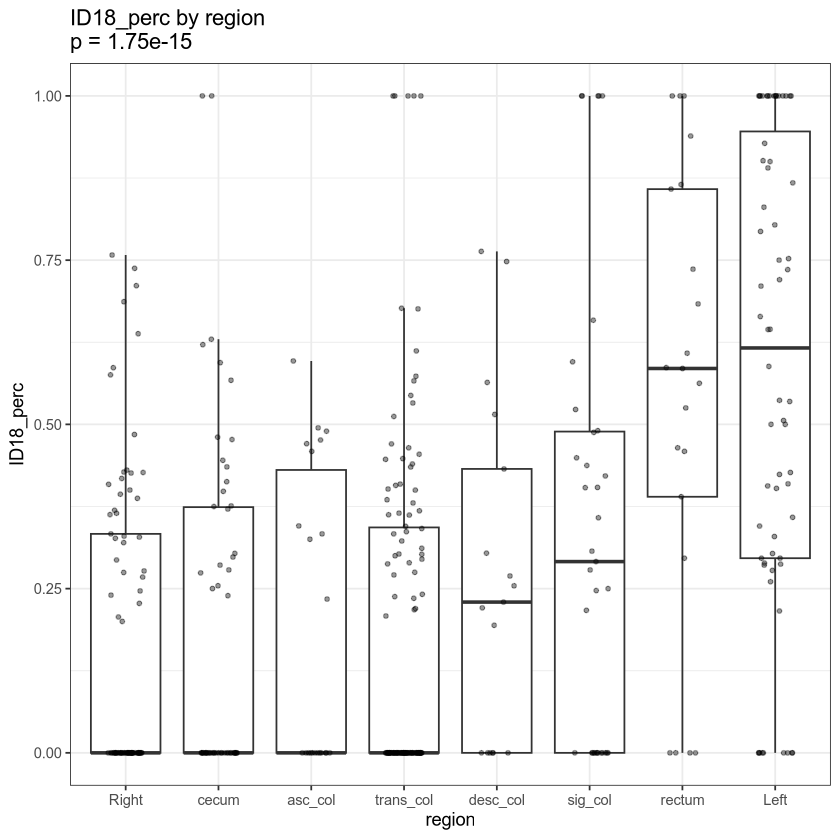

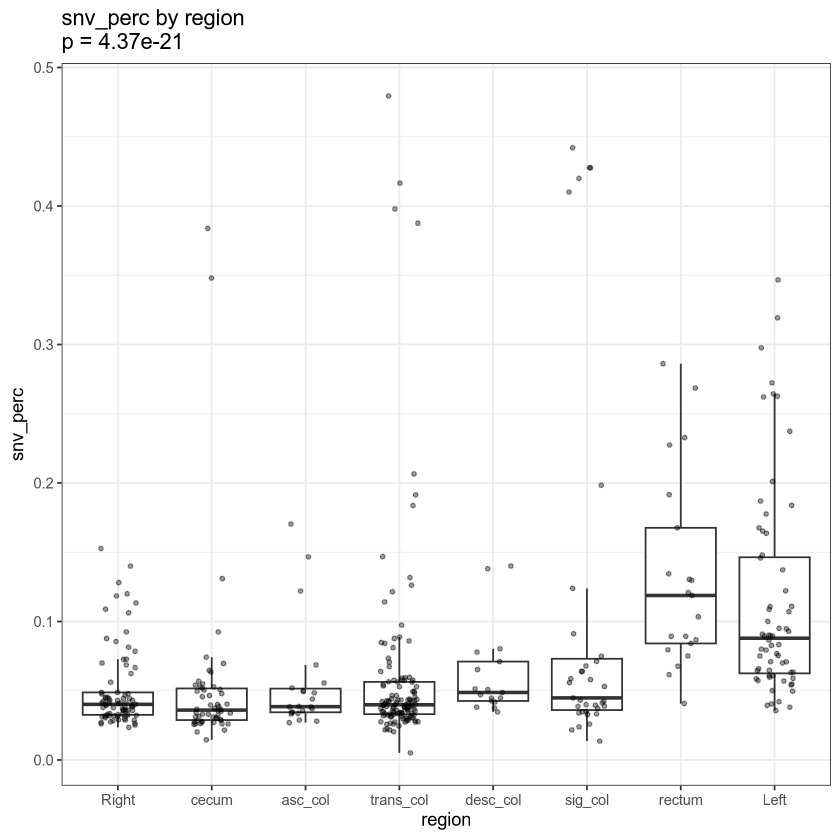

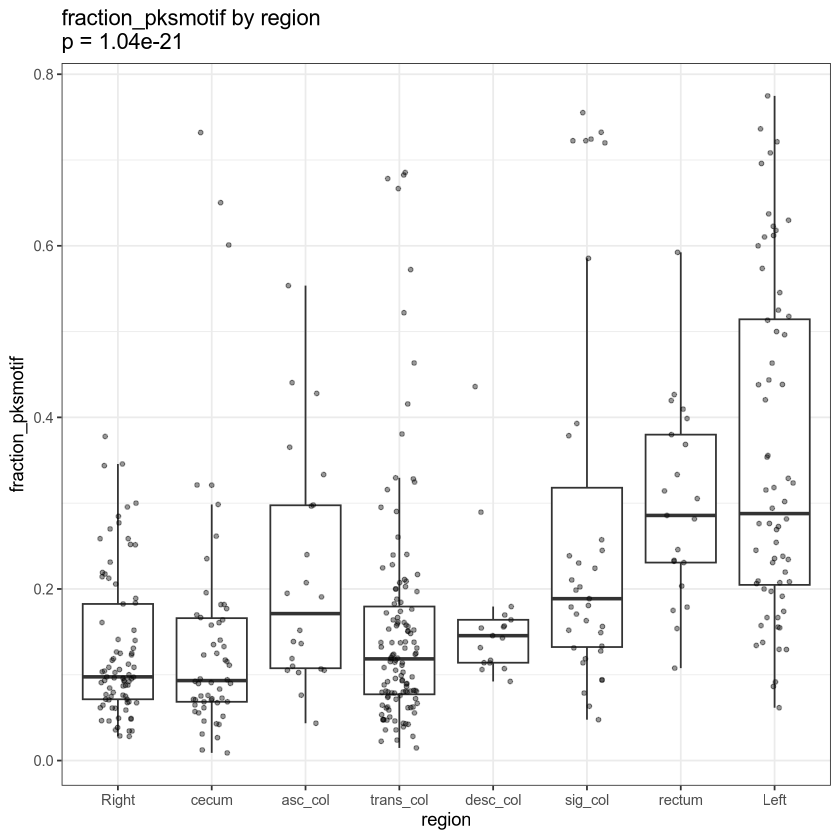

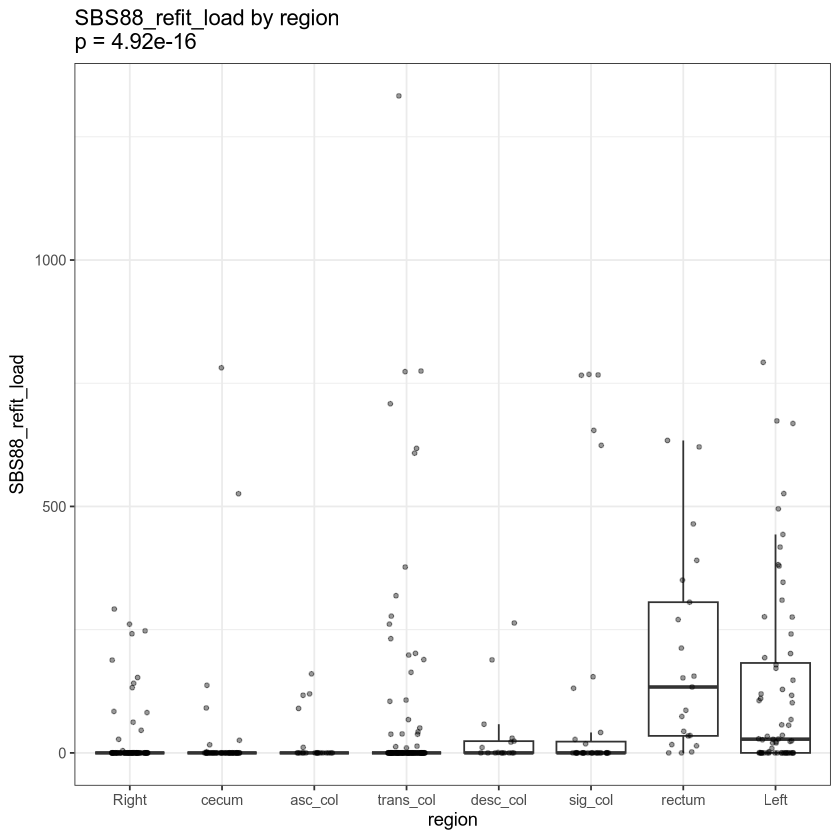

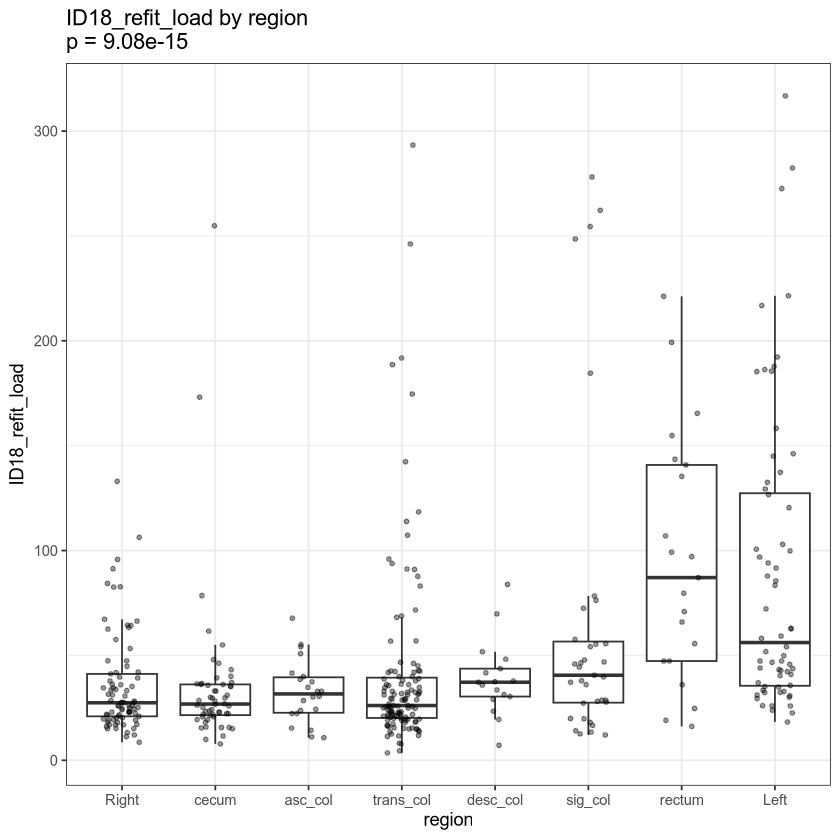

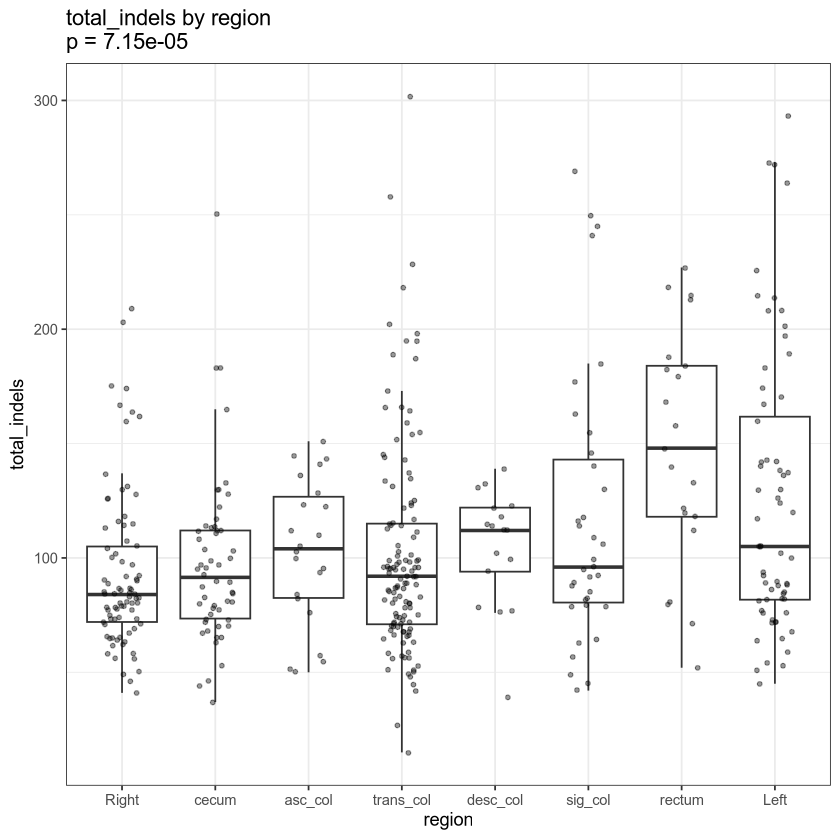

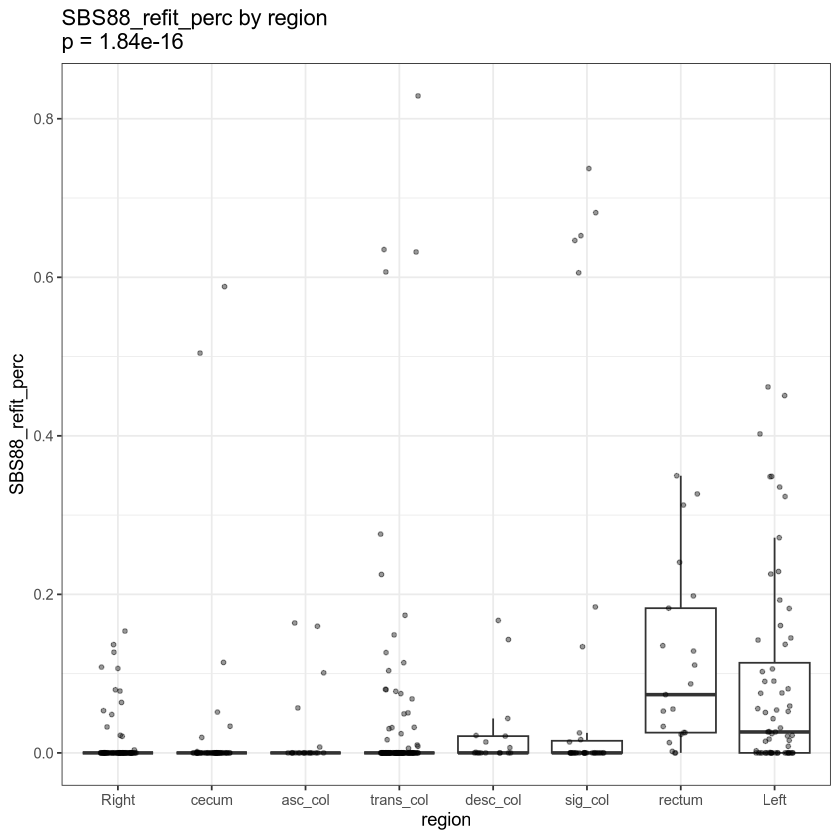

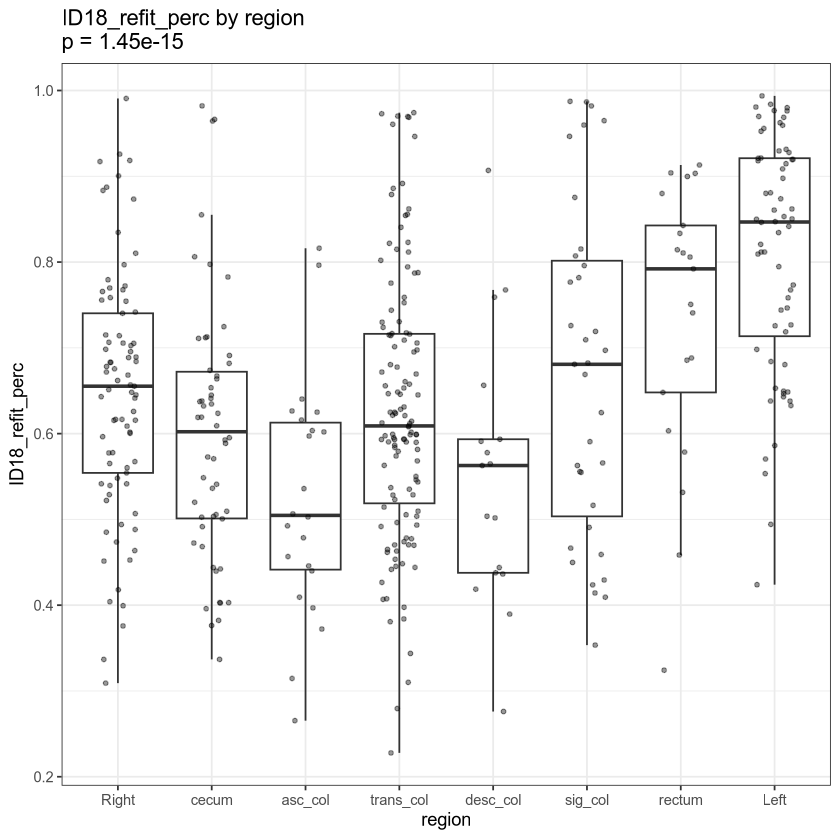

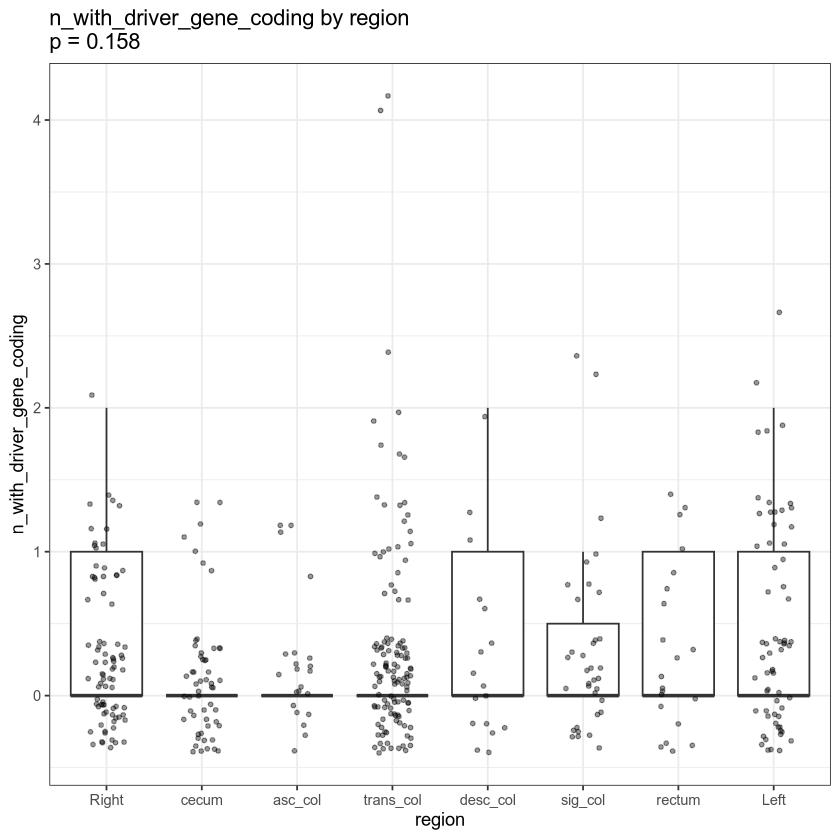

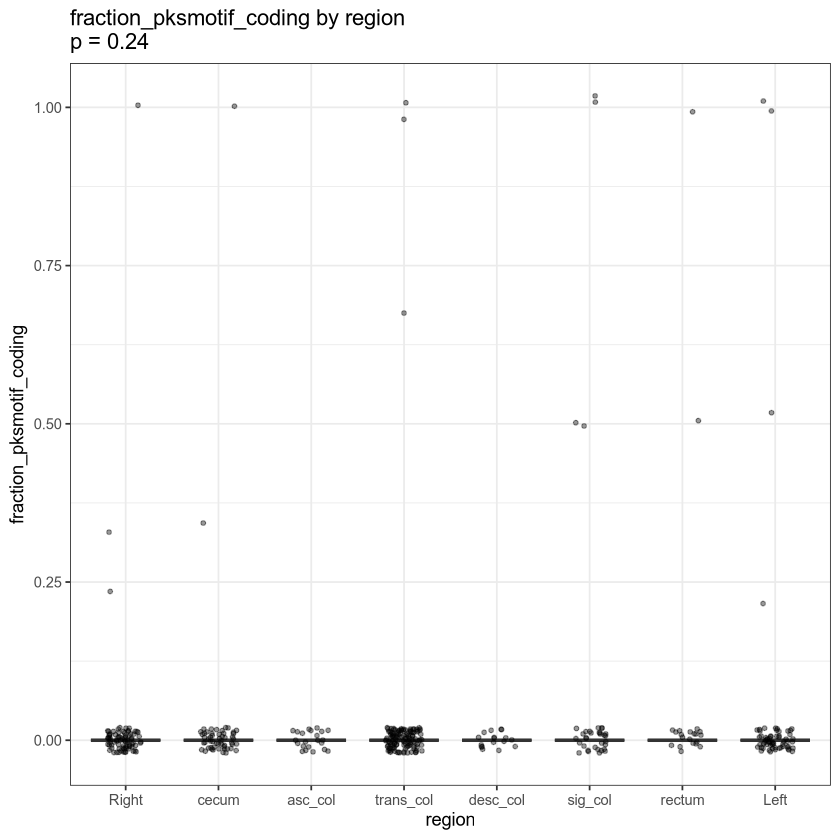

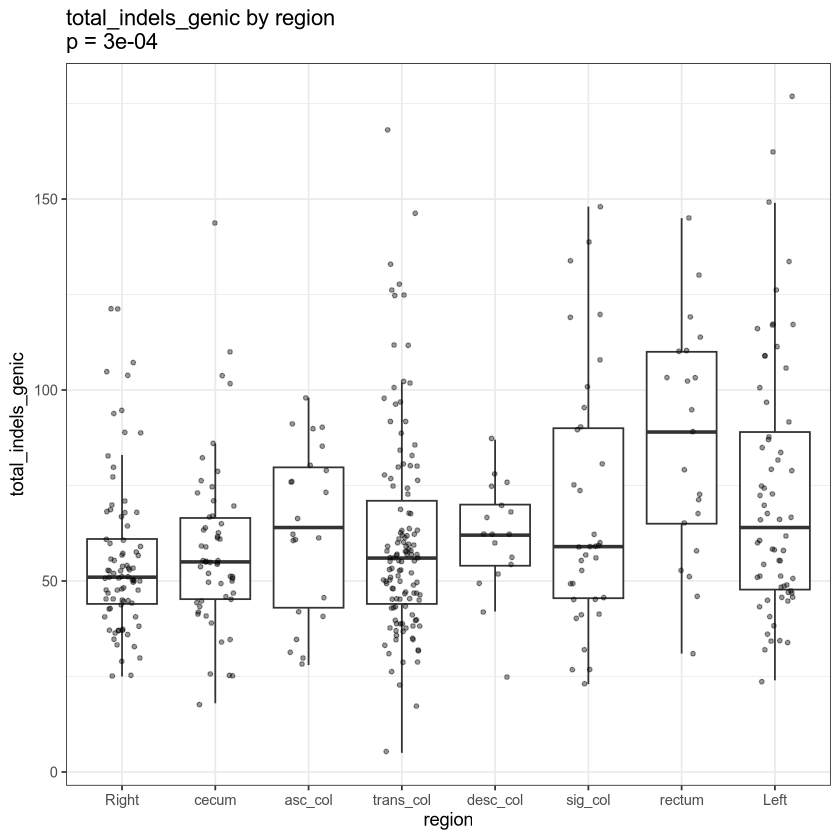

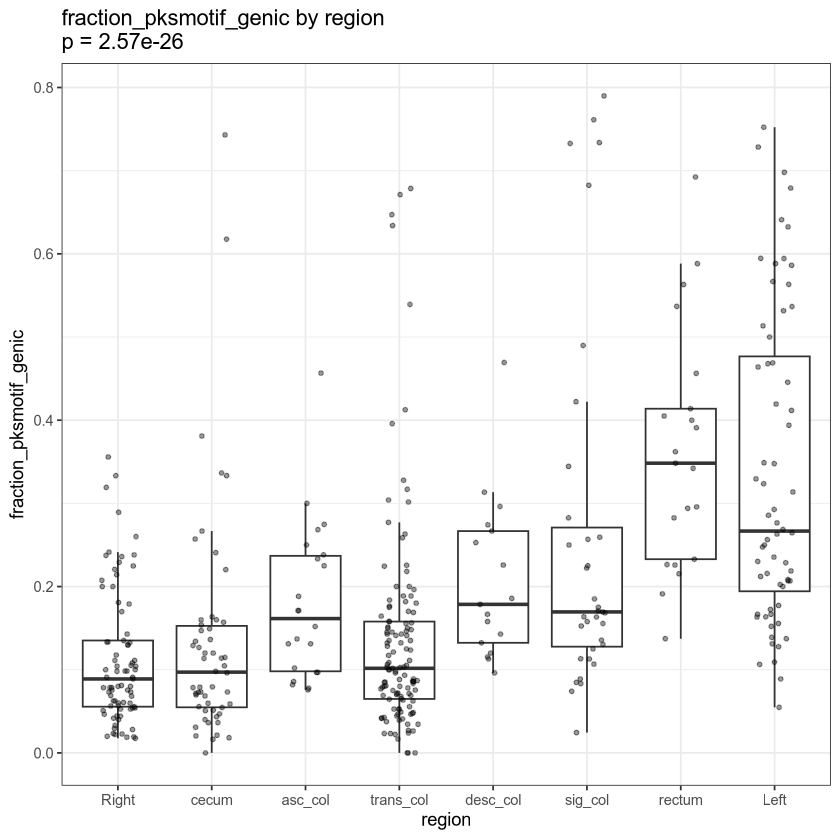

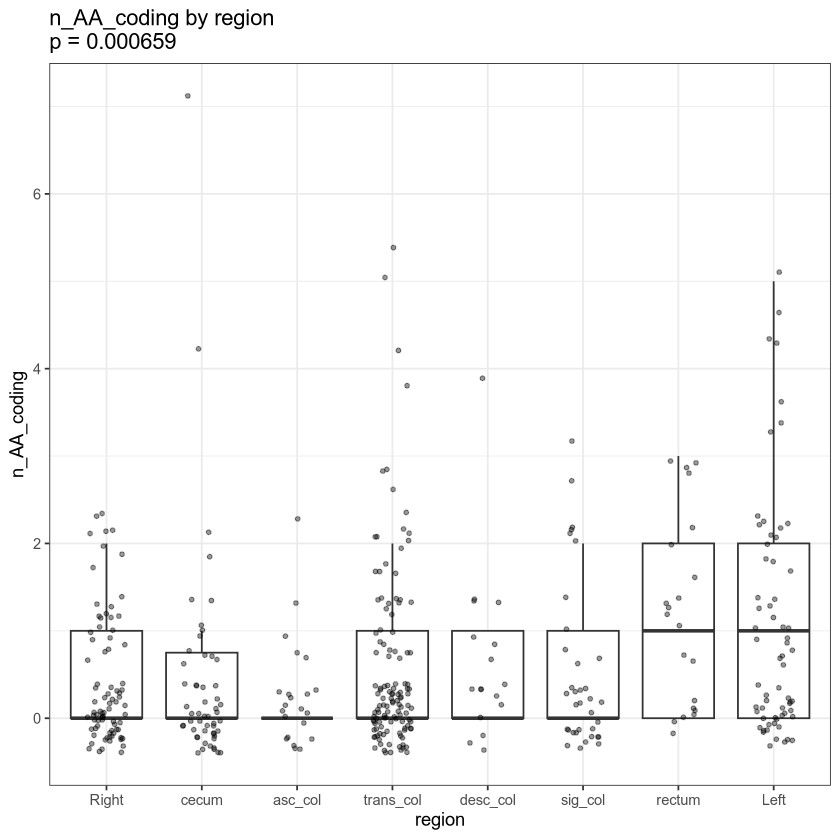

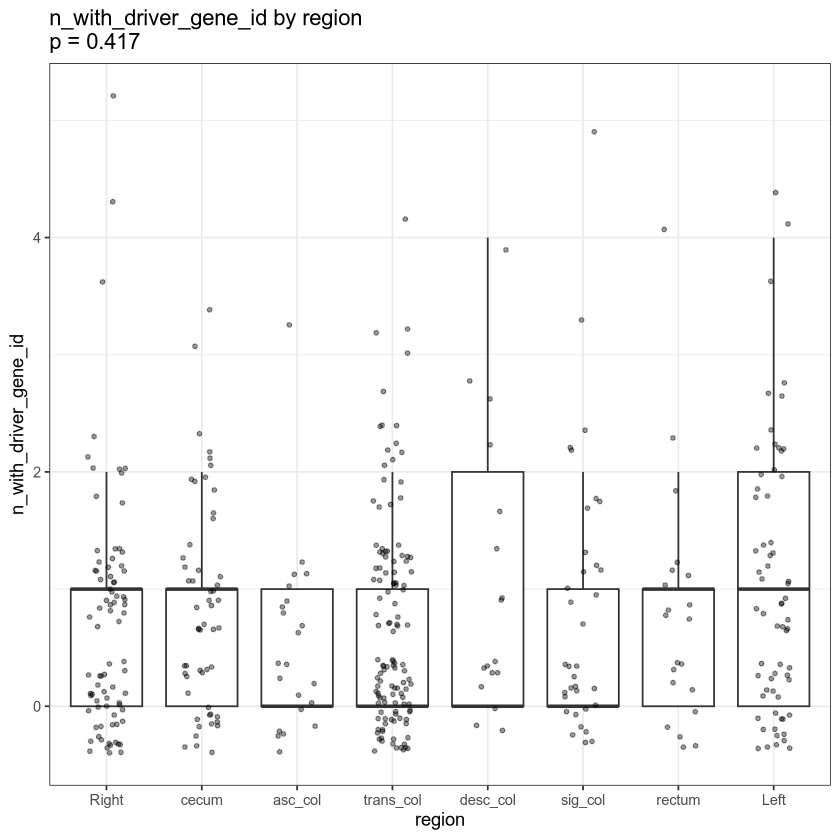

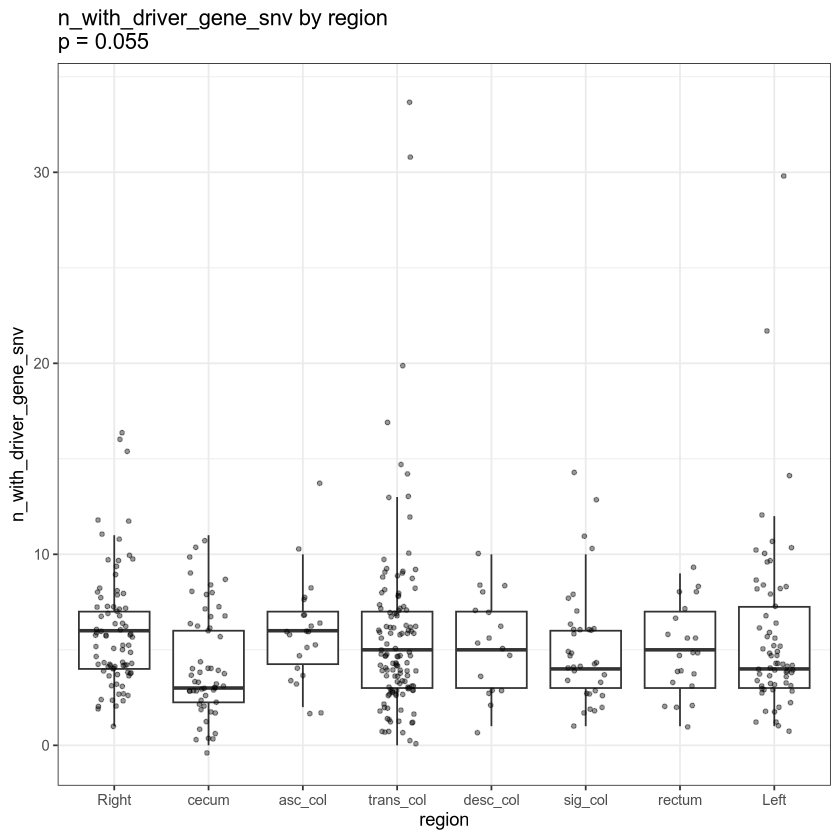

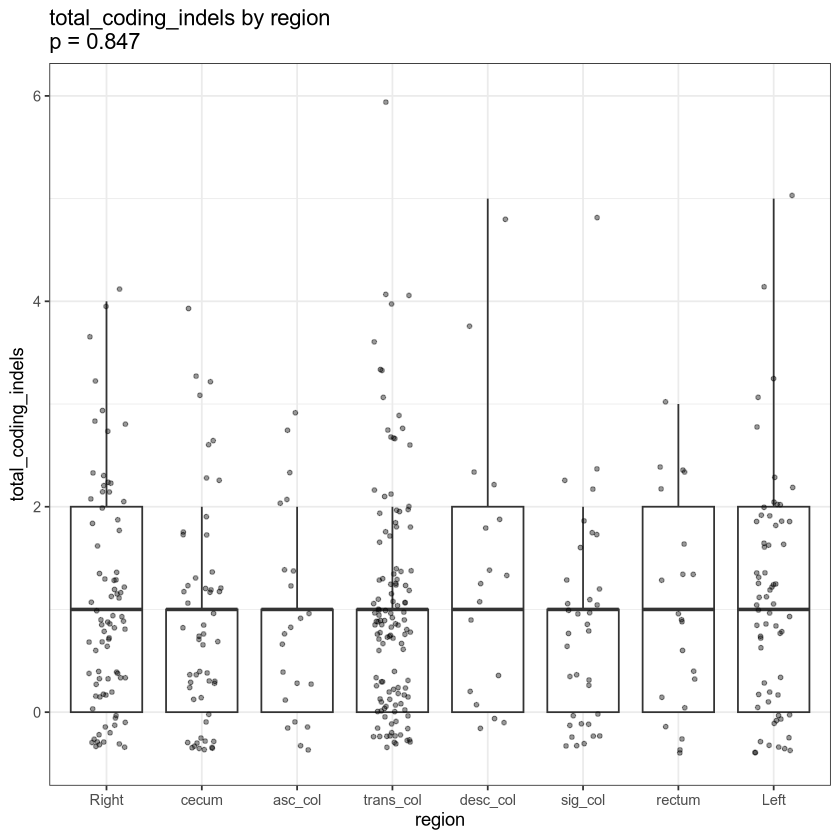

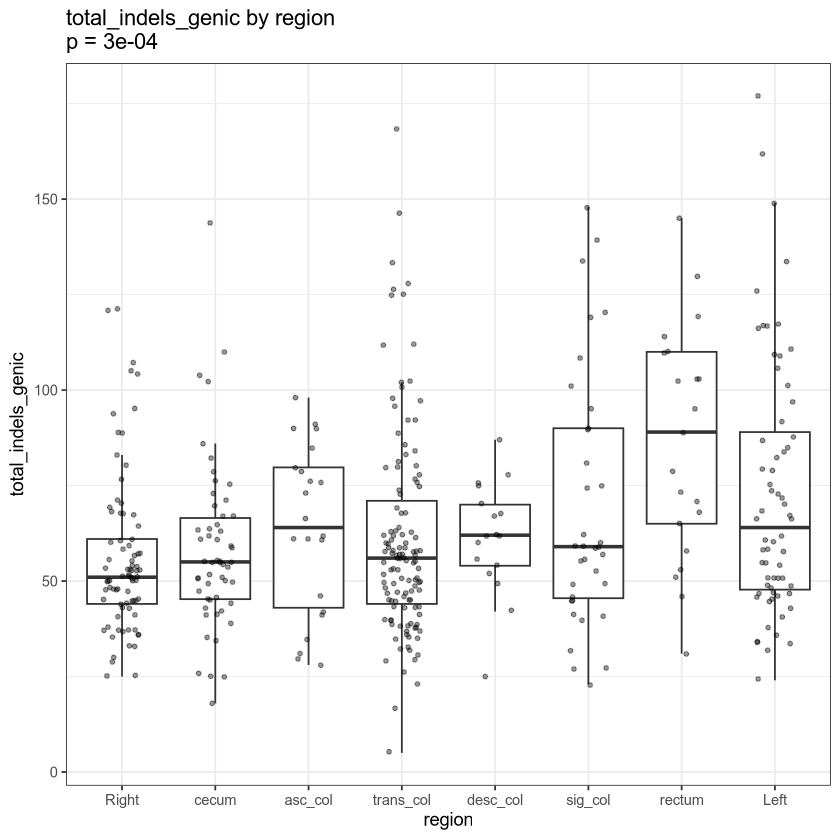

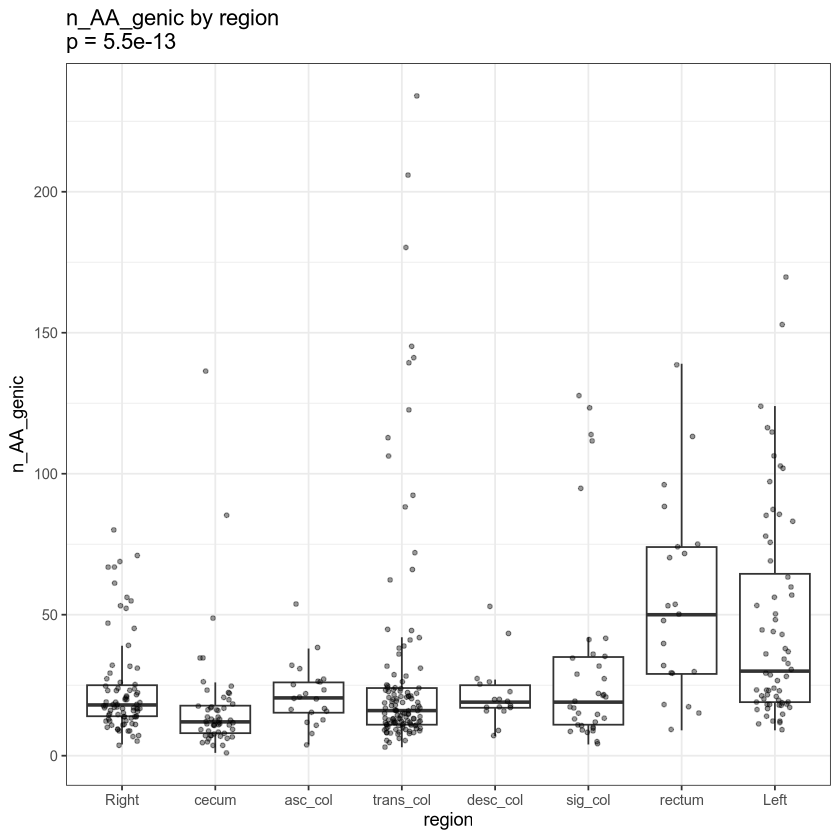

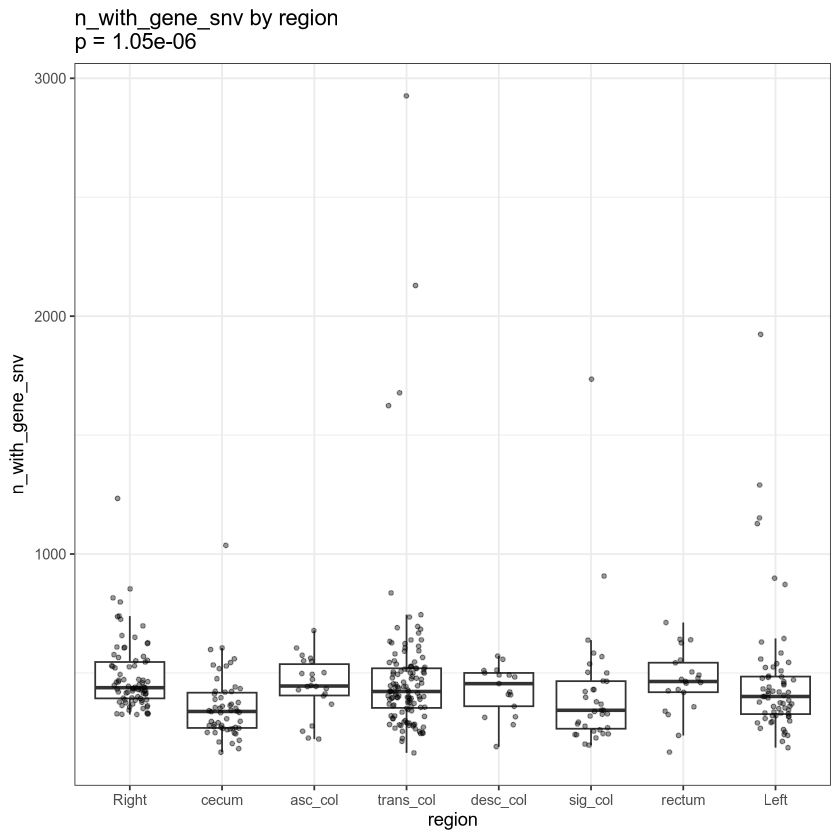

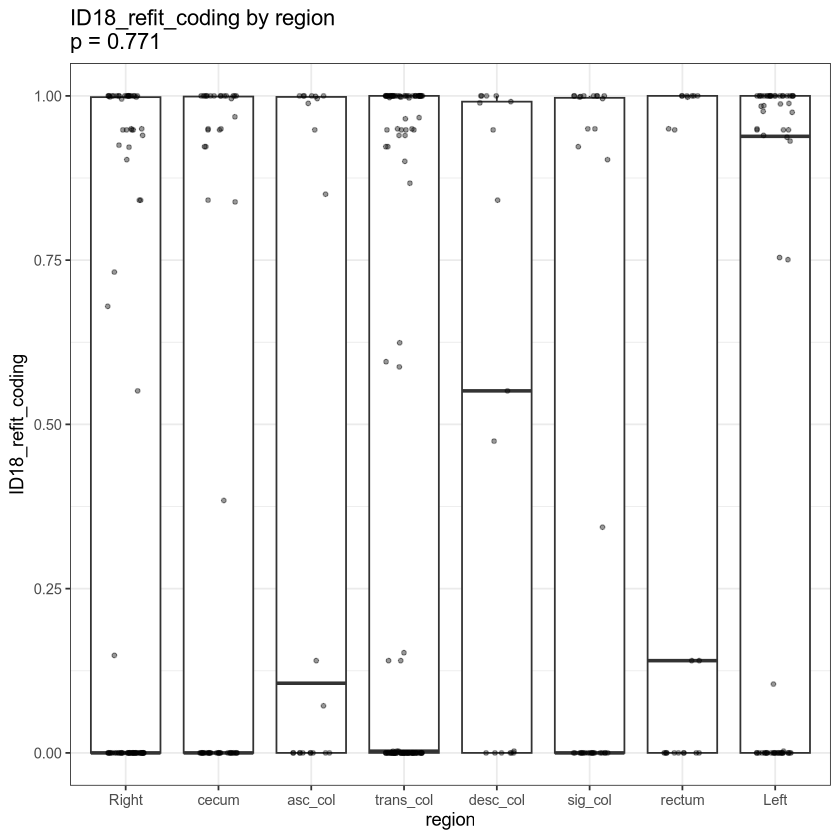

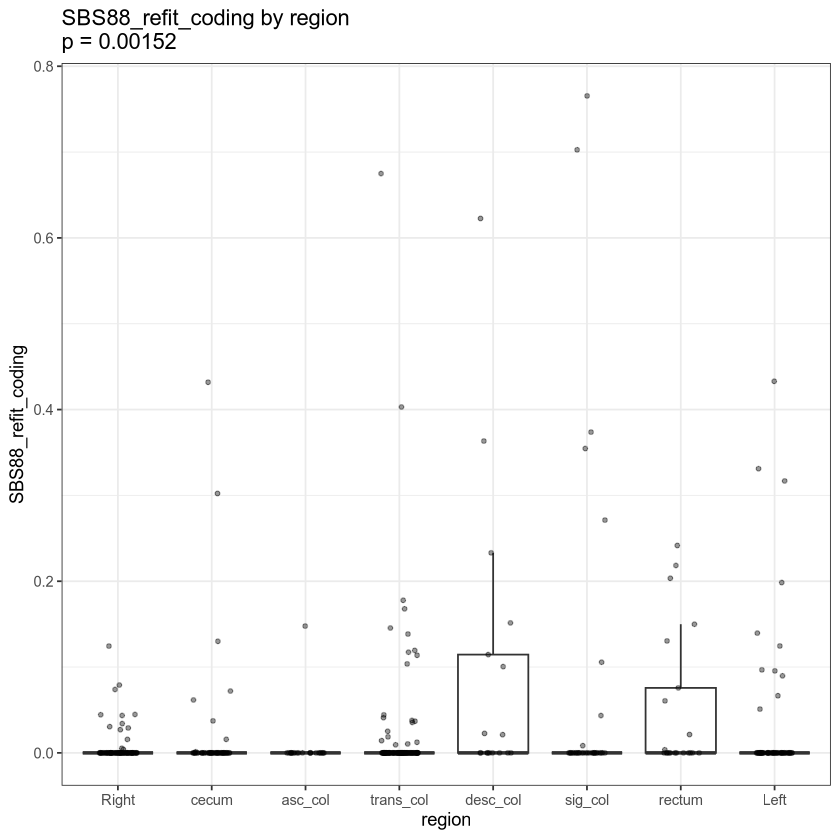

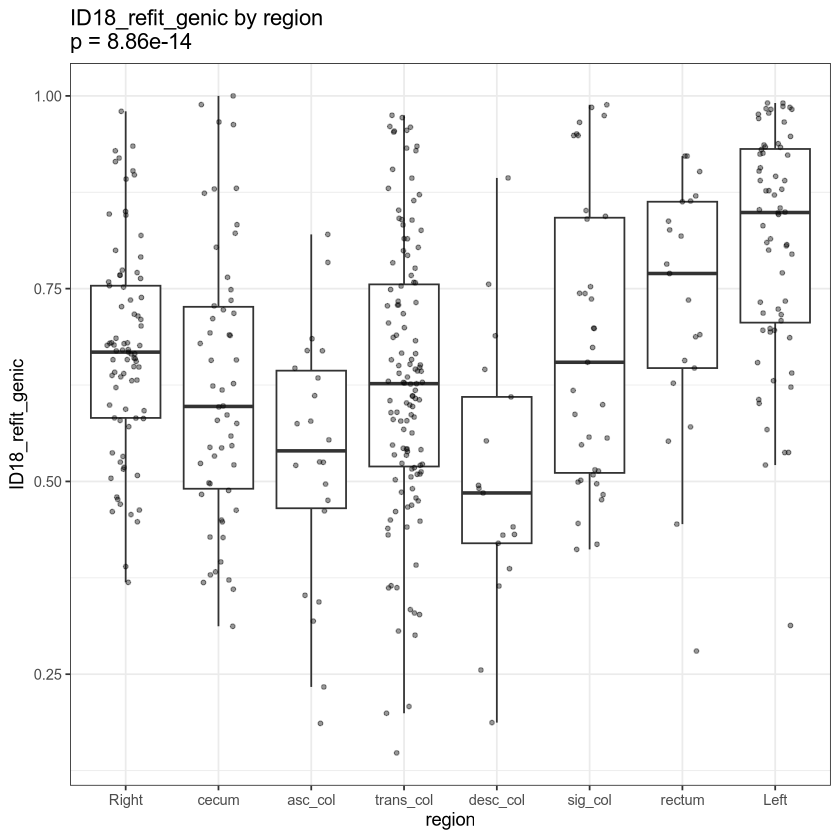

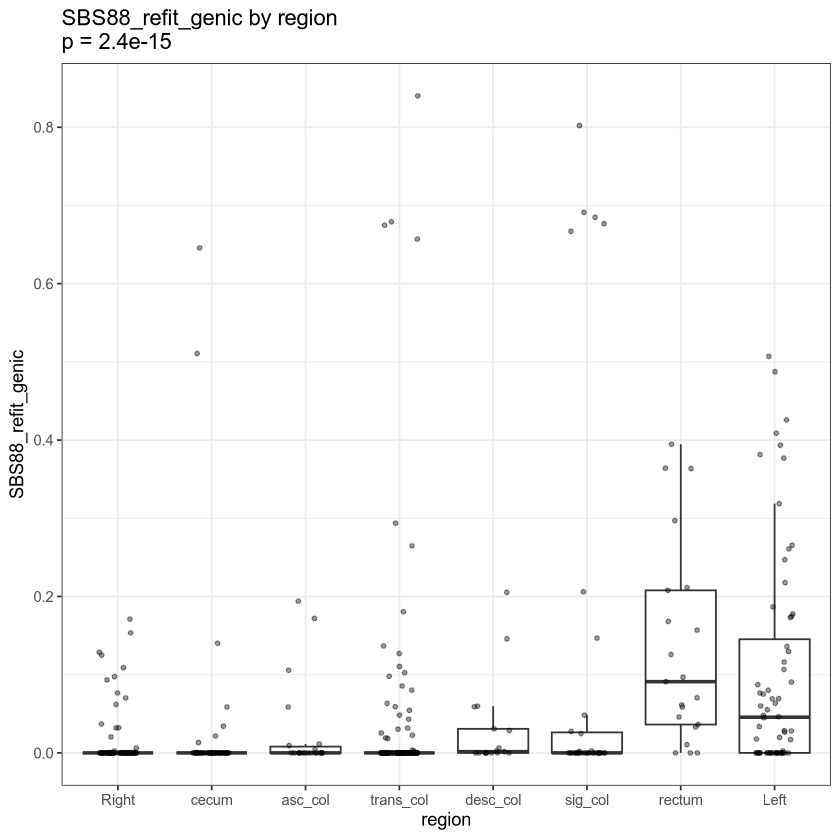

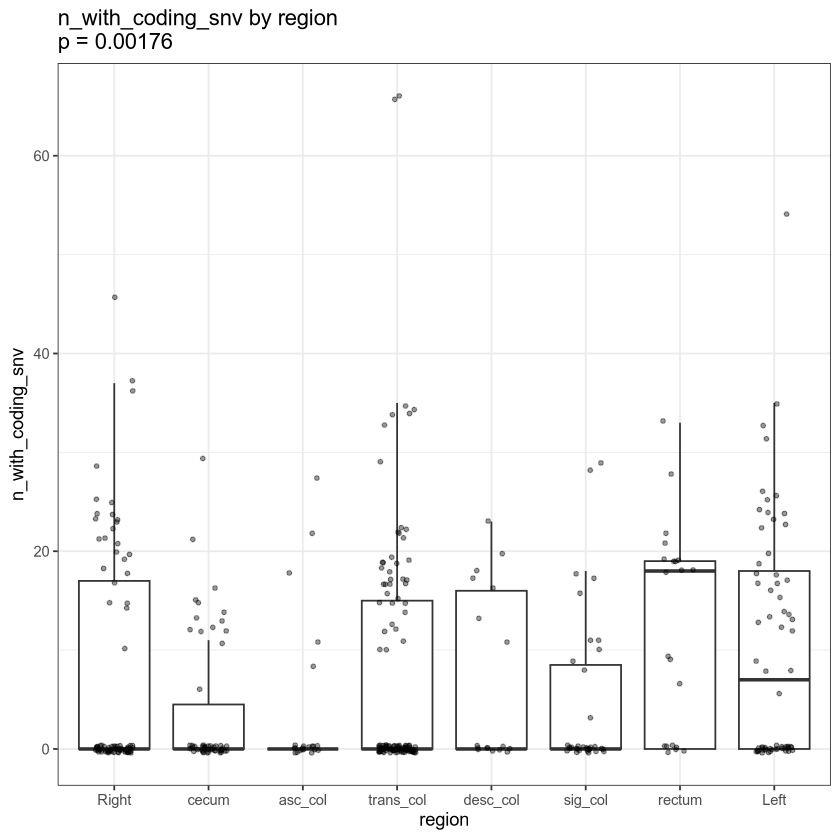

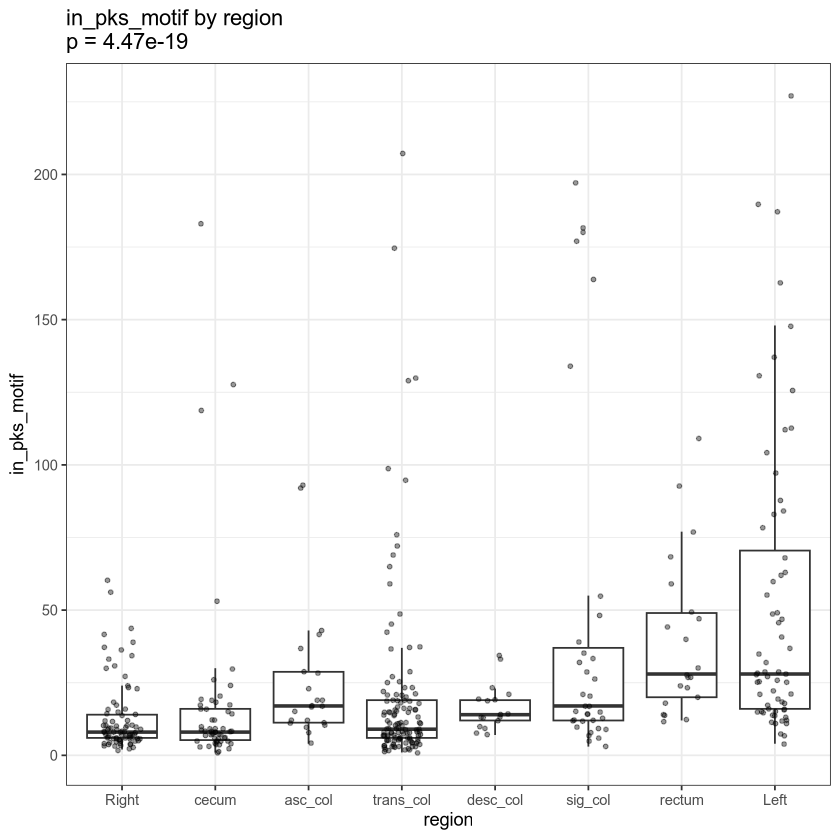

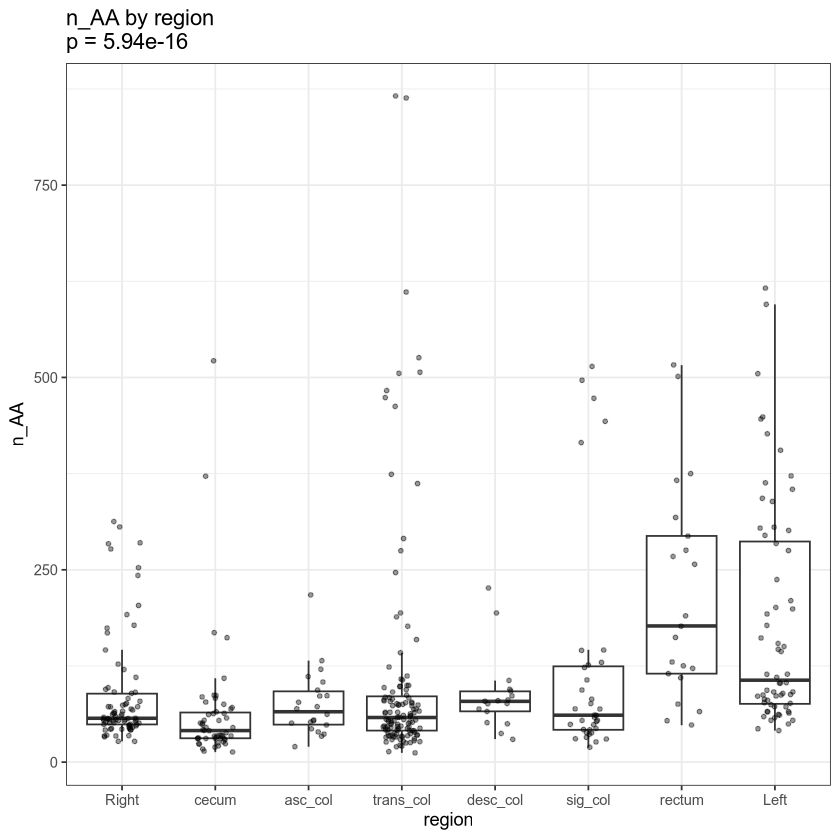

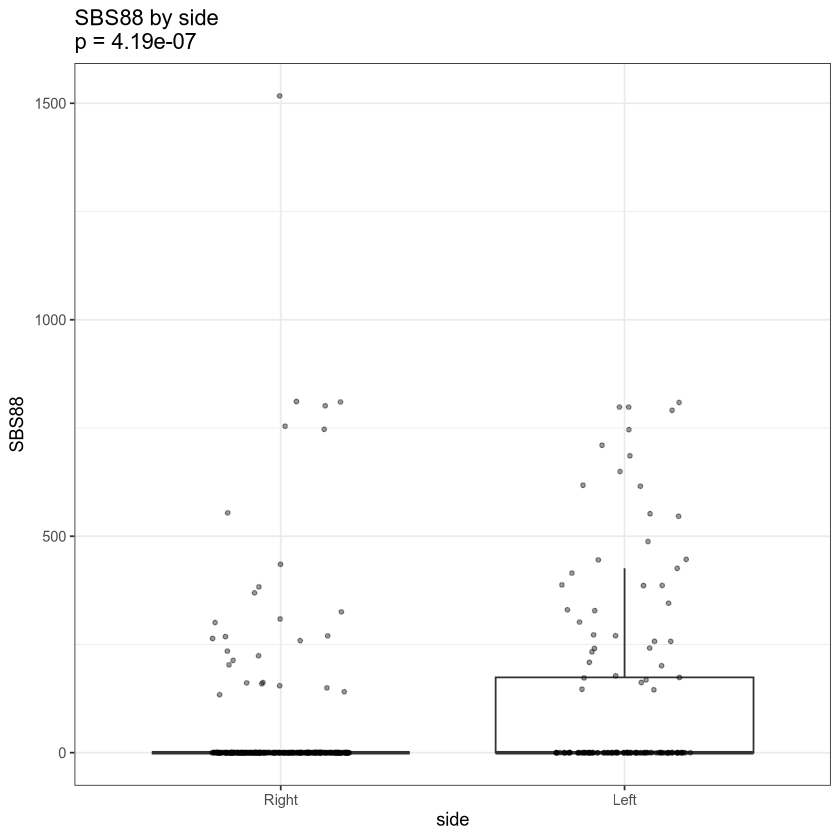

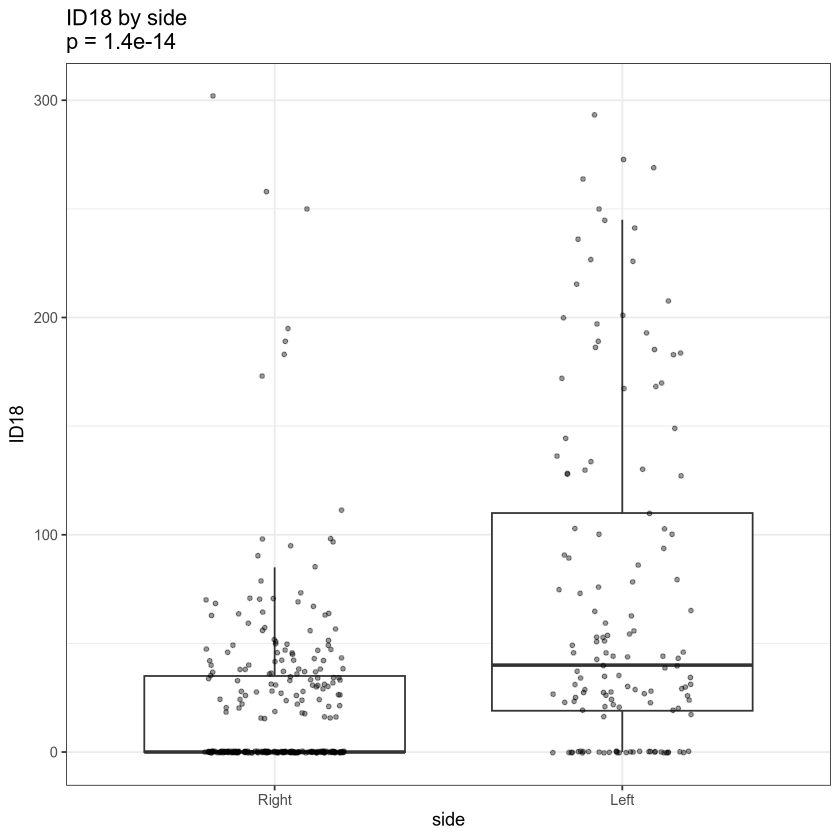

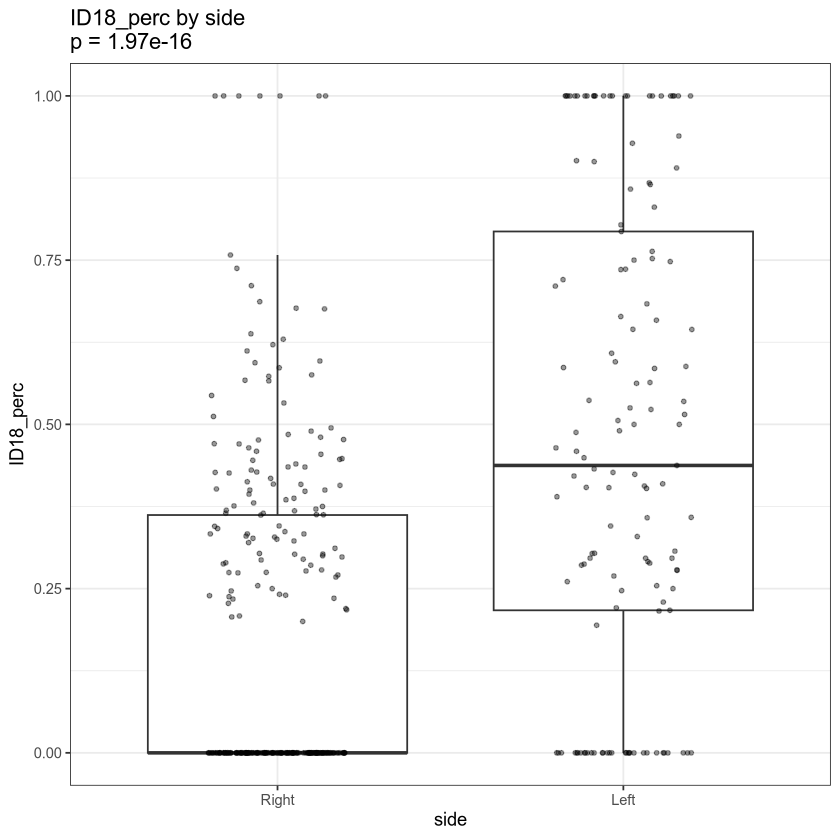

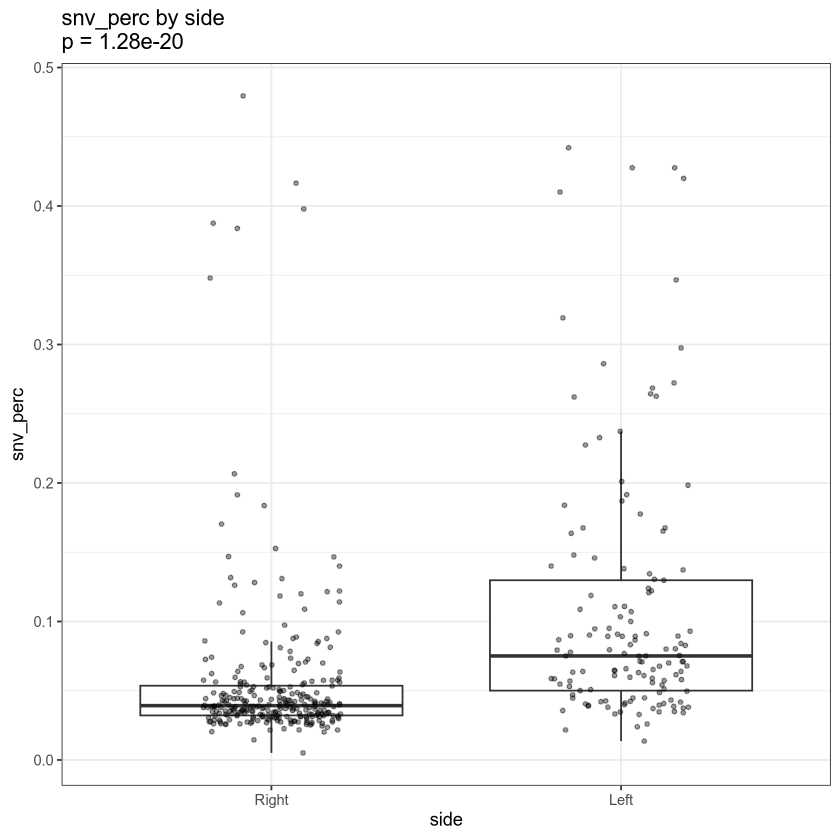

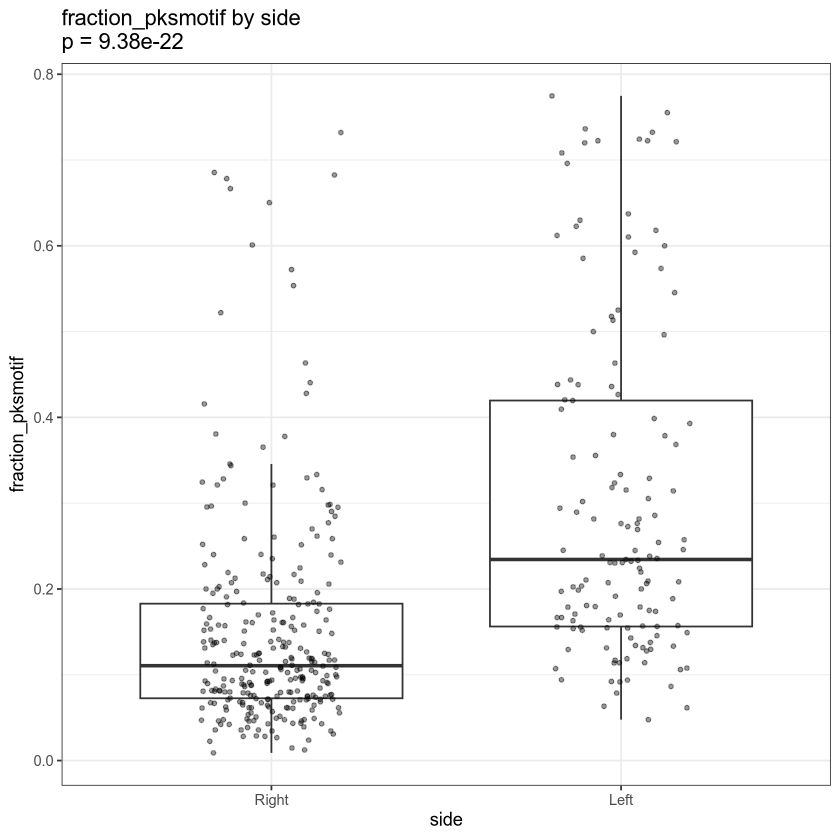

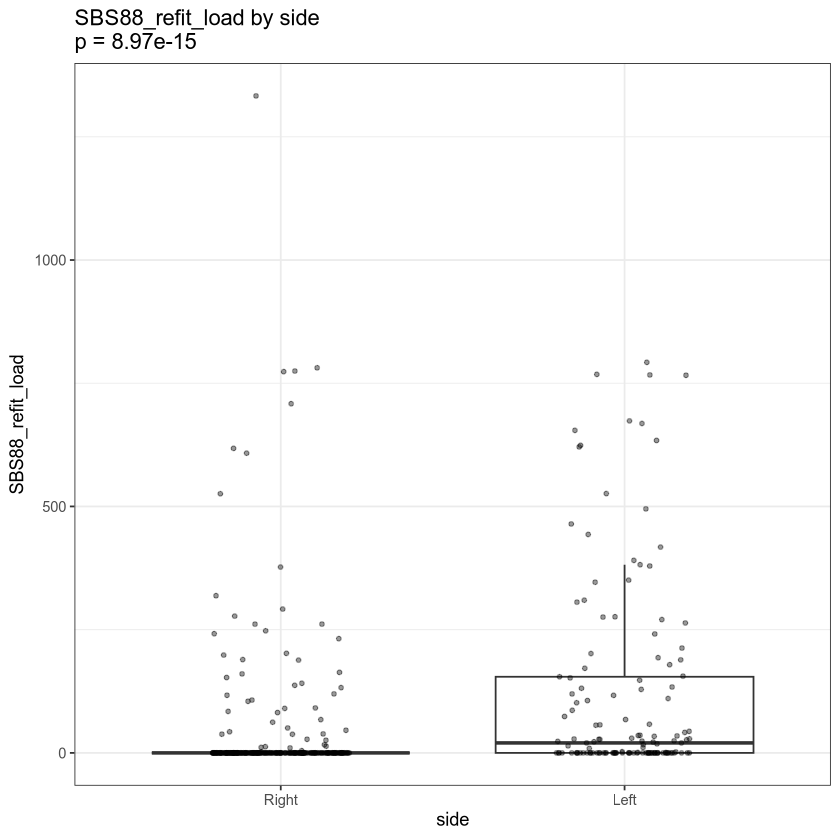

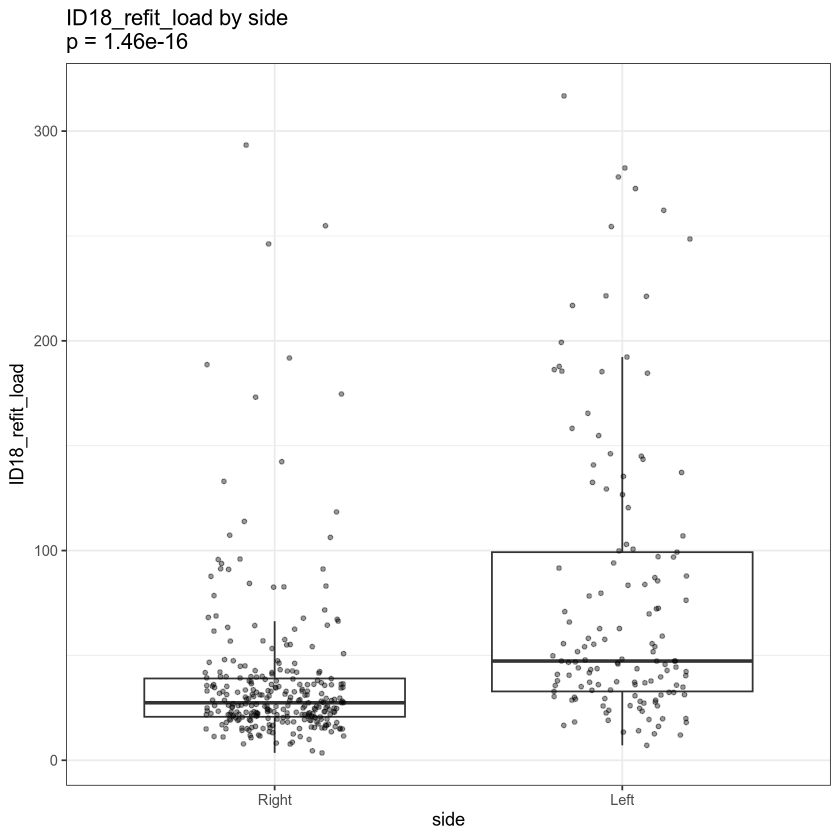

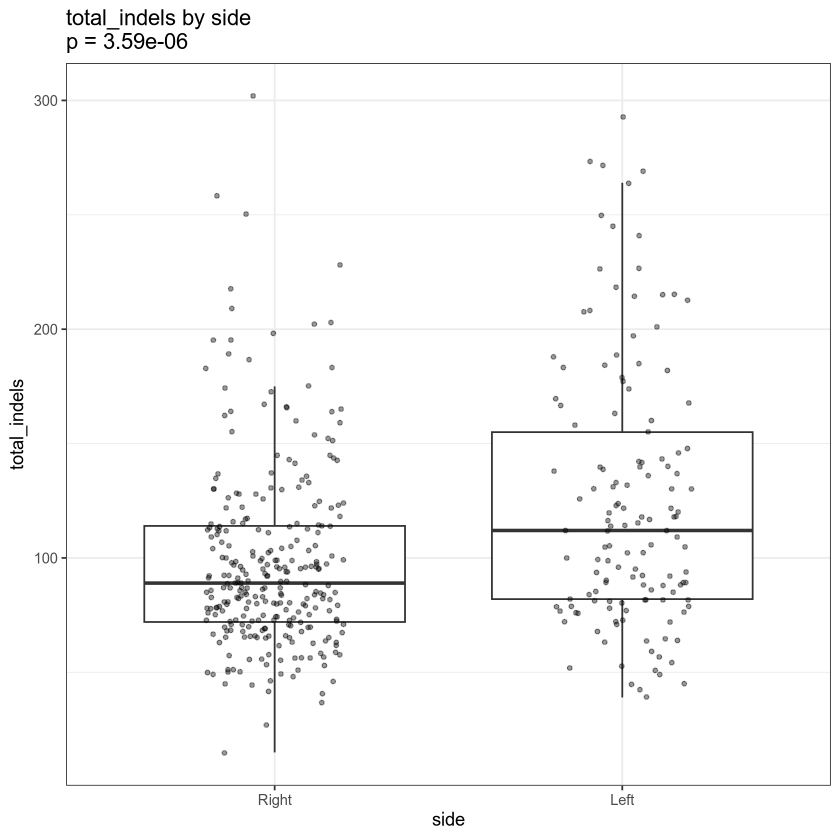

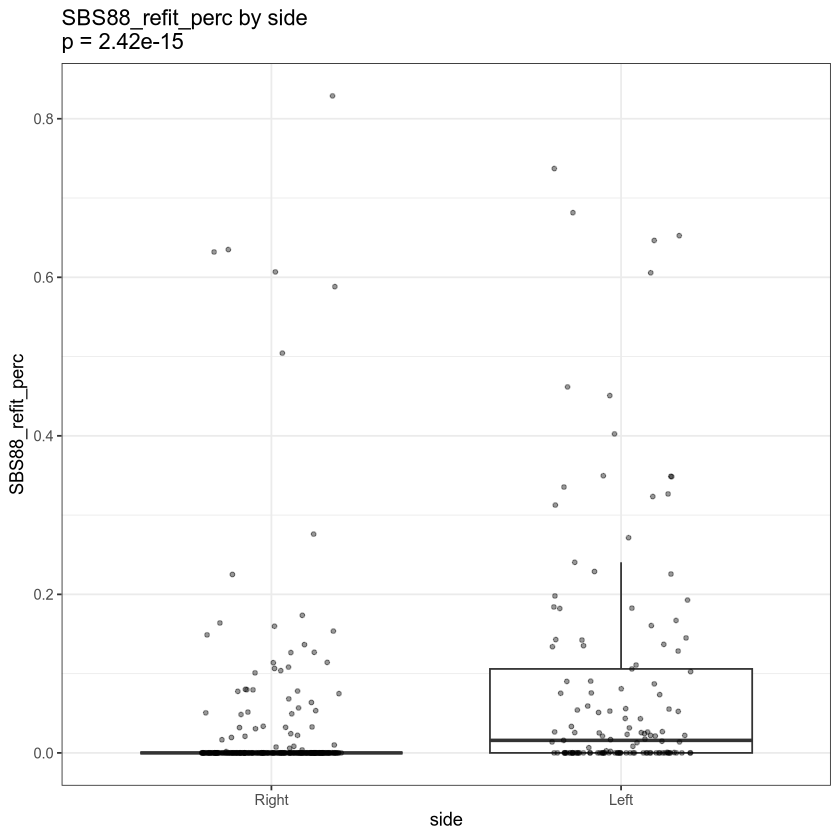

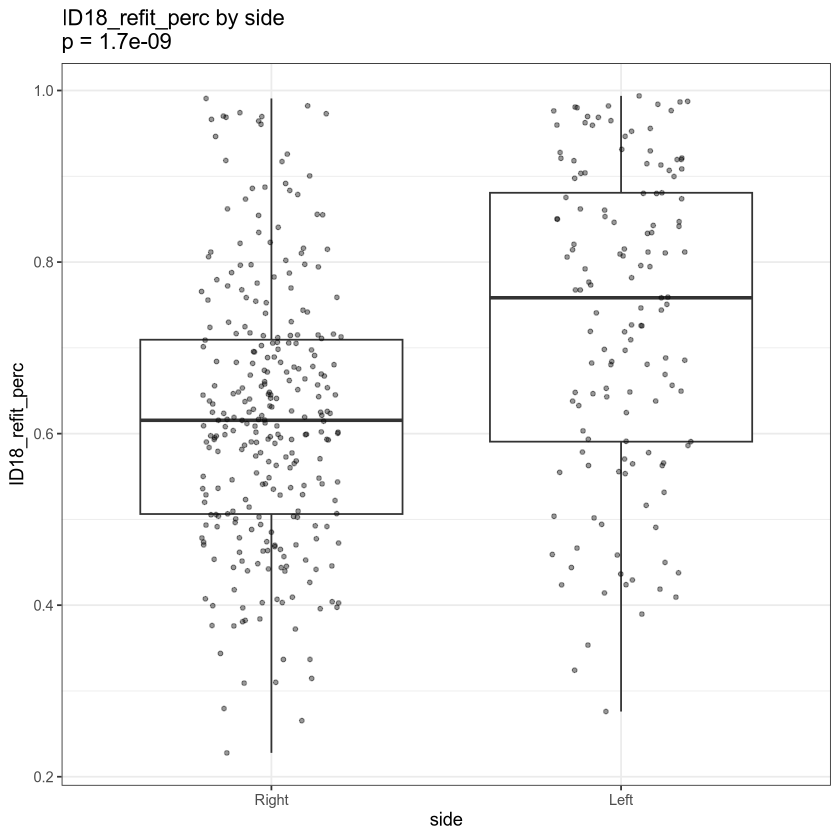

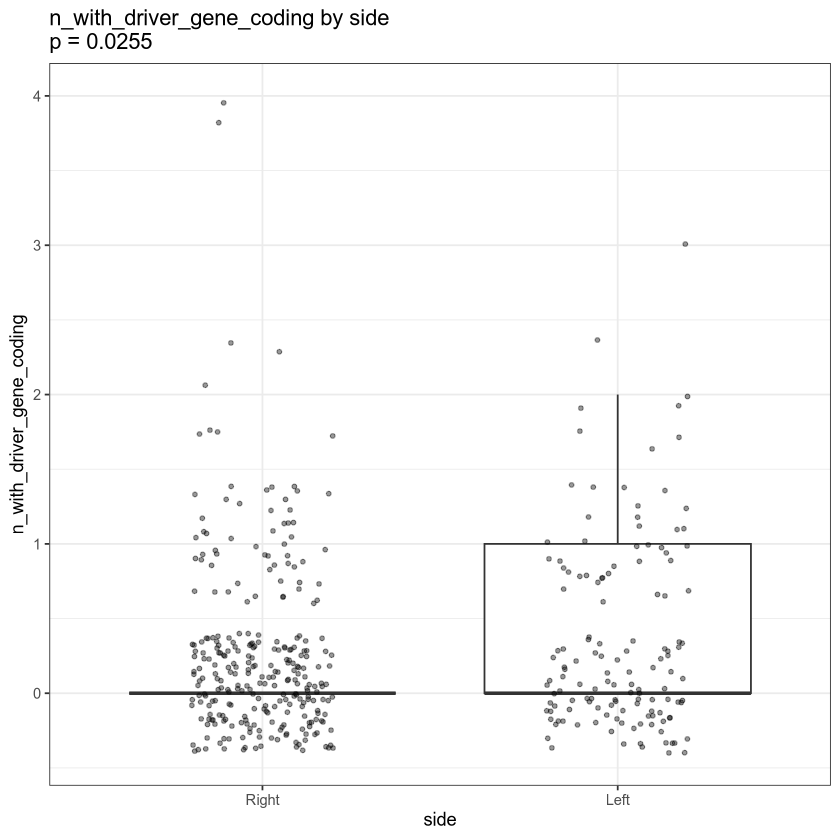

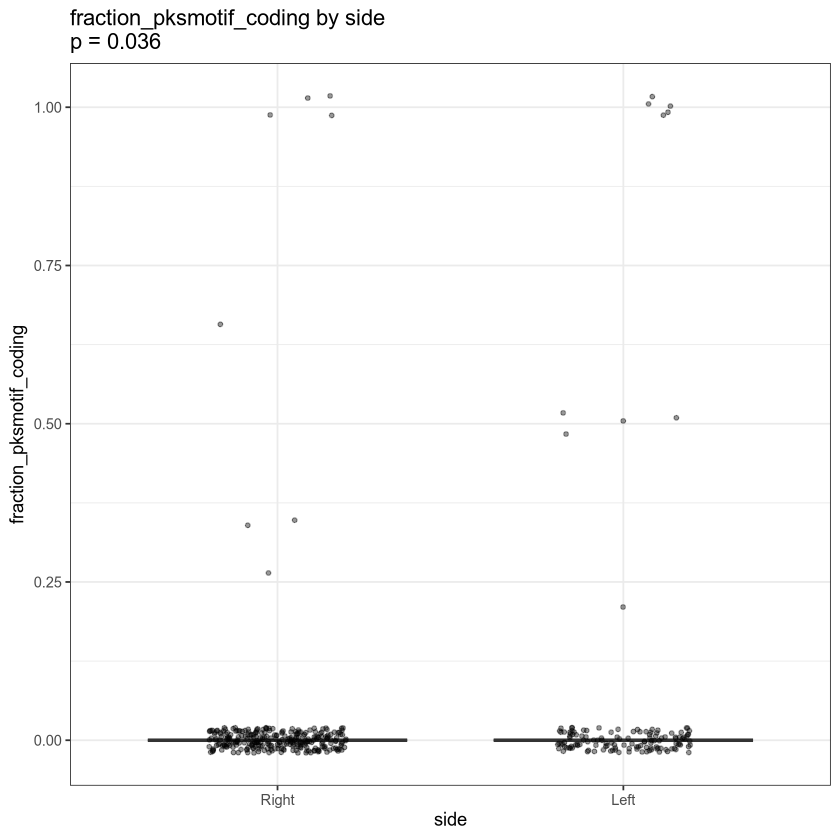

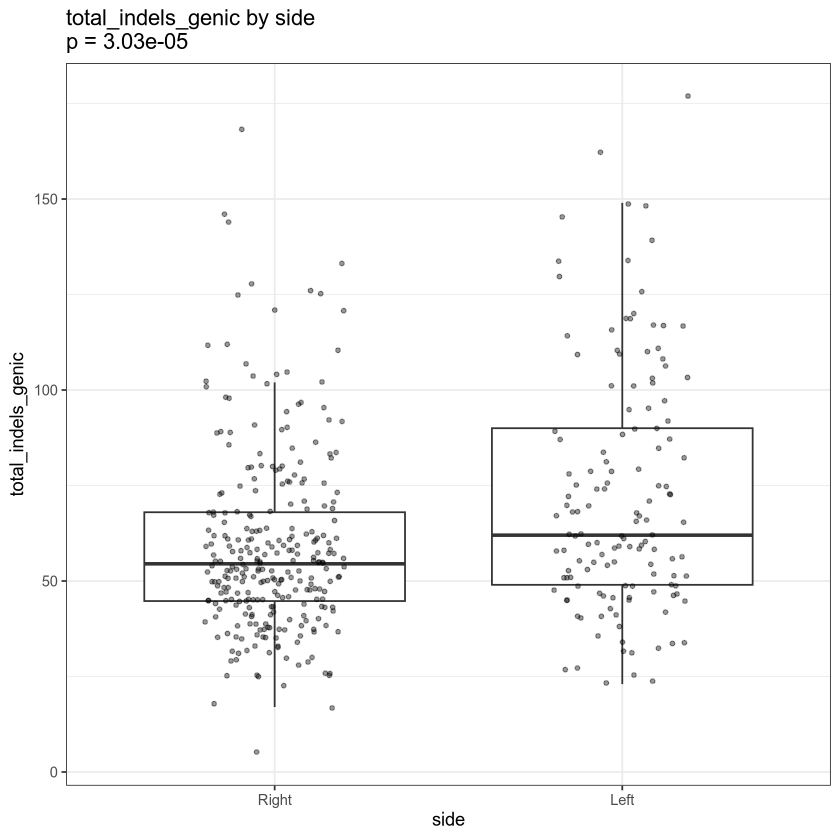

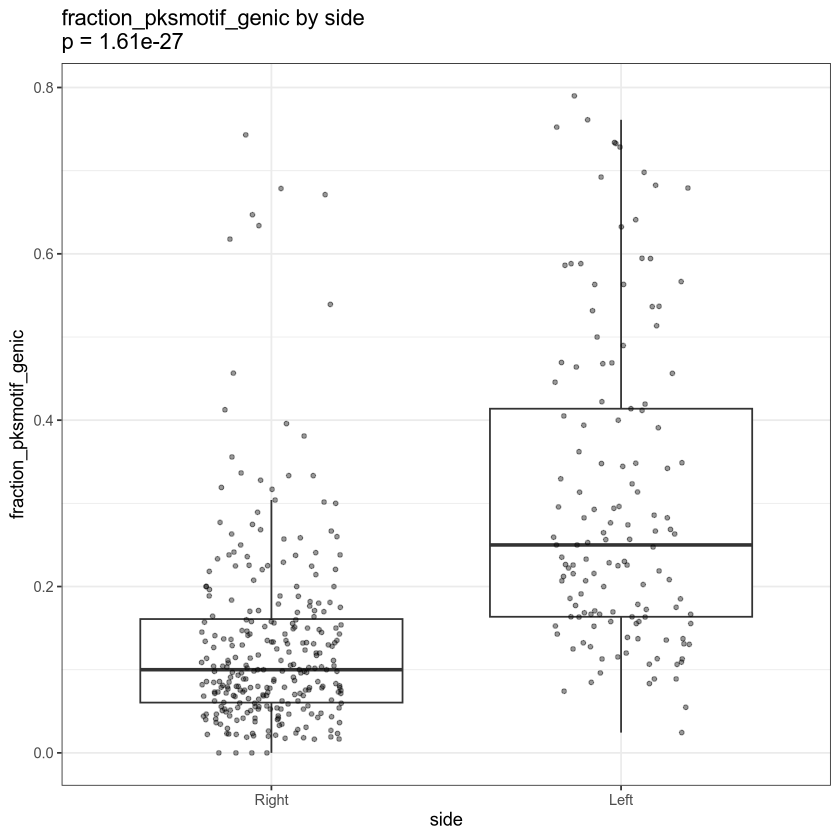

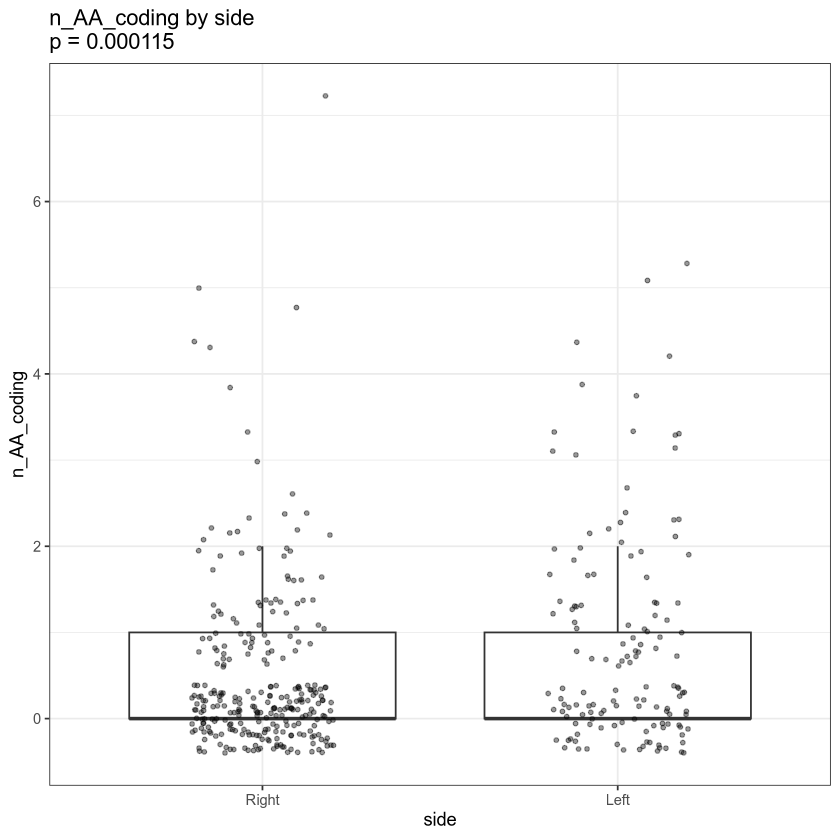

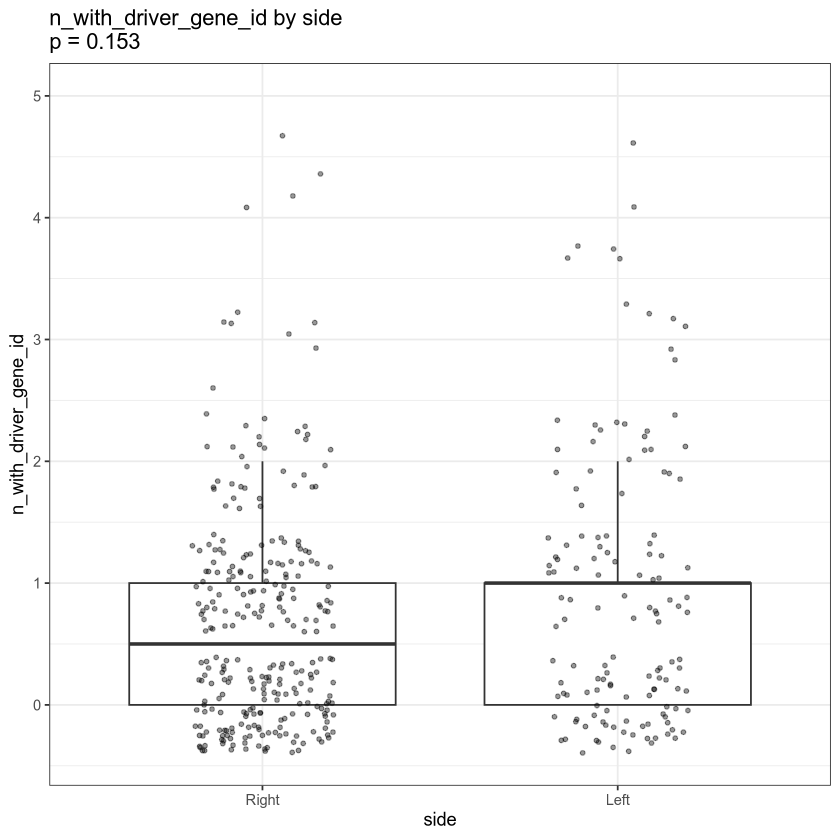

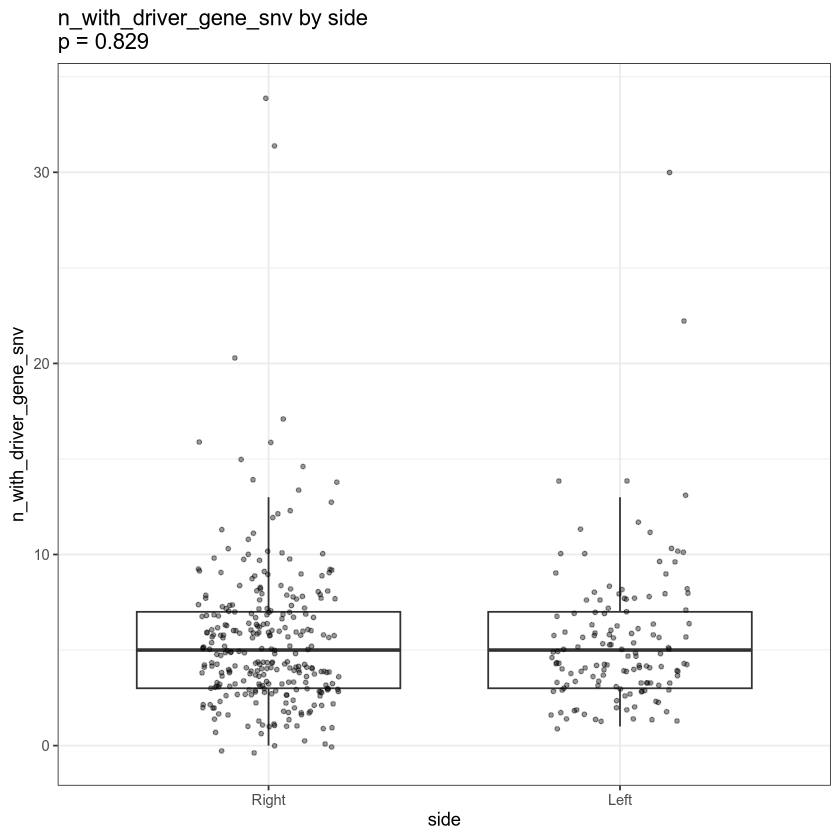

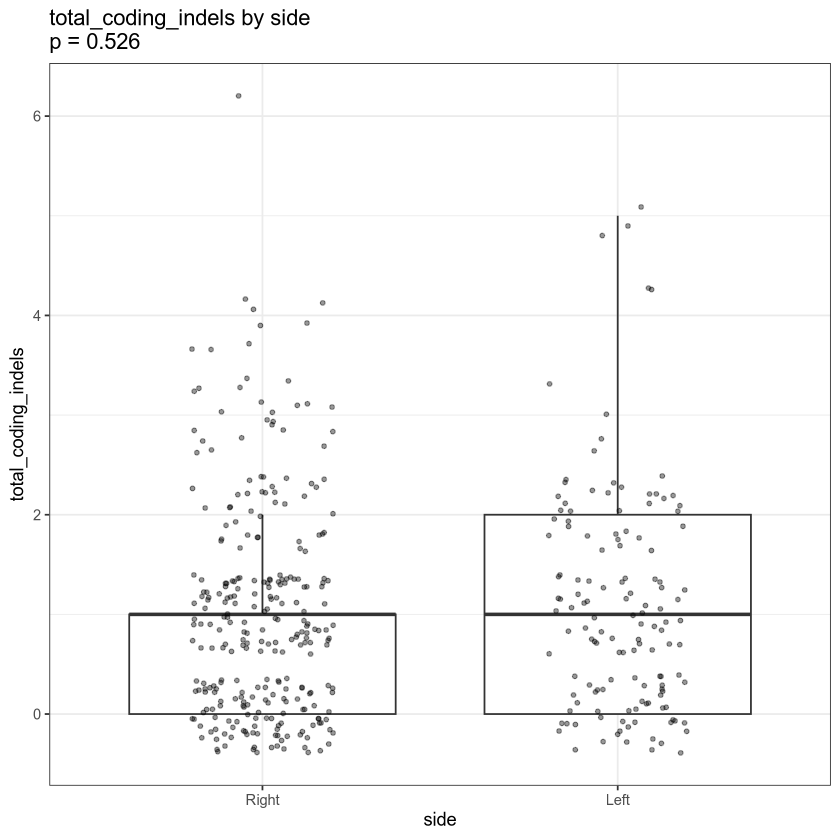

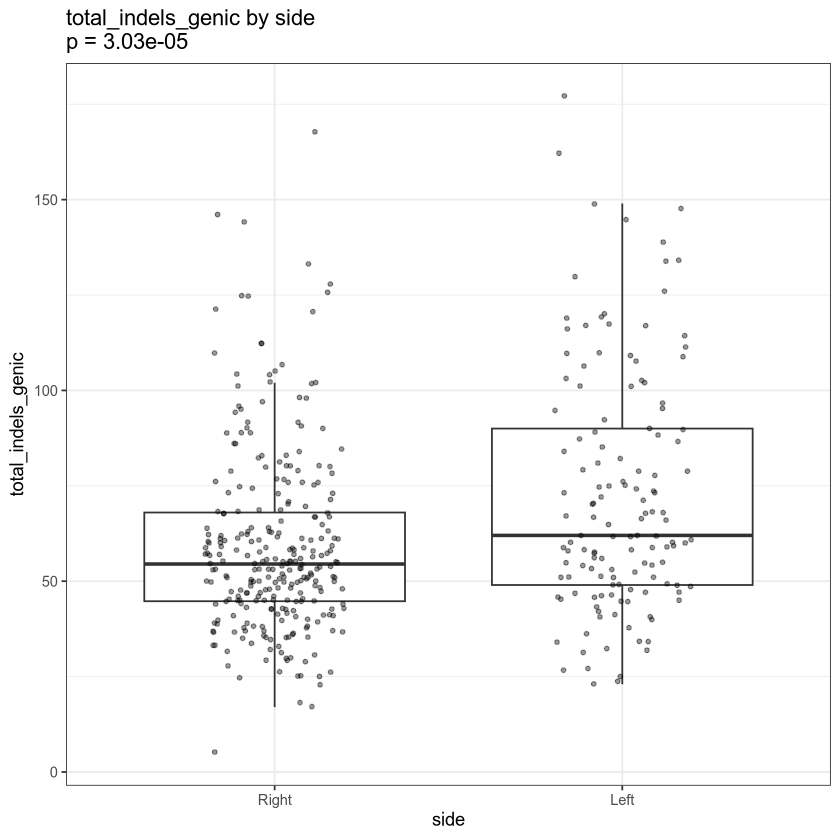

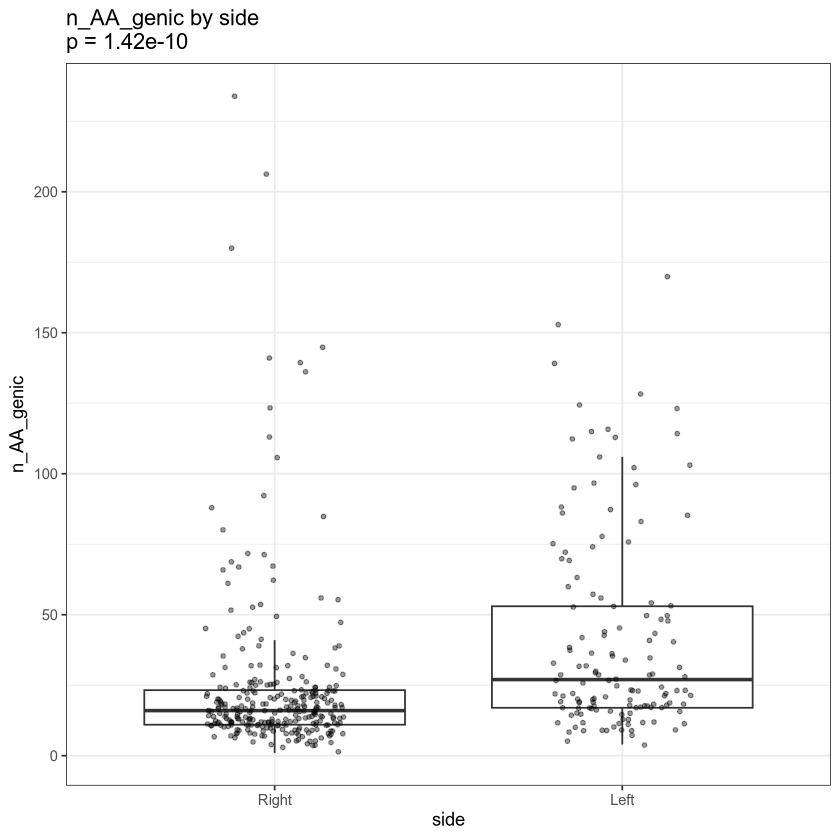

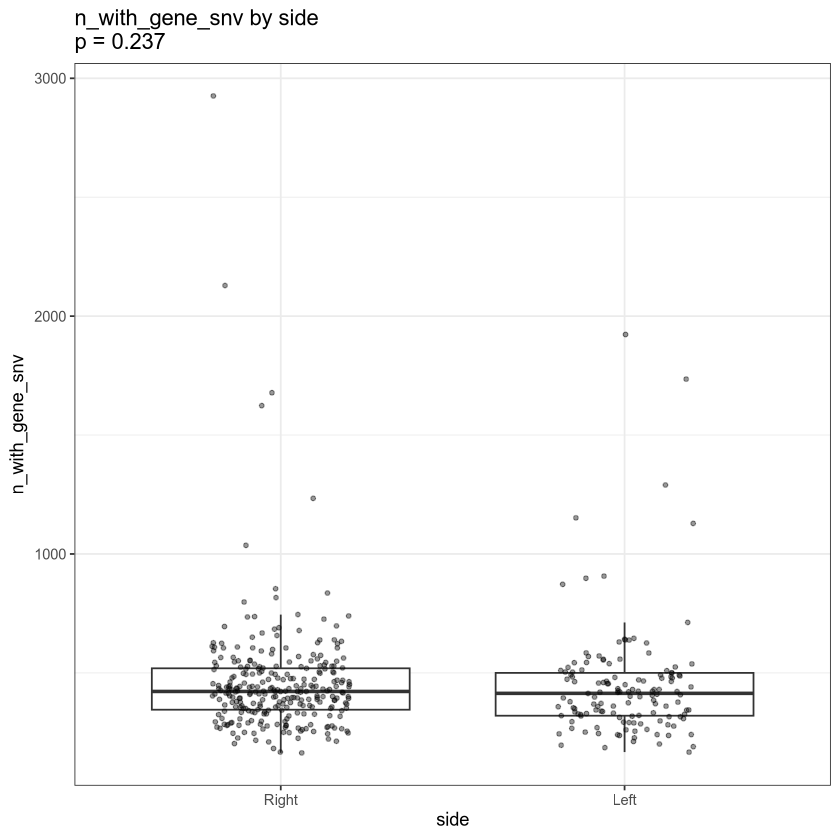

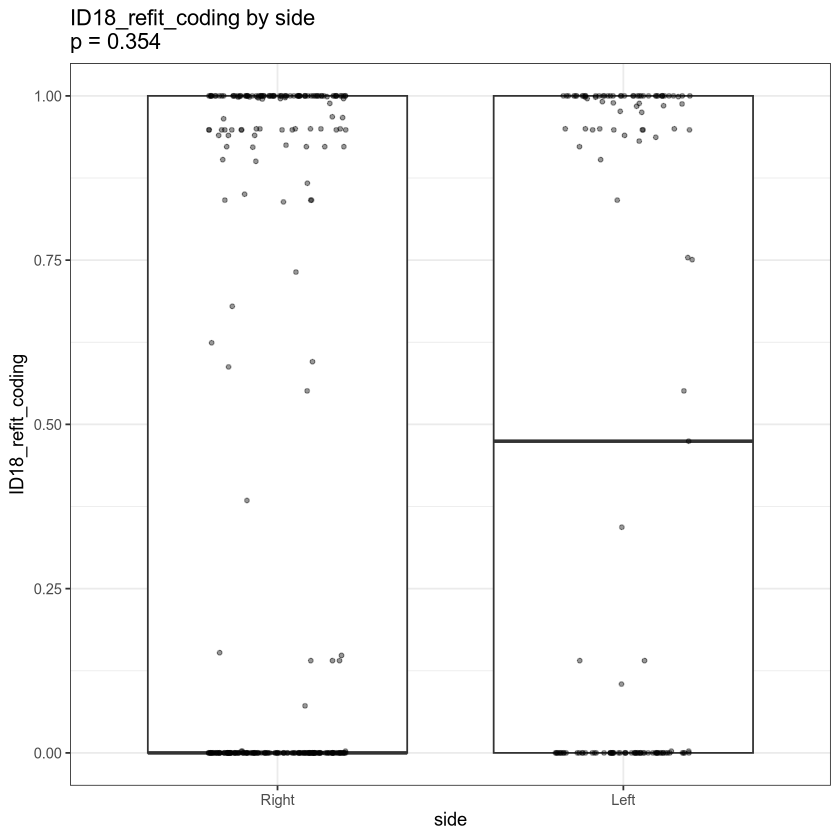

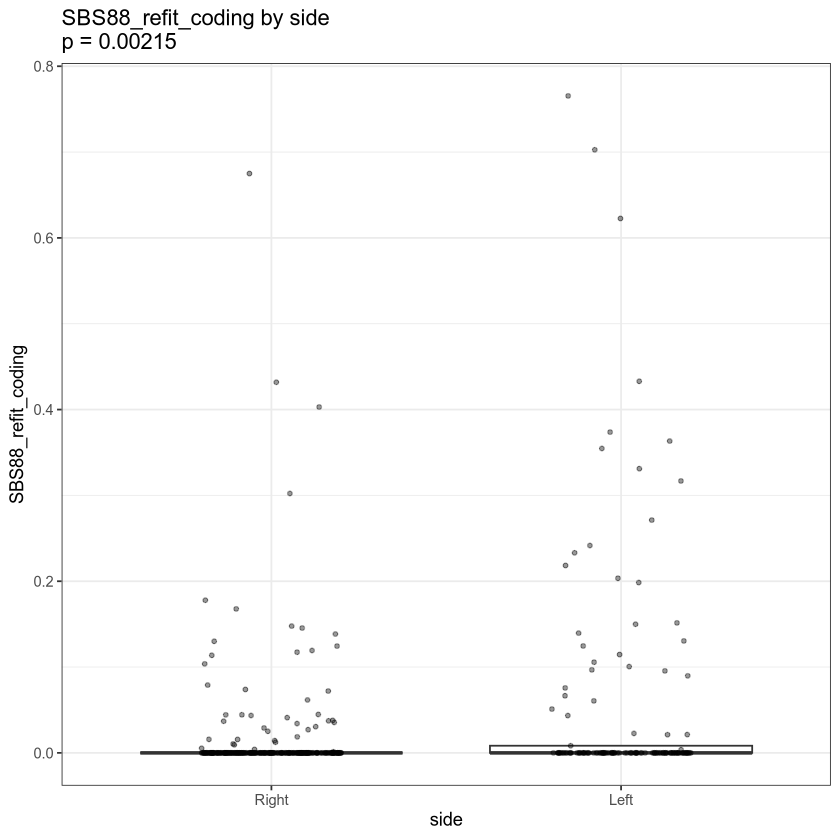

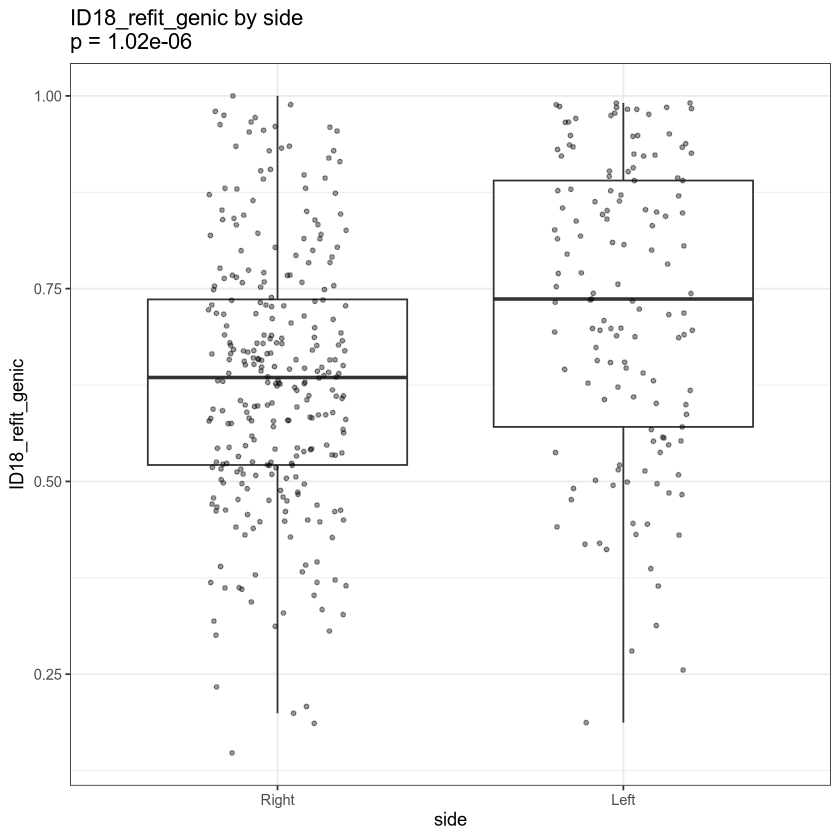

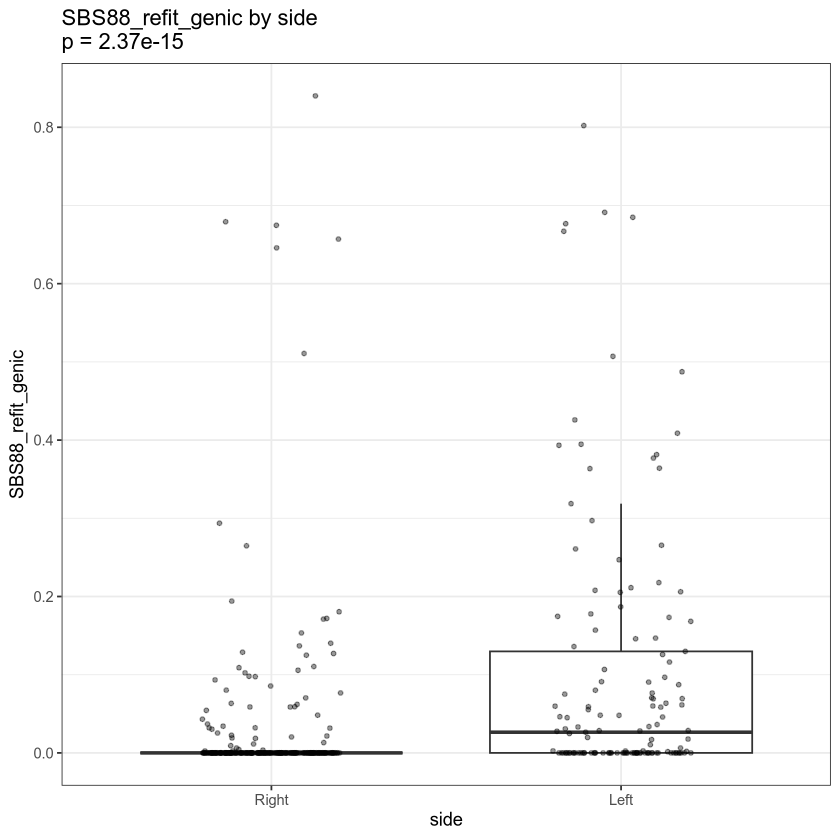

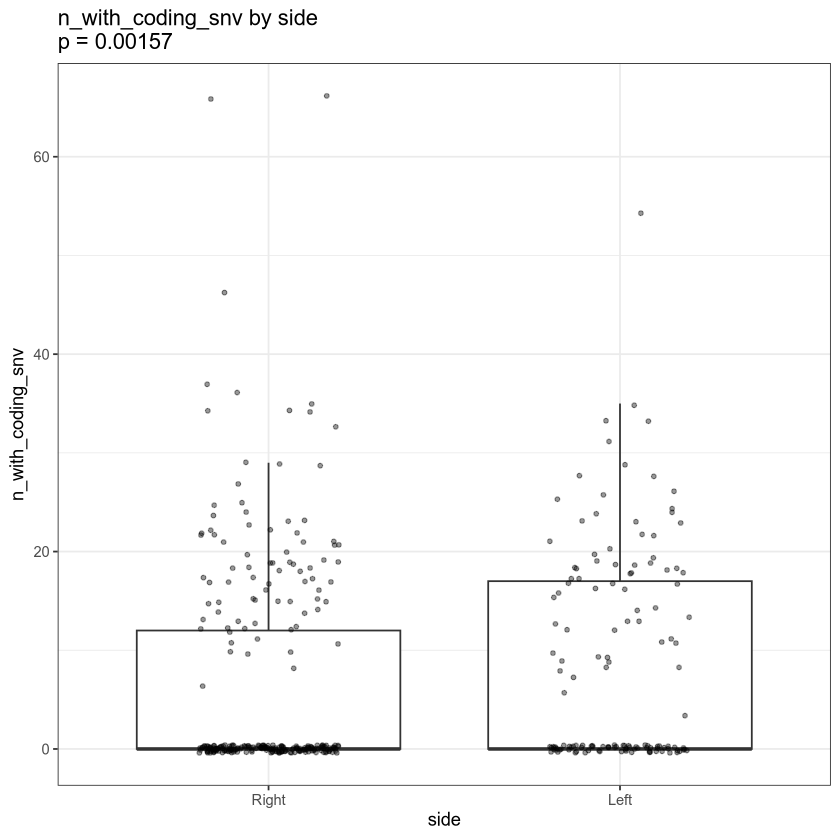

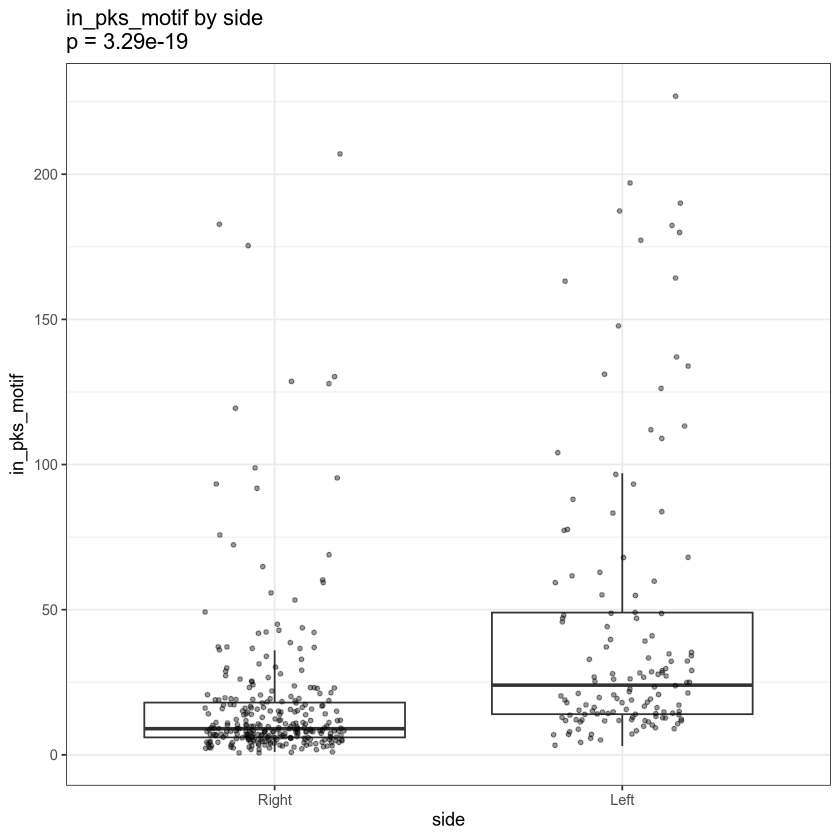

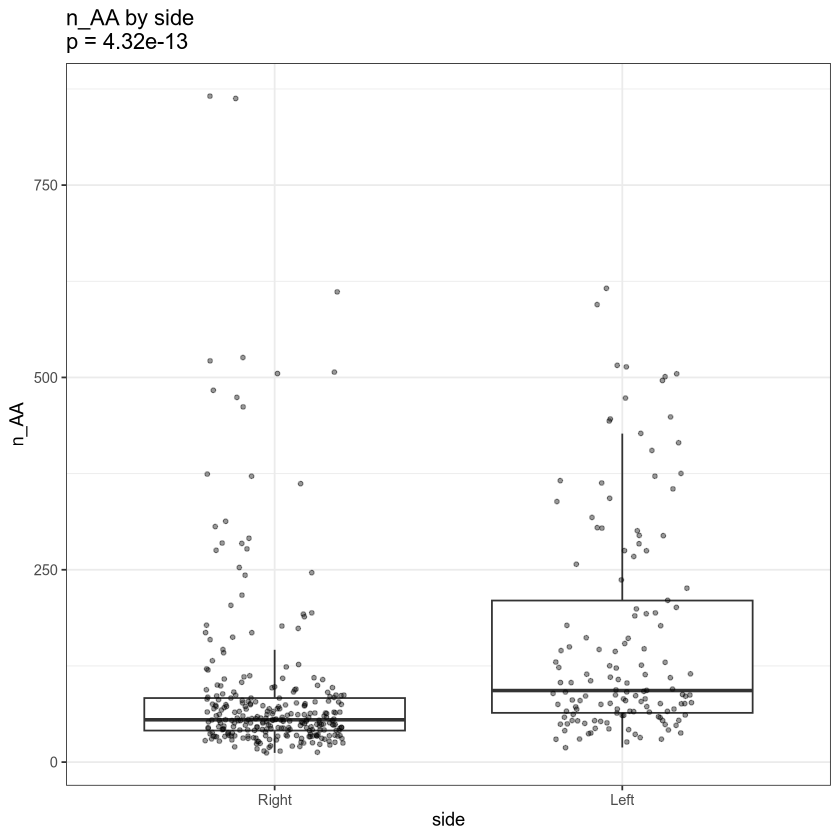

In [18]:
for (m in metrics) {

  test <- cor.test(
    combined_df$age,
    combined_df[[m]],
    method = "spearman",
    use = "complete.obs"
  )

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = age, y = .data[[m]])
  ) +
    geom_point(alpha = 0.6, size = 1) +
    geom_smooth(method = "loess", se = FALSE) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " vs Age\nSpearman ρ = ",
        round(test$estimate, 3),
        ", p = ",
        signif(test$p.value, 3)
      ),
      x = "Age",
      y = m
    )

  print(p)
}

for (m in metrics) {

  n_groups <- n_distinct(combined_df$cohort)

  test <- if (n_groups == 2) {
    wilcox.test(
      combined_df[[m]] ~ combined_df$cohort
    )
  } else {
    kruskal.test(
      combined_df[[m]] ~ combined_df$cohort
    )
  }

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = cohort, y = .data[[m]])
  ) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.2, alpha = 0.4, size = 1) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " by Cohort\np = ",
        signif(test$p.value, 3)
      ),
      x = "Cohort",
      y = m
    )

  print(p)
}

for (m in metrics) {

  n_groups <- n_distinct(combined_df$region)

  test <- if (n_groups == 2) {
    wilcox.test(
      combined_df[[m]] ~ combined_df$region
    )
  } else {
    kruskal.test(
      combined_df[[m]] ~ combined_df$region
    )
  }

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = region, y = .data[[m]])
  ) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.2, alpha = 0.4, size = 1) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " by region\np = ",
        signif(test$p.value, 3)
      ),
      x = "region",
      y = m
    )

  print(p)
}

for (m in metrics) {

  n_groups <- n_distinct(combined_df$side)

  test <- if (n_groups == 2) {
    wilcox.test(
      combined_df[[m]] ~ combined_df$side
    )
  } else {
    kruskal.test(
      combined_df[[m]] ~ combined_df$side
    )
  }

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = side, y = .data[[m]])
  ) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.2, alpha = 0.4, size = 1) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " by side\np = ",
        signif(test$p.value, 3)
      ),
      x = "side",
      y = m
    )

  print(p)
}
combined_df <- combined_df %>%
  mutate(
    region_tri = case_when(
      region %in% c("Right", "cecum", "asc_col") ~ "RIGHT",
      region == "trans_col" ~ "trans_col",
      TRUE ~ "LEFT"
    ),
    region_tri = factor(
      region_tri,
      levels = c("RIGHT", "trans_col", "LEFT")
    )
  )




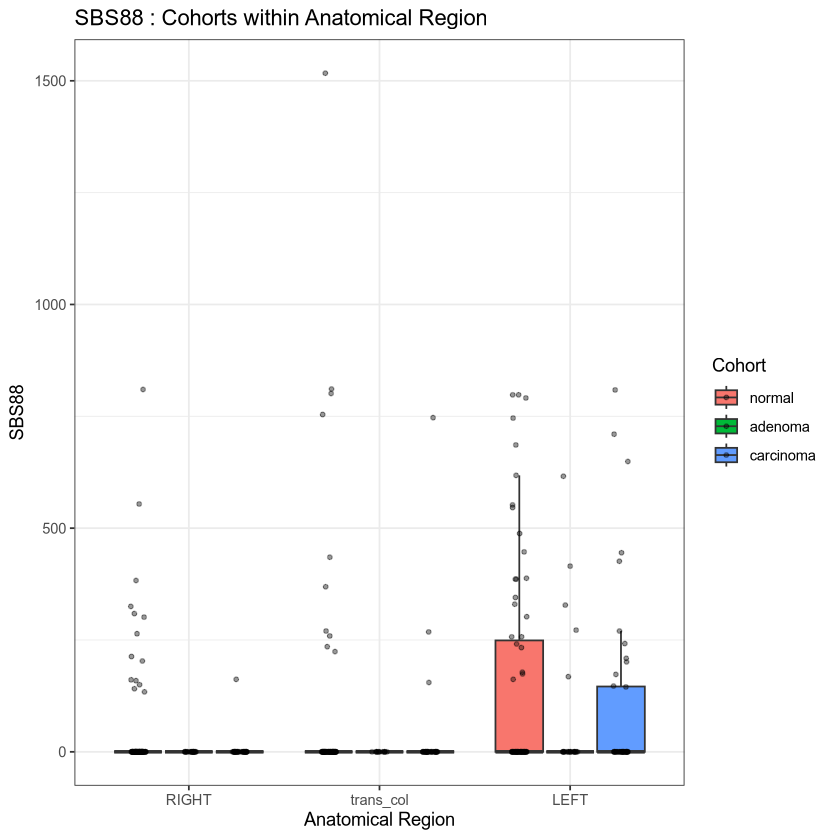

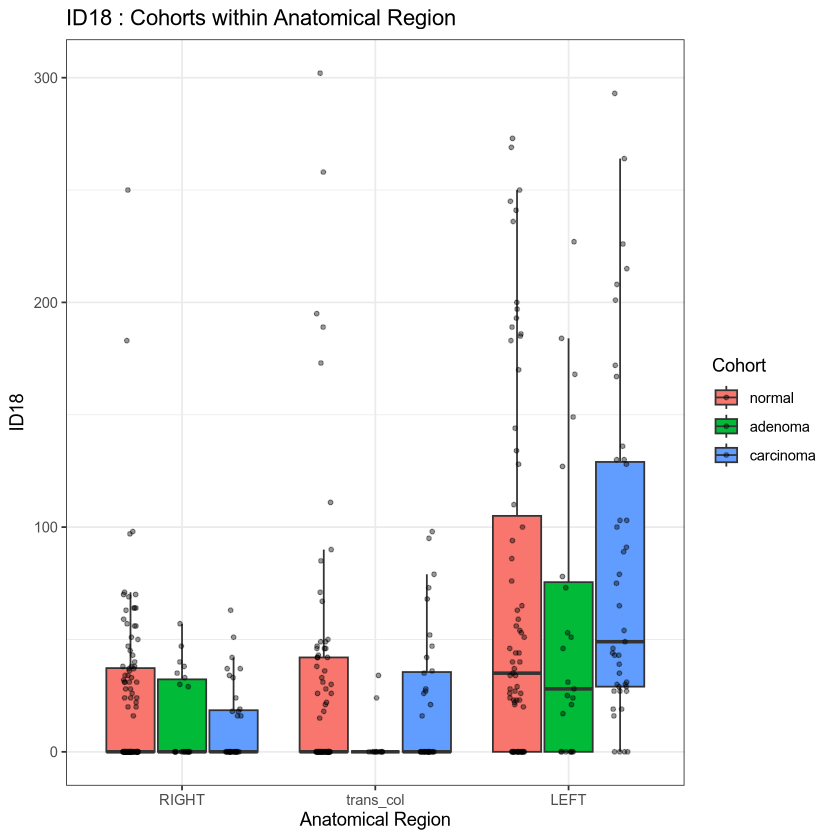

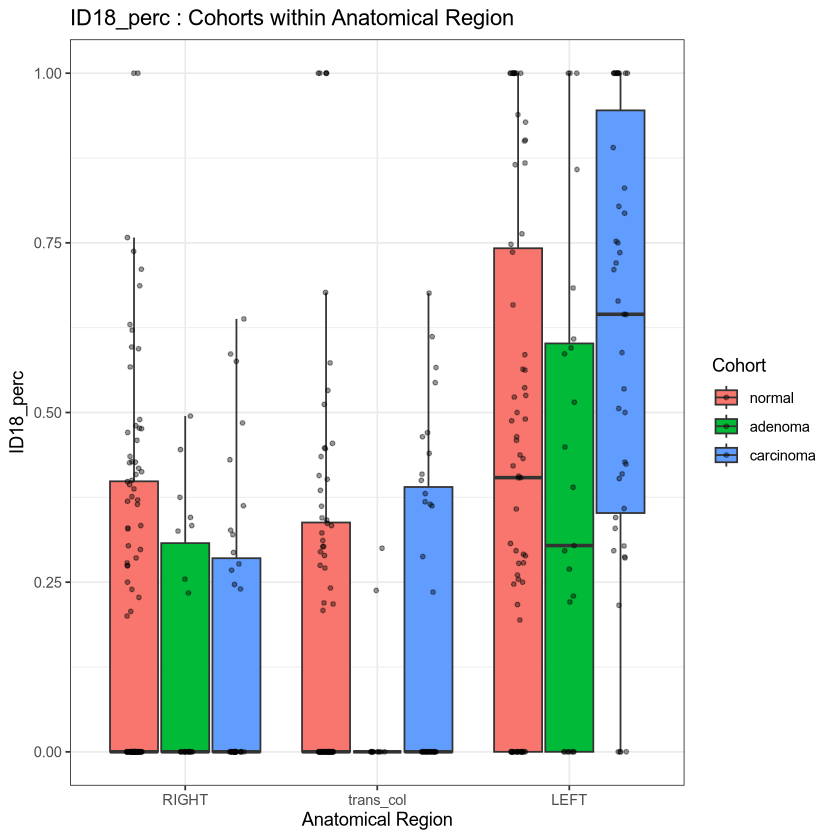

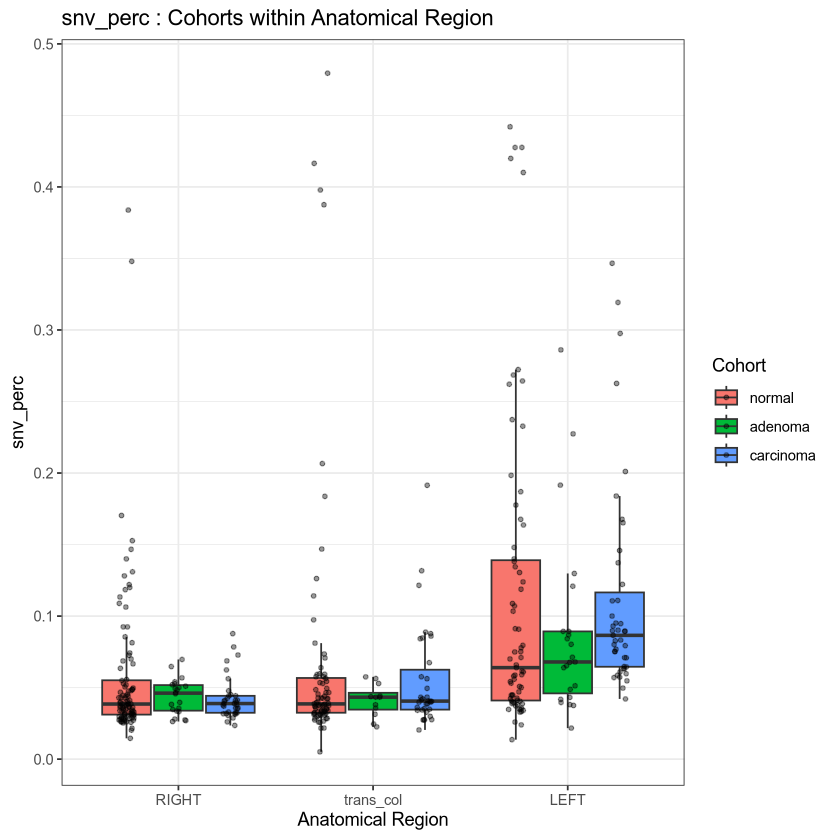

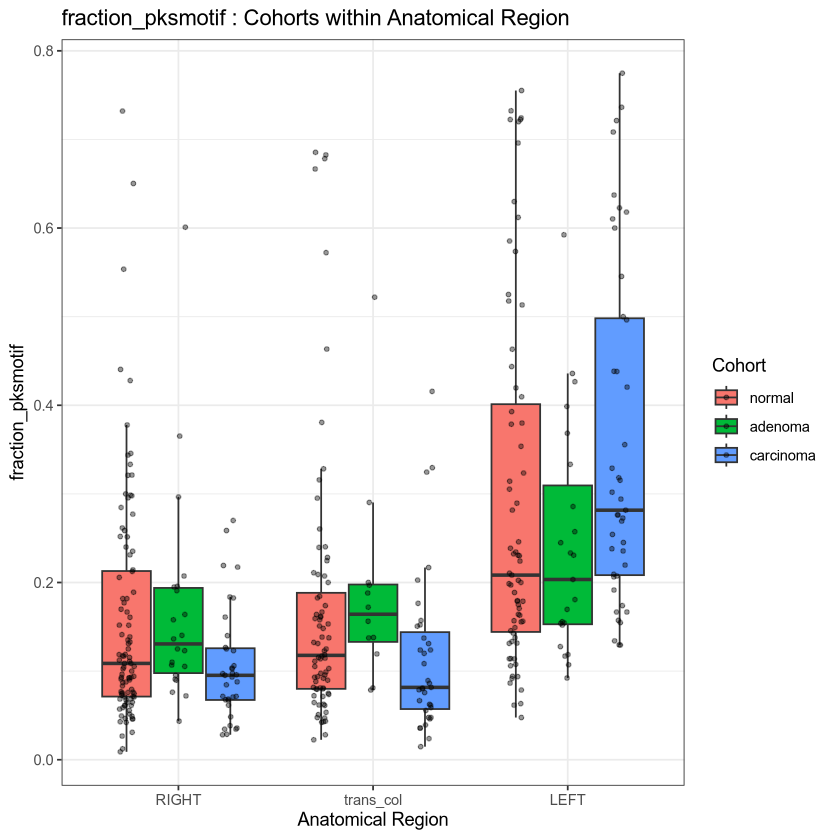

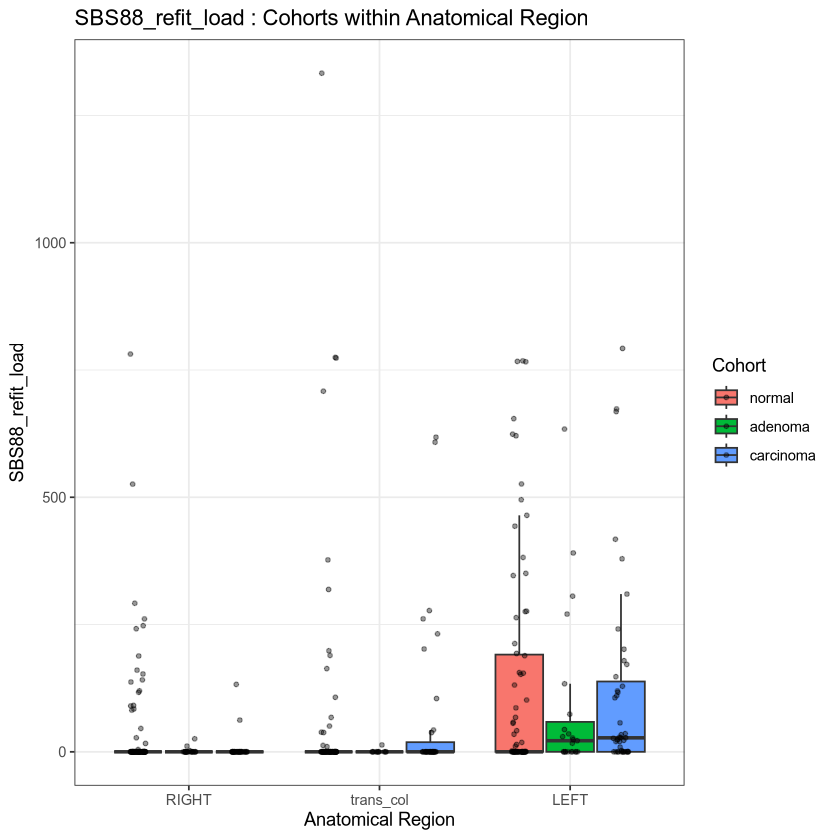

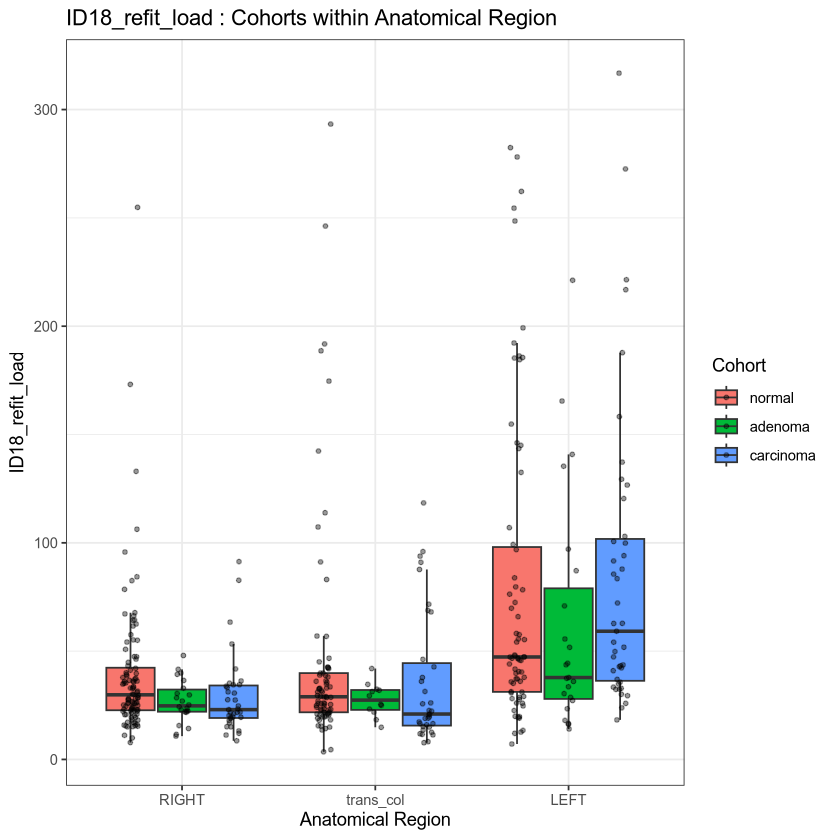

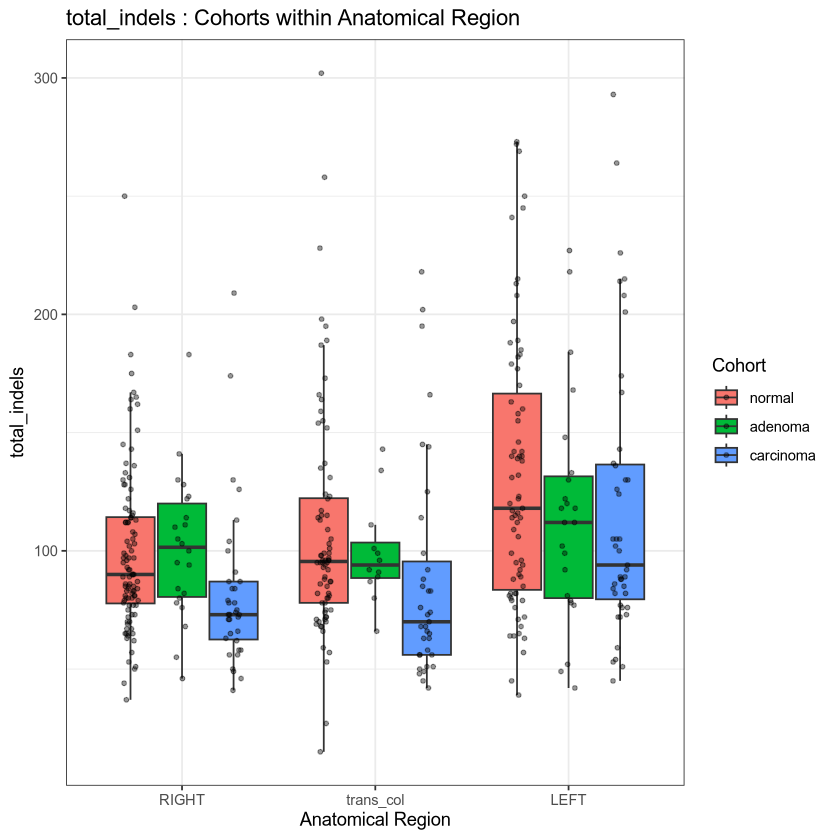

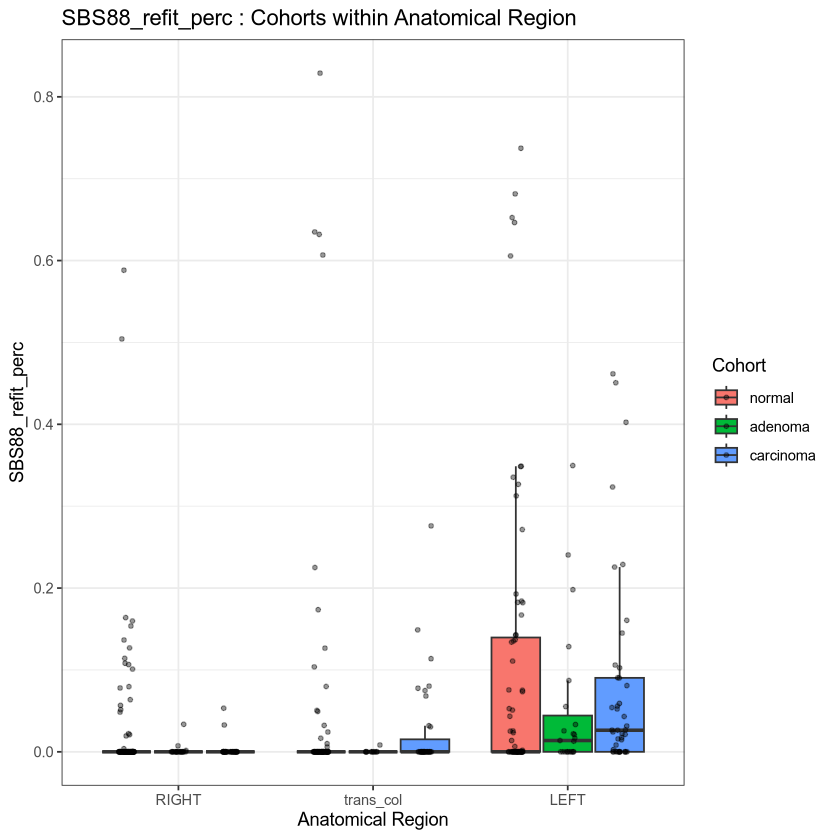

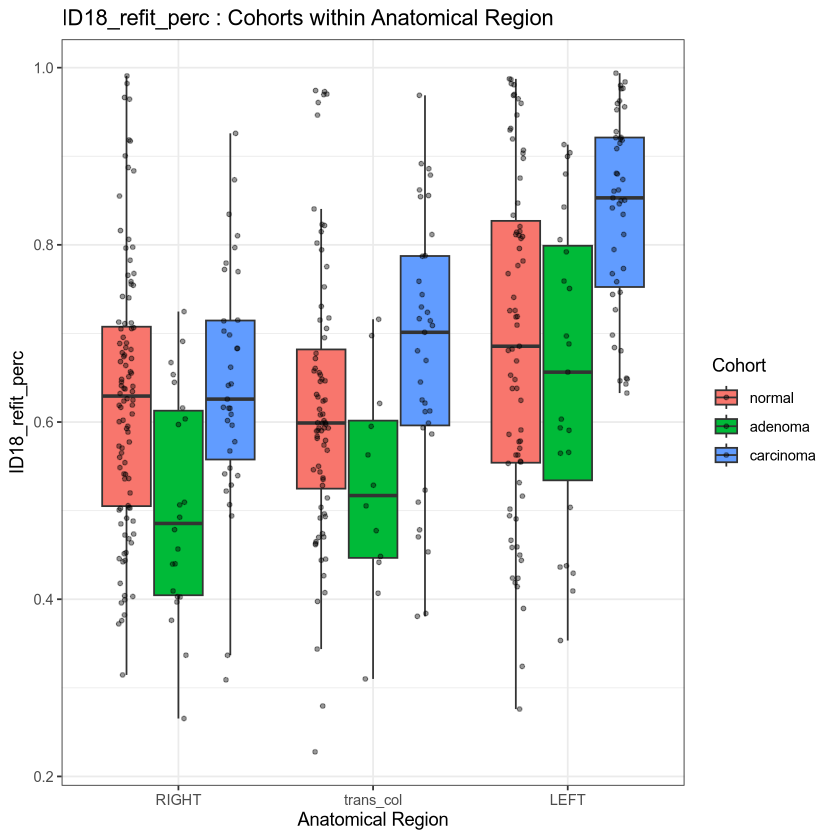

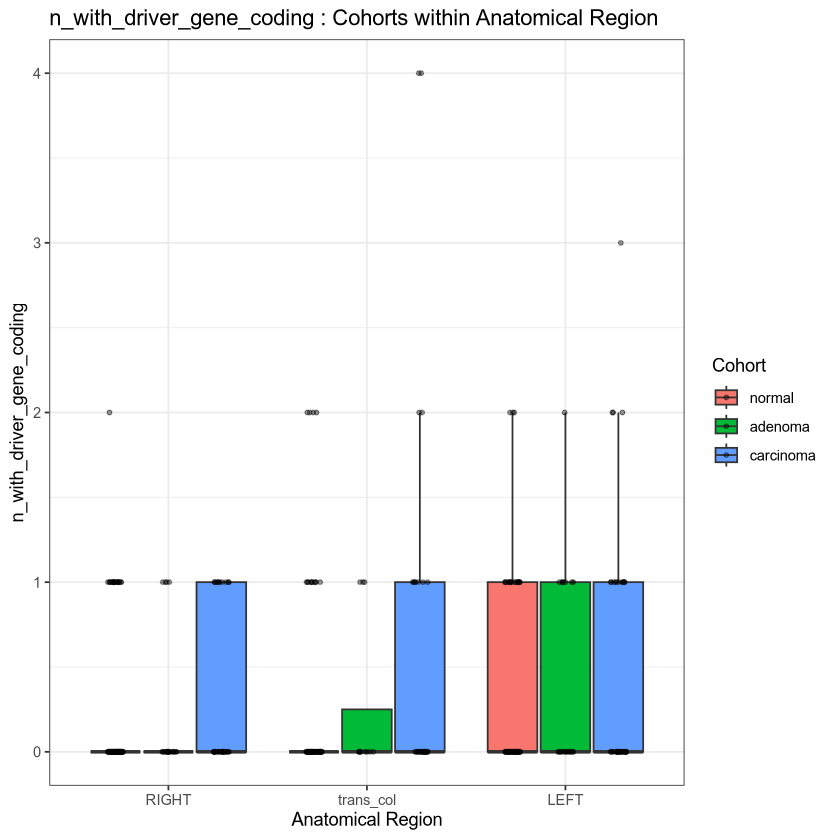

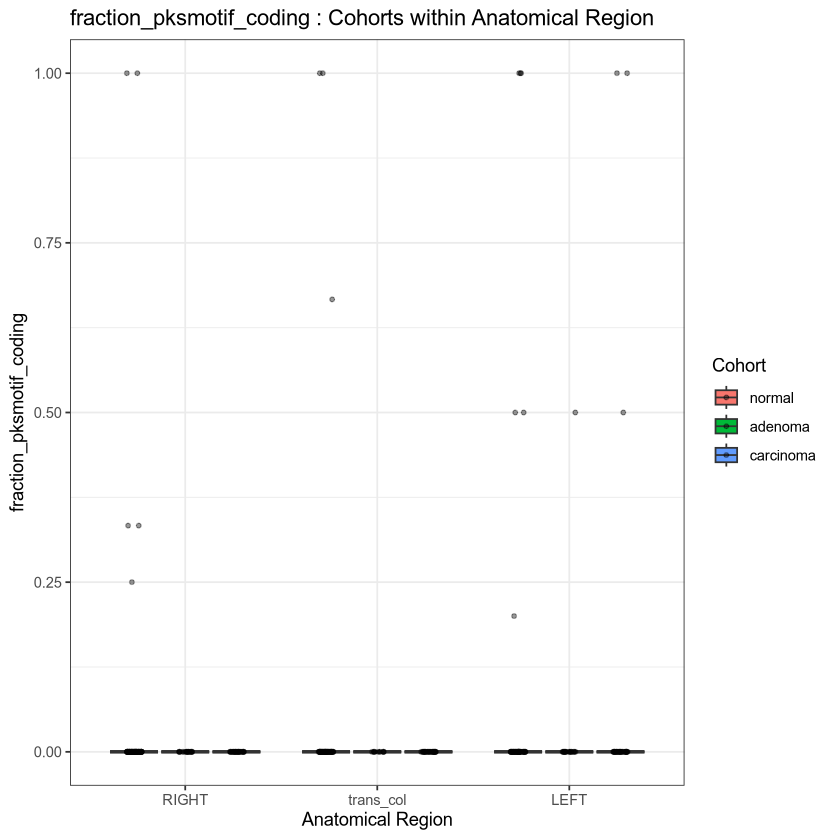

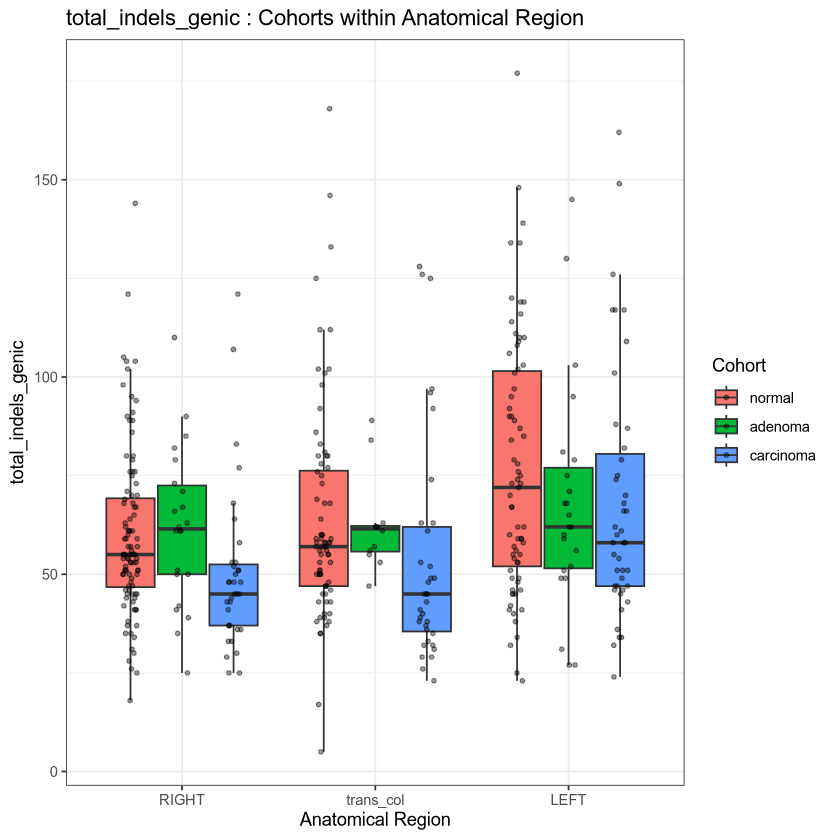

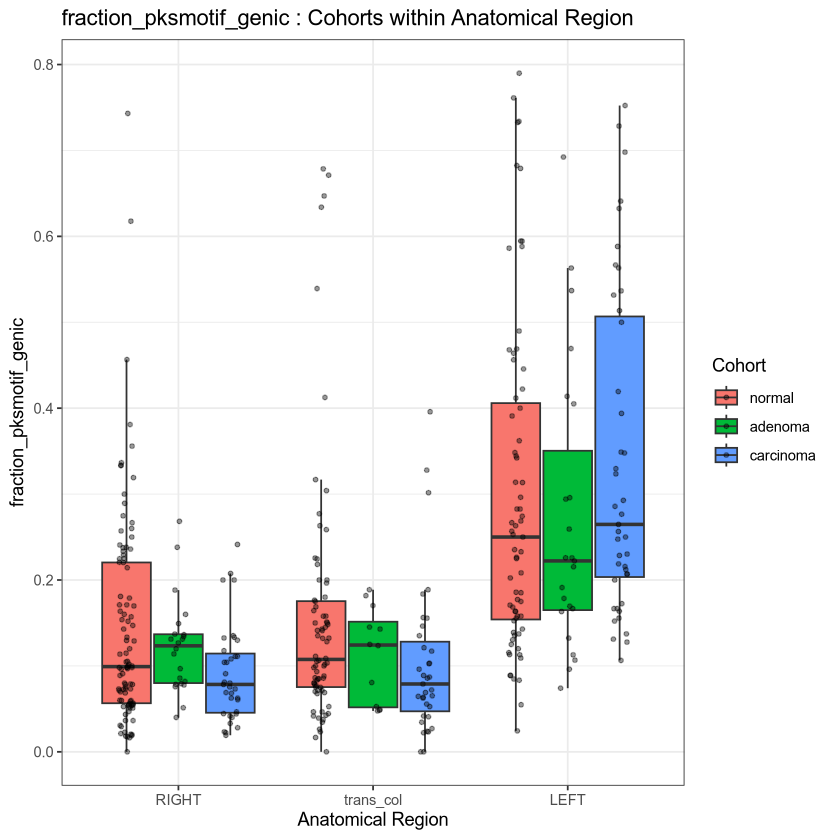

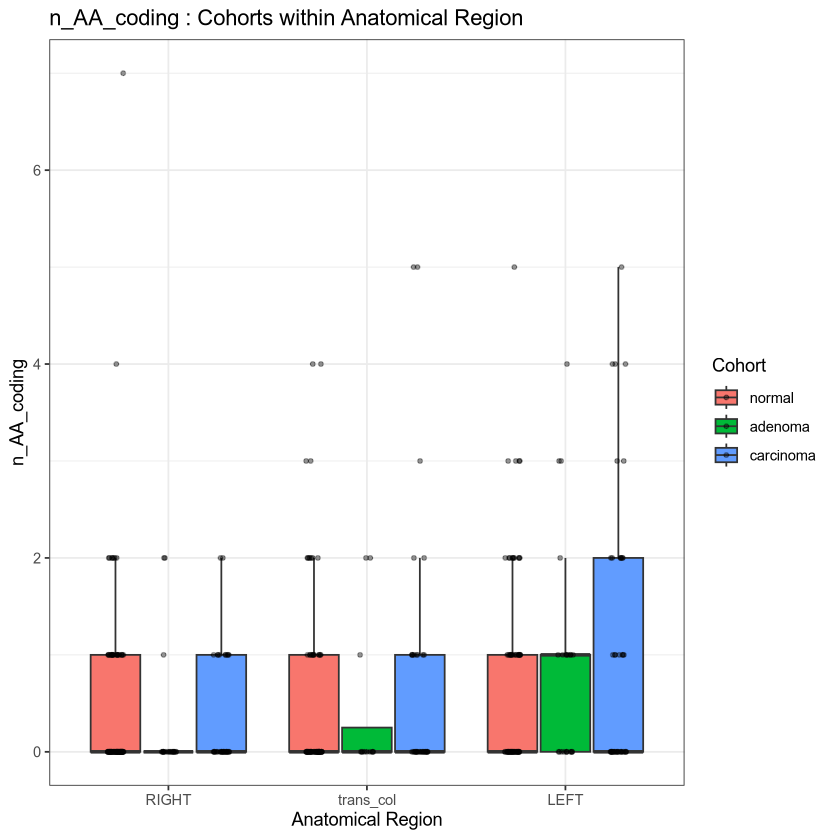

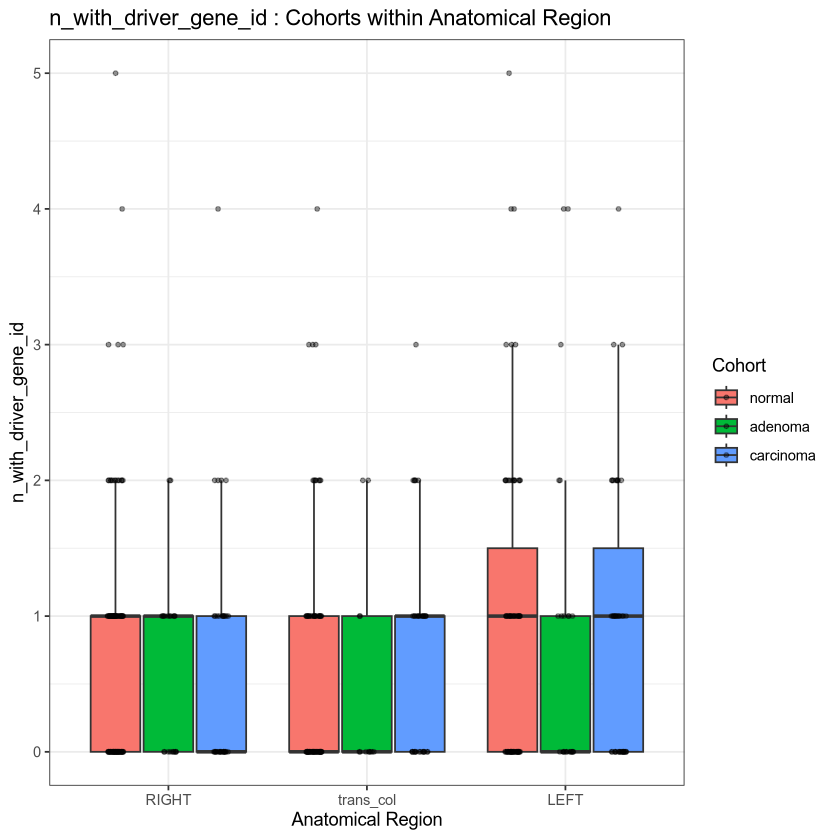

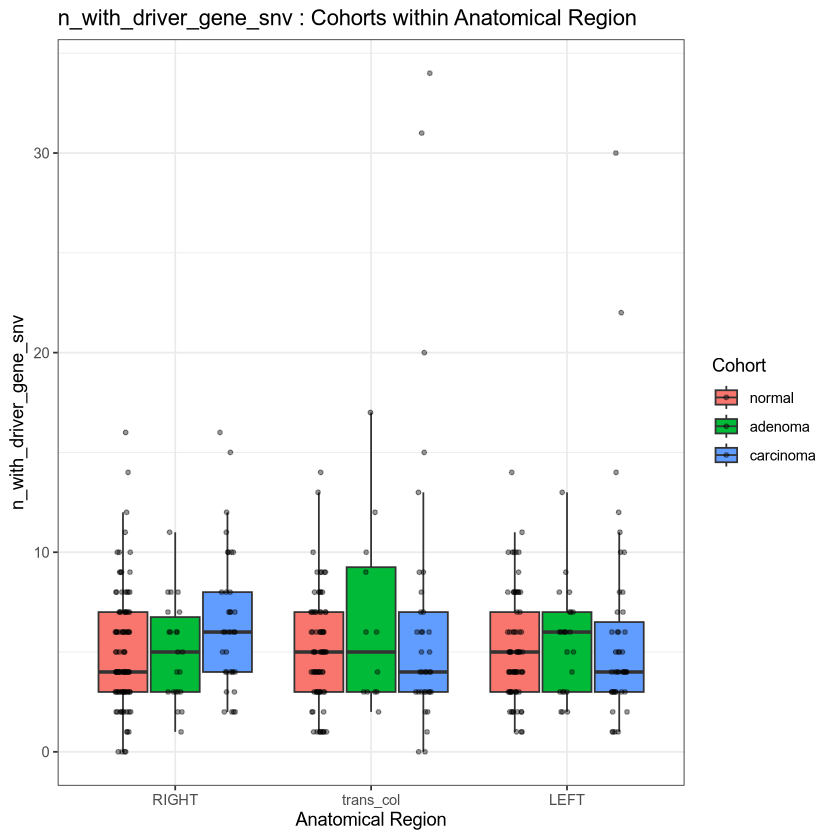

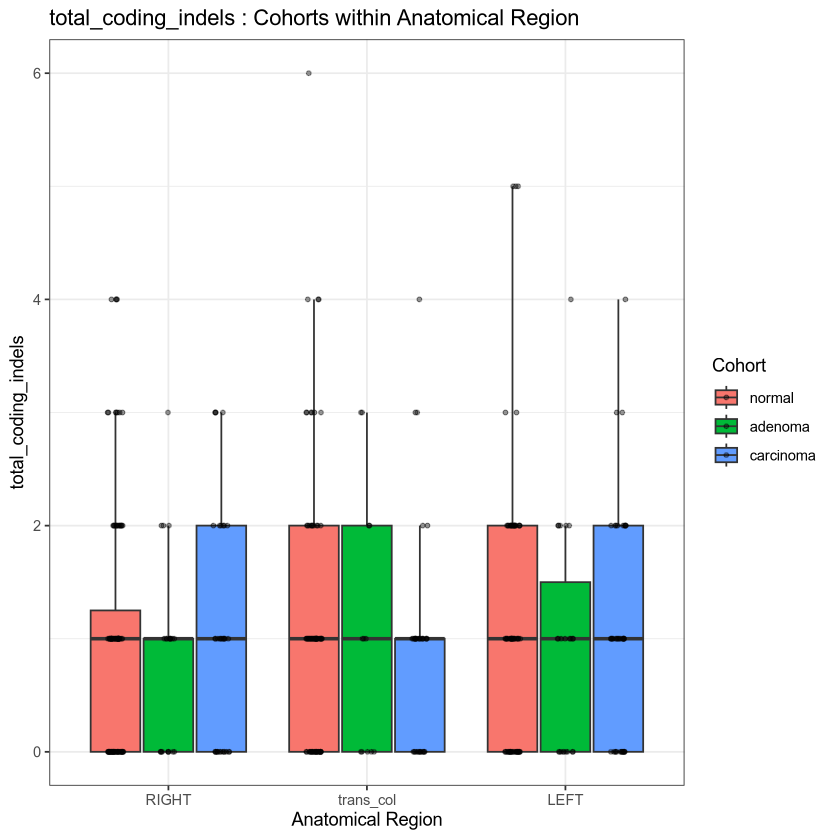

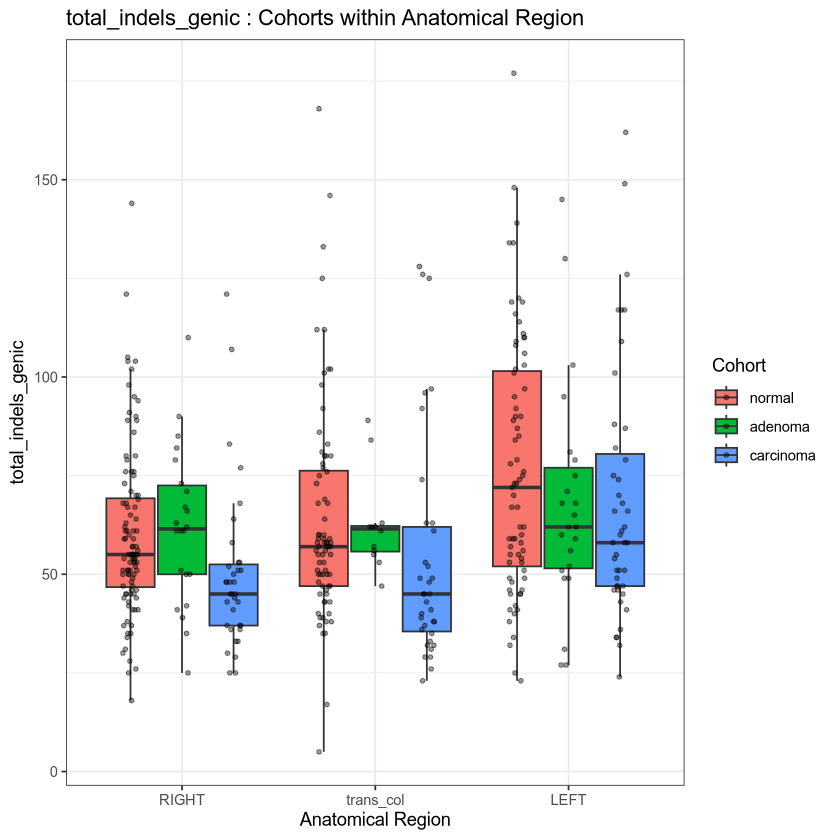

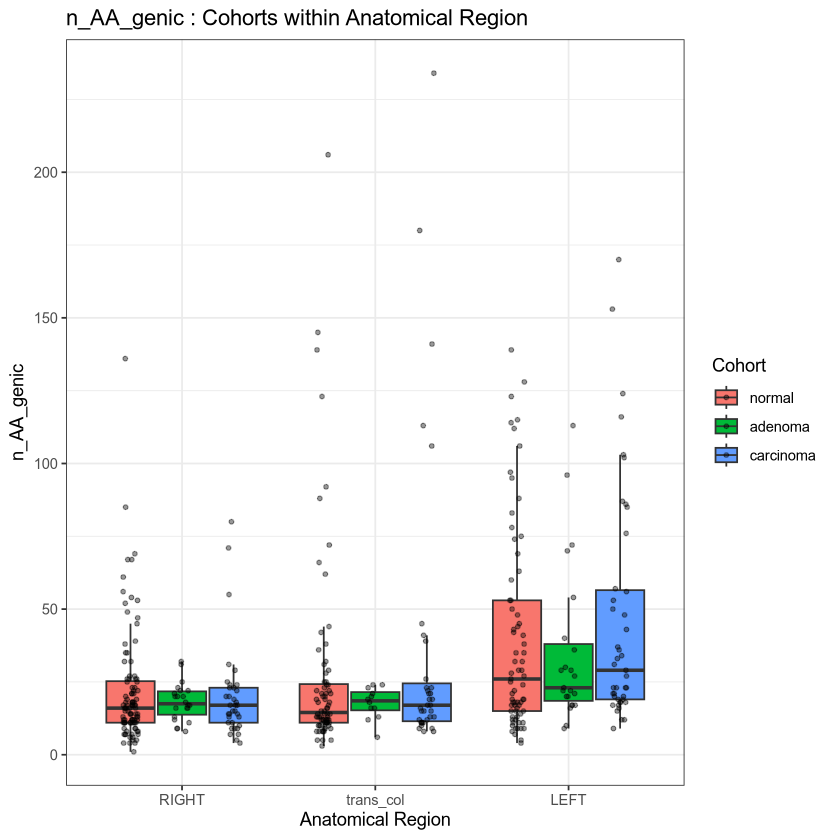

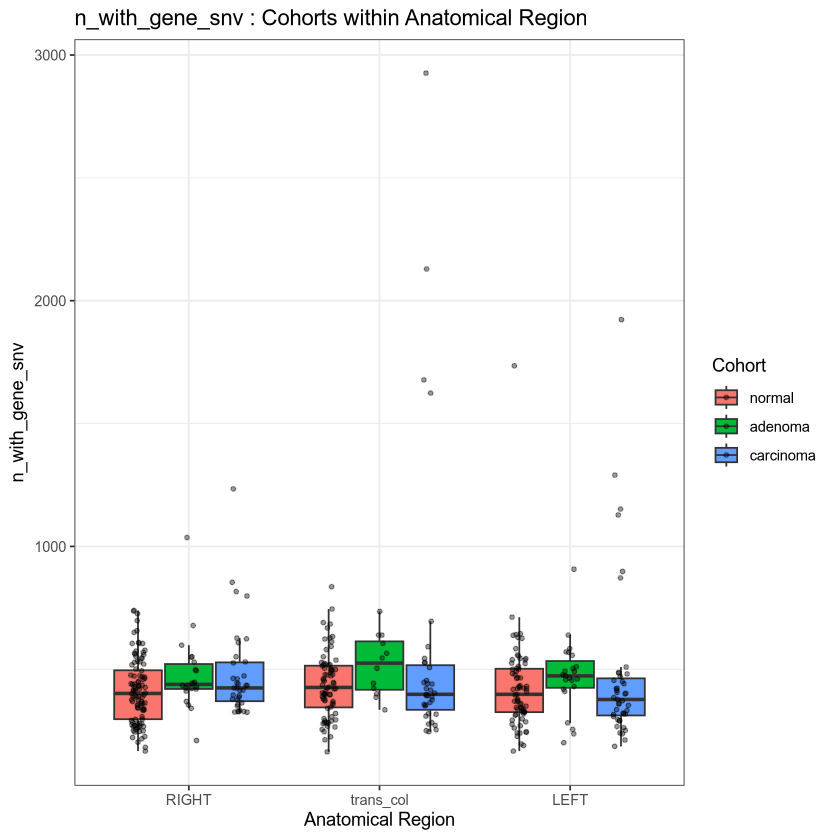

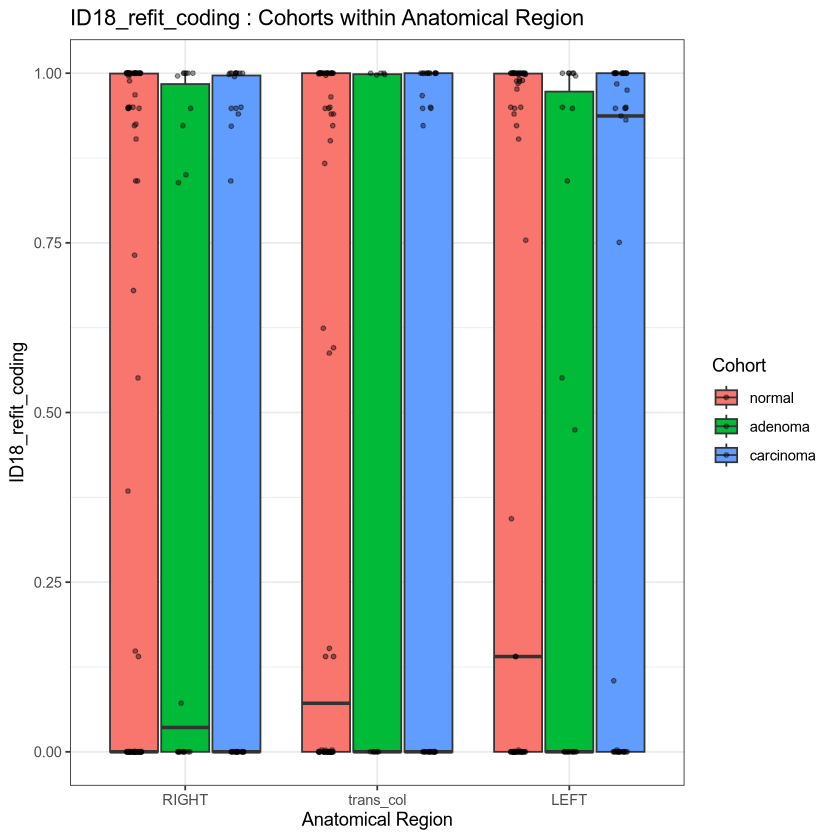

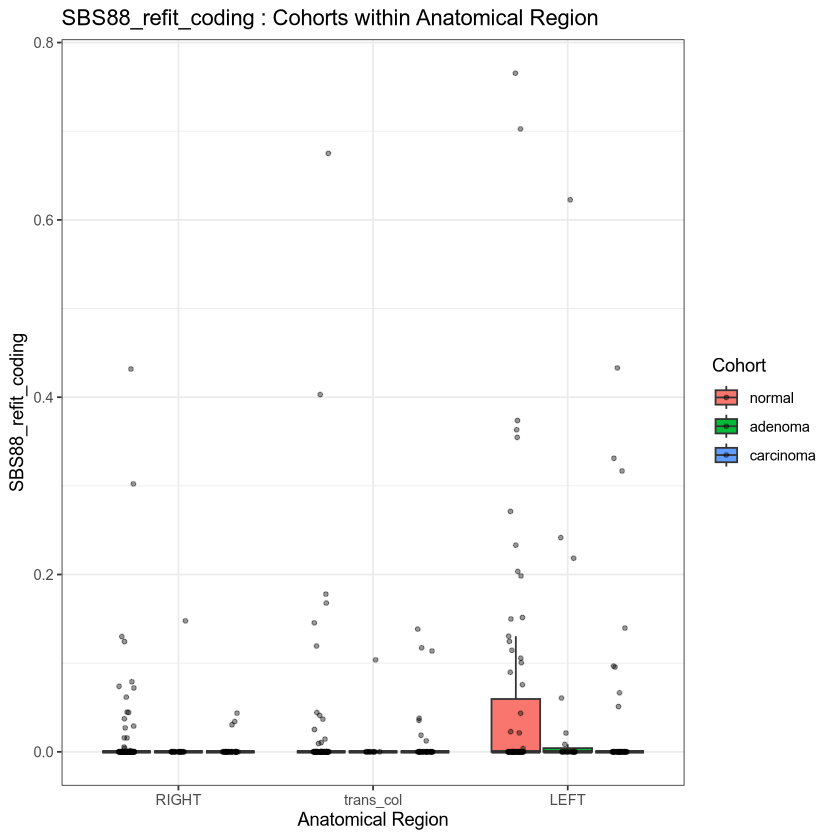

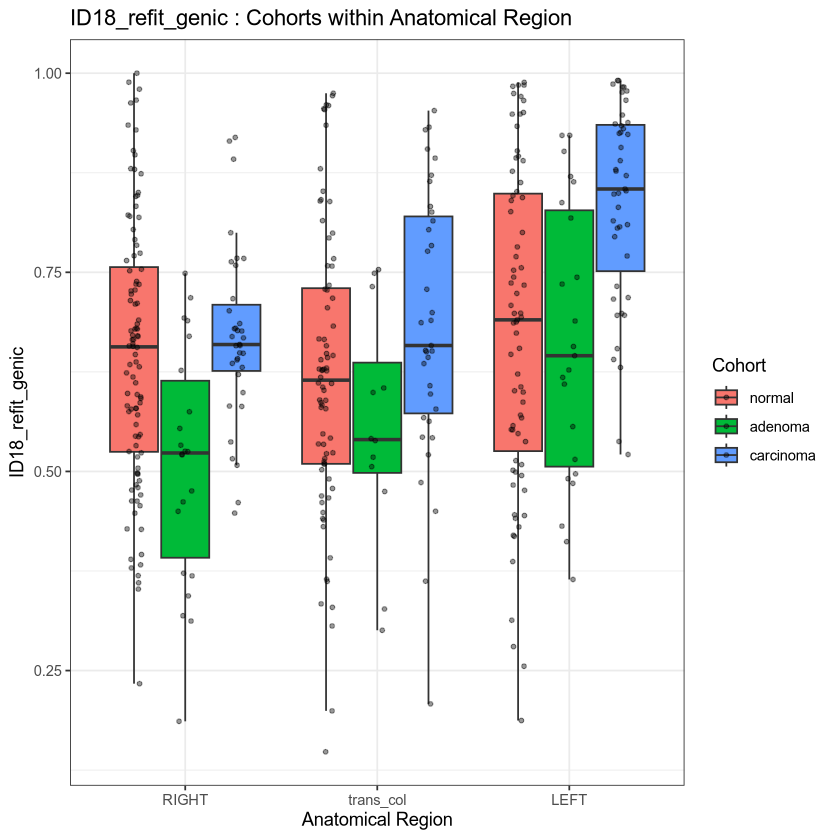

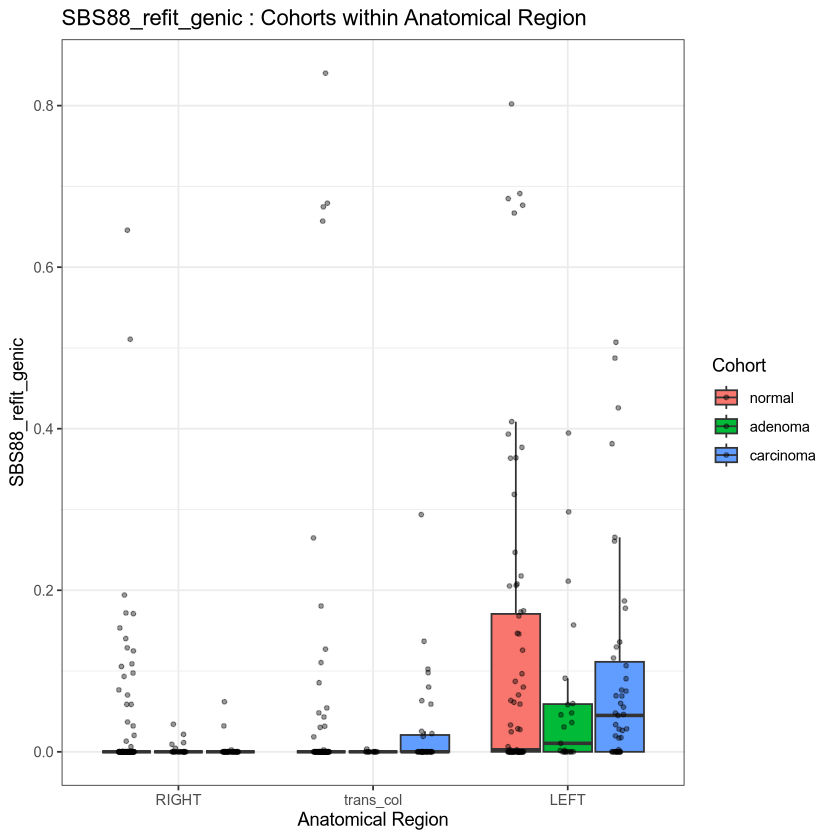

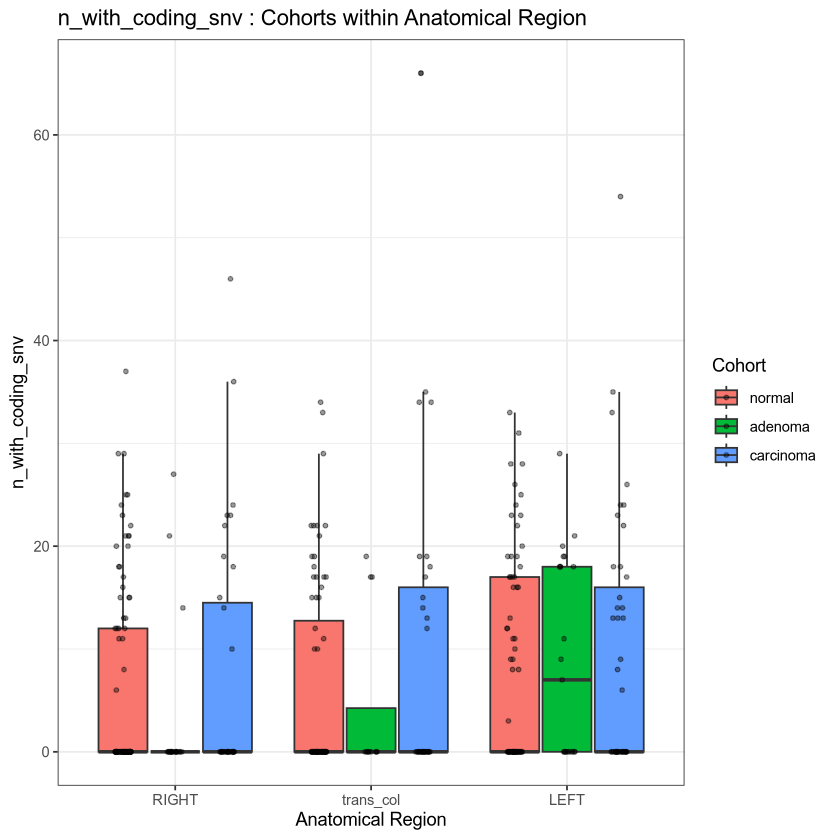

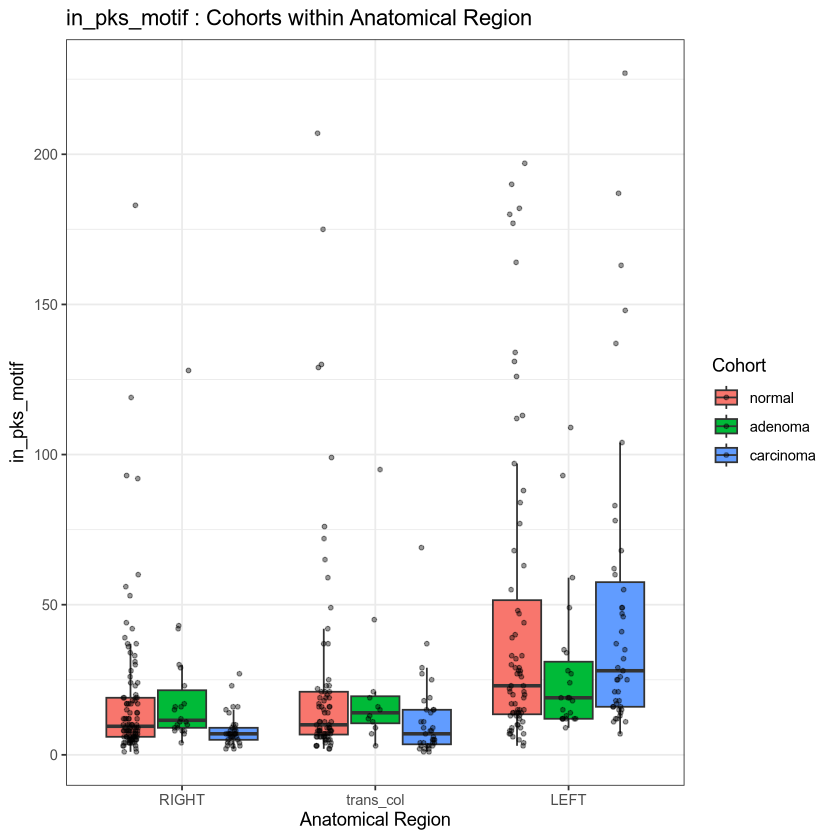

Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y

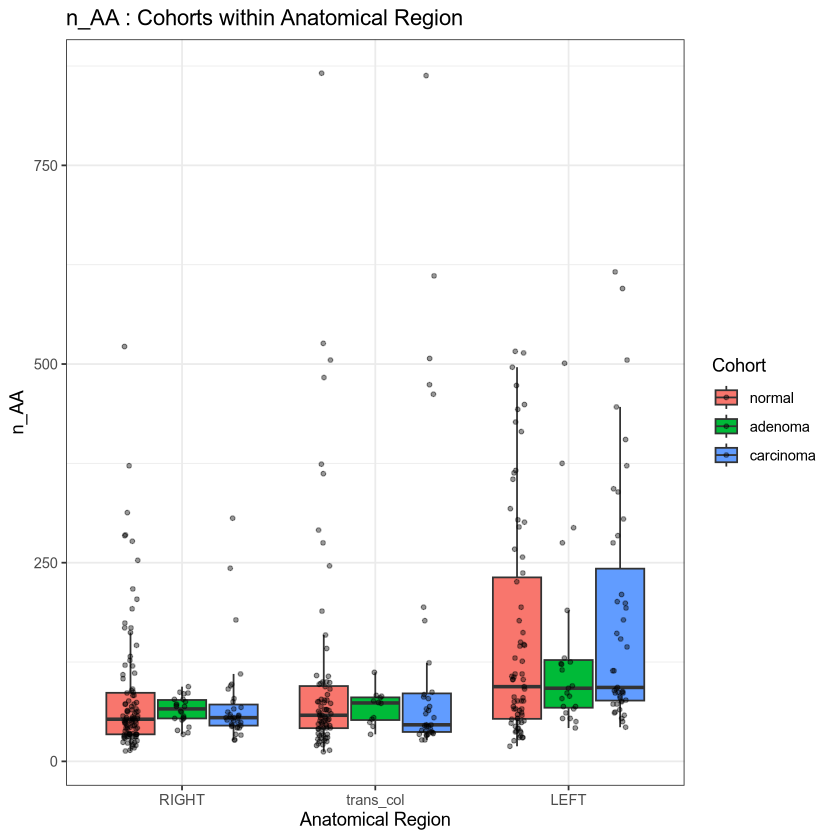

In [19]:
for (m in metrics) {

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(
      x = region_tri,
      y = .data[[m]],
      fill = cohort
    )
  ) +
    geom_boxplot(
      position = position_dodge(width = 0.8),
      outlier.shape = NA
    ) +
    geom_jitter(
      position = position_jitterdodge(
        jitter.width = 0.2,
        dodge.width = 0.8
      ),
      alpha = 0.4,
      size = 1
    ) +
    theme_bw() +
    labs(
      title = paste(m, ": Cohorts within Anatomical Region"),
      x = "Anatomical Region",
      y = m,
      fill = "Cohort"
    )

  print(p)
}

comparisons <- list(
  c("normal", "adenoma"),
  c("normal", "carcinoma"),
  c("adenoma", "carcinoma")
)

safe_wilcox <- function(df, metric, region, g1, g2) {

  x <- df %>% filter(region_tri == region, cohort == g1) %>% pull(metric)
  y <- df %>% filter(region_tri == region, cohort == g2) %>% pull(metric)

  x <- x[!is.na(x)]
  y <- y[!is.na(y)]

  if (length(x) < 1 || length(y) < 1) return(NULL)
  if (length(unique(c(x, y))) == 1) return(NULL)

  tibble(
    region_tri = region,
    group1 = g1,
    group2 = g2,
    p = wilcox.test(x, y)$p.value
  )
}



all_pvals <- bind_rows(
  map(metrics, function(m) {

    df <- combined_df %>%
      filter(coverage > 9) %>%
      select(region_tri, cohort, value = .data[[m]])

    expand_grid(
      region_tri = unique(df$region_tri),
      comp = comparisons
    ) %>%
      mutate(
        g1 = map_chr(comp, 1),
        g2 = map_chr(comp, 2)
      ) %>%
      pmap_dfr(~ safe_wilcox(df, "value", ..1, ..3, ..4)) %>%
      mutate(metric = m) %>%
      group_by(metric) %>%
      mutate(p.adj = p.adjust(p, method = "BH")) %>%
      ungroup()

  })
)


all_pvals <- all_pvals %>%
  select(
    metric,
    region_tri,
    group1,
    group2,
    p,
    p.adj
  ) %>%
  arrange(metric, region_tri, group1, group2)




In [46]:
combined_df <- combined_df %>%
  mutate(
    region_tri = case_when(
      region %in% c("Right", "cecum", "asc_col") ~ "RIGHT",
      region == "trans_col" ~ "trans_col",
      TRUE ~ "LEFT"
    ),
    region_tri = factor(
      region_tri,
      levels = c("RIGHT", "trans_col", "LEFT")))


In [20]:
all_pvals <- all_pvals %>%
  select(
    metric,
    region_tri,
    group1,
    group2,
    p,
    p.adj
  ) %>%
  arrange(metric, region_tri, group1, group2)

subset(all_pvals, p.adj < 0.05)

metric             region_tri group1  group2    p            p.adj       
1  ID18_refit_genic   RIGHT      adenoma carcinoma 2.506913e-04 0.0007520740
2  ID18_refit_genic   RIGHT      normal  adenoma   9.679890e-04 0.0021779753
3  ID18_refit_genic   trans_col  adenoma carcinoma 1.480787e-02 0.0266541618
4  ID18_refit_genic   LEFT       adenoma carcinoma 4.808297e-05 0.0002163734
5  ID18_refit_genic   LEFT       normal  carcinoma 4.163217e-05 0.0002163734
6  ID18_refit_perc    RIGHT      adenoma carcinoma 6.176738e-04 0.0018530215
7  ID18_refit_perc    RIGHT      normal  adenoma   1.014946e-03 0.0022836290
8  ID18_refit_perc    trans_col  adenoma carcinoma 2.034222e-03 0.0036615989
9  ID18_refit_perc    trans_col  normal  carcinoma 2.405720e-02 0.0360857953
10 ID18_refit_perc    LEFT       adenoma carcinoma 3.001638e-05 0.0002530596
11 ID18_refit_perc    LEFT       normal  carcinoma 5.623546e-05 0.0002530596
12 fraction_pksmotif  RIGHT      adenoma carcinoma 8.717759e-03 0.0261567551
13 fraction_pksmotif  trans_col  adenoma carcinoma 8.718918e-03 0.0261567551
14 fraction_pksmotif  trans_col  normal  carcinoma 2.589962e-02 0.0466193233
15 fraction_pksmotif  LEFT       adenoma carcinoma 6.560144e-03 0.0261567551
16 fraction_pksmotif  LEFT       normal  carcinoma 1.626925e-02 0.0366058157
17 in_pks_motif       RIGHT      adenoma carcinoma 7.415167e-05 0.0006673650
18 in_pks_motif       RIGHT      normal  carcinoma 5.112090e-03 0.0230044063
19 in_pks_motif       trans_col  normal  carcinoma 1.174403e-02 0.0352320872
20 total_indels       RIGHT      adenoma carcinoma 5.048997e-03 0.0151469913
21 total_indels       RIGHT      normal  carcinoma 7.737236e-04 0.0058702543
22 total_indels       trans_col  normal  carcinoma 1.304501e-03 0.0058702543
23 total_indels_genic RIGHT      adenoma carcinoma 1.050446e-02 0.0315133670
24 total_indels_genic RIGHT      adenoma carcinoma 1.050446e-02 0.0315133670
25 total_indels_genic RIGHT      normal  carcinoma 1.037961e-03 0.0093416463
26 total_indels_genic RIGHT      normal  carcinoma 1.037961e-03 0.0093416463
27 total_indels_genic trans_col  adenoma carcinoma 1.731286e-02 0.0389539447
28 total_indels_genic trans_col  adenoma carcinoma 1.731286e-02 0.0389539447
29 total_indels_genic trans_col  normal  carcinoma 3.288802e-03 0.0147996100
30 total_indels_genic trans_col  normal  carcinoma 3.288802e-03 0.0147996100

Saving the right plots...

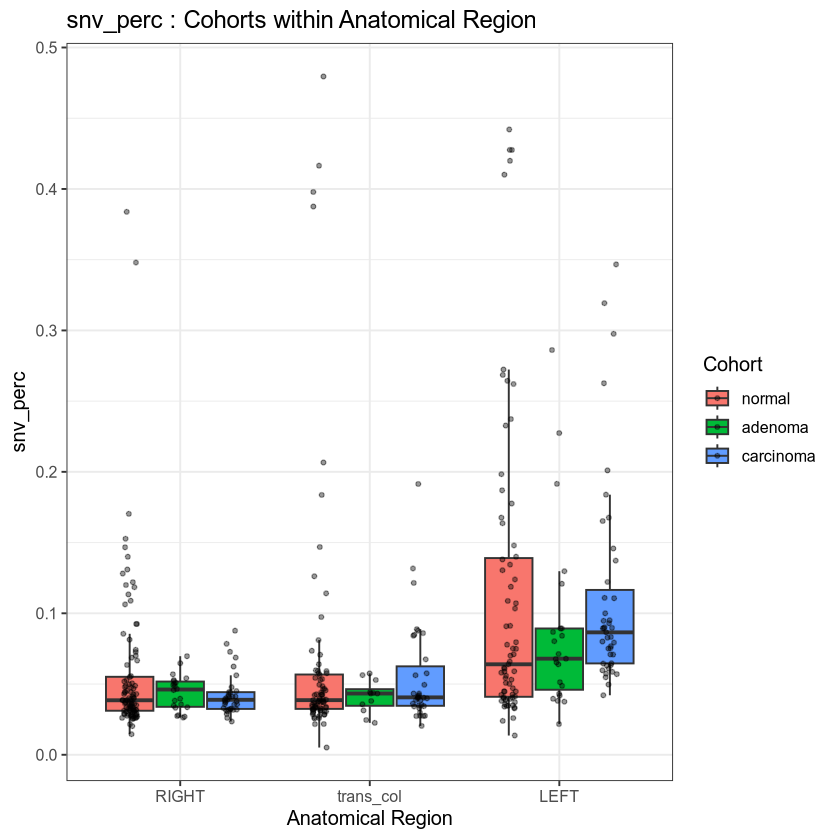

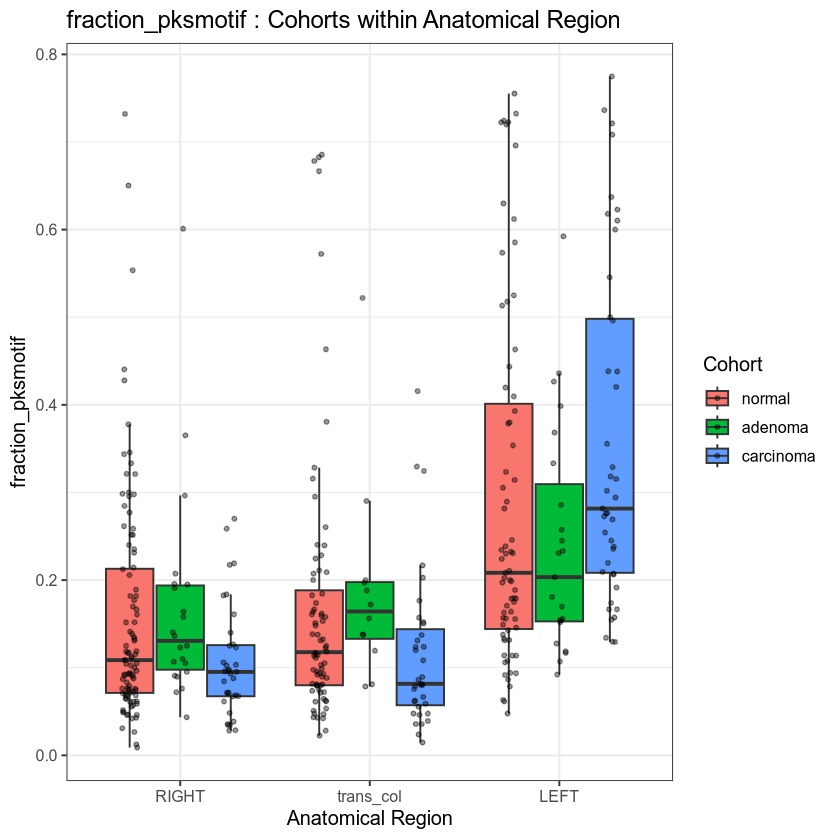

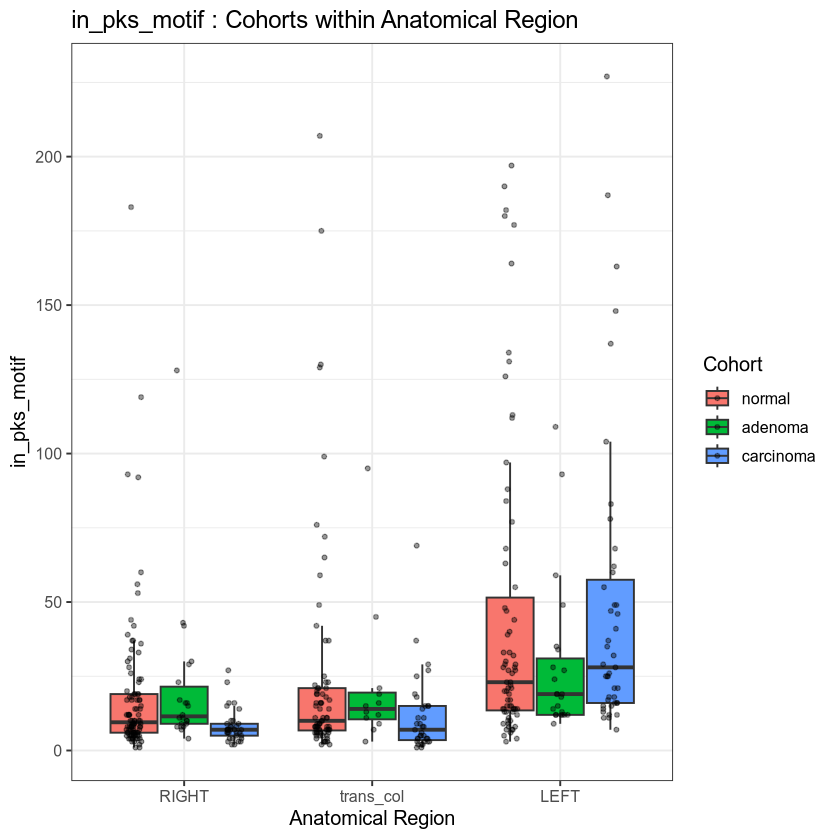

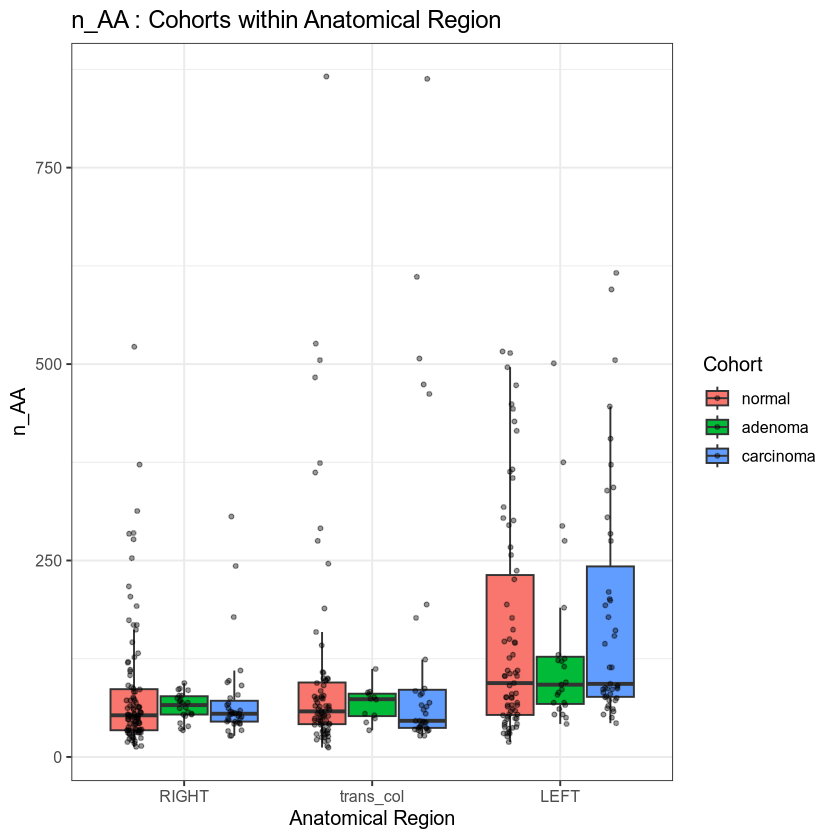

In [21]:
metrics_save <- c(
  "snv_perc", "fraction_pksmotif", "in_pks_motif", "n_AA"
)

for (m in metrics_save) {

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(
      x = region_tri,
      y = .data[[m]],
      fill = cohort
    )
  ) +
    geom_boxplot(
      position = position_dodge(width = 0.8),
      outlier.shape = NA
    ) +
    geom_jitter(
      position = position_jitterdodge(
        jitter.width = 0.2,
        dodge.width = 0.8
      ),
      alpha = 0.4,
      size = 1
    ) +
    theme_bw(base_size = 12) +
    labs(
      title = paste(m, ": Cohorts within Anatomical Region"),
      x = "Anatomical Region",
      y = m,
      fill = "Cohort"
    )

  print(p)

  # ----------------------------
  # Save plot
  # ----------------------------
  ggsave(
    filename = paste0(m, "_by_region.svg"),
    plot = p,
    width = 10,
    height = 8,
    dpi = 300
  )
}


In [ ]:
map(metrics, function(m) {
  combined_df %>%
    filter(coverage > 9, !is.na(.data[[m]])) %>%
    count(region_tri, cohort) %>%
    mutate(metric = m)
})


In [ ]:
metrics_brief <- c("n_AA", "in_pks_motif", "SBS88", "ID18", "SBS89", "SBS5")

plot_df <- subset(combined_df, combined_df$age > 35) %>%
  pivot_longer(
    cols = all_of(metrics_brief),
    names_to = "metrics_brief",
    values_to = "value"
  )

p <- ggplot(
  plot_df,
  aes(x = age, y = value, color = cohort)
) +
  geom_point(alpha = 0.6, size = 2) +

  geom_smooth(
    method = "loess",
    se = TRUE,
    linewidth = 1
  ) +

  facet_wrap(~ metrics_brief, scales = "free_y", ncol = 2) +

  labs(
    x = "Age",
    y = "Value",
    color = "Cohort"
  ) +

  theme_bw(base_size = 13) +
  theme(
    legend.position = "bottom",
    strip.text = element_text(face = "bold")
  )

print(p)


In [ ]:
colnames(combined_df)

In [ ]:
metrics_brief <- c("SBS1", "SBS5", "SBS88", "SBS40a", "ID1", "ID2", "ID18", "SBS89")

plot_df <- combined_df %>%
  pivot_longer(
    cols = all_of(metrics_brief),
    names_to = "metrics_brief",
    values_to = "value"
  )

p <- ggplot(
  plot_df,
  aes(x = age, y = value, color = region_tri)
) +
  geom_point(alpha = 0.6, size = 2) +

  geom_smooth(
    method = "loess",
    se = TRUE,
    linewidth = 1
  ) +

  facet_wrap(~ metrics_brief, scales = "free_y", ncol = 2) +

  labs(
    x = "Age",
    y = "Value",
    color = "Region_tri"
  ) +

  theme_bw(base_size = 13) +
  theme(
    legend.position = "bottom",
    strip.text = element_text(face = "bold")
  )

print(p)

Diaz-Gay figure inspired these 

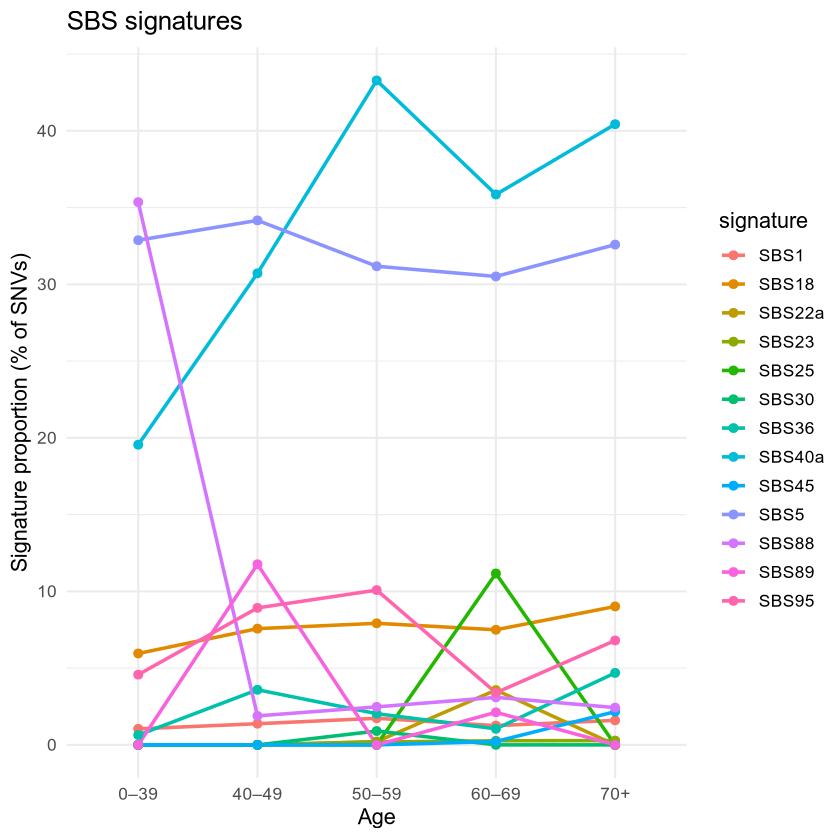

In [31]:
combined_df <- combined_df %>%
  mutate(
    age_bin = cut(
      age,
      breaks = c(0, 40, 50, 60, 70, Inf),
      labels = c("0–39", "40–49", "50–59", "60–69", "70+"),
      right = FALSE
    )
  )
sbs_sigs <- c(
  "SBS1","SBS5","SBS18","SBS22a","SBS23","SBS25",
  "SBS30","SBS36","SBS40a","SBS45","SBS88",
  "SBS89","SBS95"
)

sbs_df <- combined_df %>%
  pivot_longer(
    cols = all_of(sbs_sigs),
    names_to = "signature",
    values_to = "count"
  ) %>%
  group_by(age_bin, signature) %>%
  summarise(
    sig_count = sum(count, na.rm = TRUE),
    total_SNVs = sum(unique_SNVs, na.rm = TRUE),
    prevalence = sig_count / total_SNVs * 100,
    .groups = "drop"
  )
ggplot(sbs_df, aes(
  x = age_bin,
  y = prevalence,
  group = signature,
  color = signature
)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  labs(
    title = "SBS signatures",
    x = "Age",
    y = "Signature proportion (% of SNVs)"
  ) +
  theme_minimal(base_size = 13)

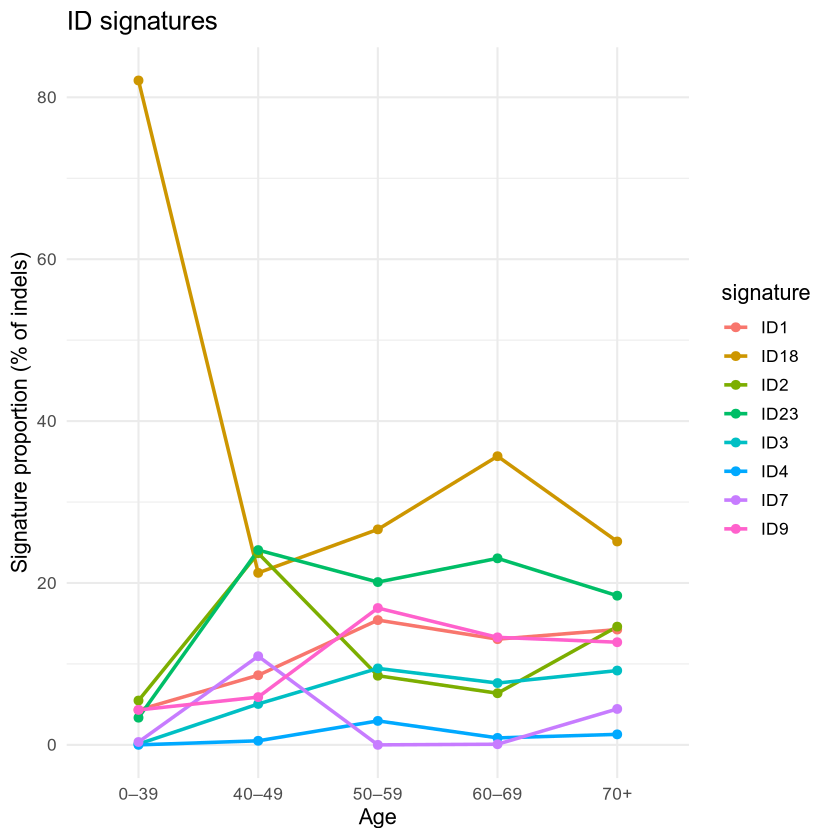

In [32]:
id_sigs <- c(
  "ID1","ID2","ID3","ID4","ID7","ID9","ID18","ID23"
)

id_df <- combined_df %>%
  pivot_longer(
    cols = all_of(id_sigs),
    names_to = "signature",
    values_to = "count"
  ) %>%
  group_by(age_bin, signature) %>%
  summarise(
    sig_count = sum(count, na.rm = TRUE),
    total_indels = sum(total_indels, na.rm = TRUE),
    prevalence = sig_count / total_indels * 100,
    .groups = "drop"
  )

ggplot(id_df, aes(
  x = age_bin,
  y = prevalence,
  group = signature,
  color = signature
)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  labs(
    title = "ID signatures",
    x = "Age",
    y = "Signature proportion (% of indels)"
  ) +
  theme_minimal(base_size = 13)


now for actual prevalence rather than proportion

In [9]:
combined_df <- combined_df %>%
  mutate(across(
    all_of(c(sbs_sigs, id_sigs)),
    ~ ifelse(.x > 0, 1, 0)
  ))
sbs_prev_df <- combined_df %>%
  pivot_longer(
    cols = all_of(sbs_sigs),
    names_to = "signature",
    values_to = "present"
  ) %>%
  group_by(age_bin, signature) %>%
  summarise(
    prevalence = mean(present, na.rm = TRUE) * 100,
    n_samples = n(),
    .groups = "drop"
  )
id_prev_df <- combined_df %>%
  pivot_longer(
    cols = all_of(id_sigs),
    names_to = "signature",
    values_to = "present"
  ) %>%
  group_by(age_bin, signature) %>%
  summarise(
    prevalence = mean(present, na.rm = TRUE) * 100,
    n_samples = n(),
    .groups = "drop"
  )


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `across(all_of(c(sbs_sigs, id_sigs)), ~ifelse(.x > 0, 1,
  0))`.
[1mCaused by error in `across()`:[22m
[1m[22m[36mℹ[39m In argument: `all_of(c(sbs_sigs, id_sigs))`.
[1mCaused by error:[22m
[33m![39m object 'sbs_sigs' not found


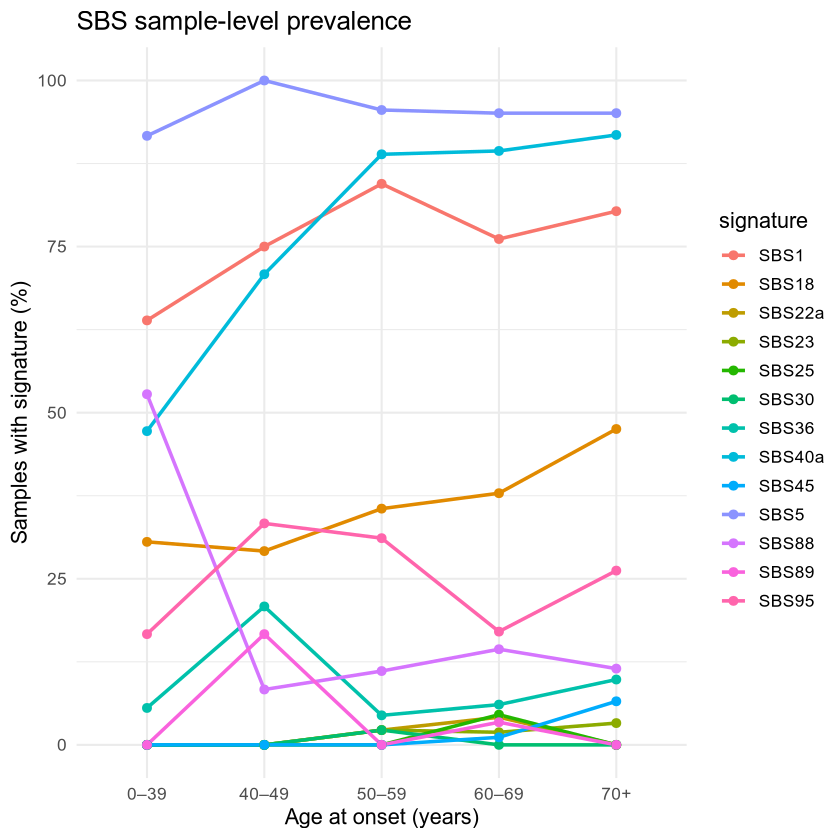

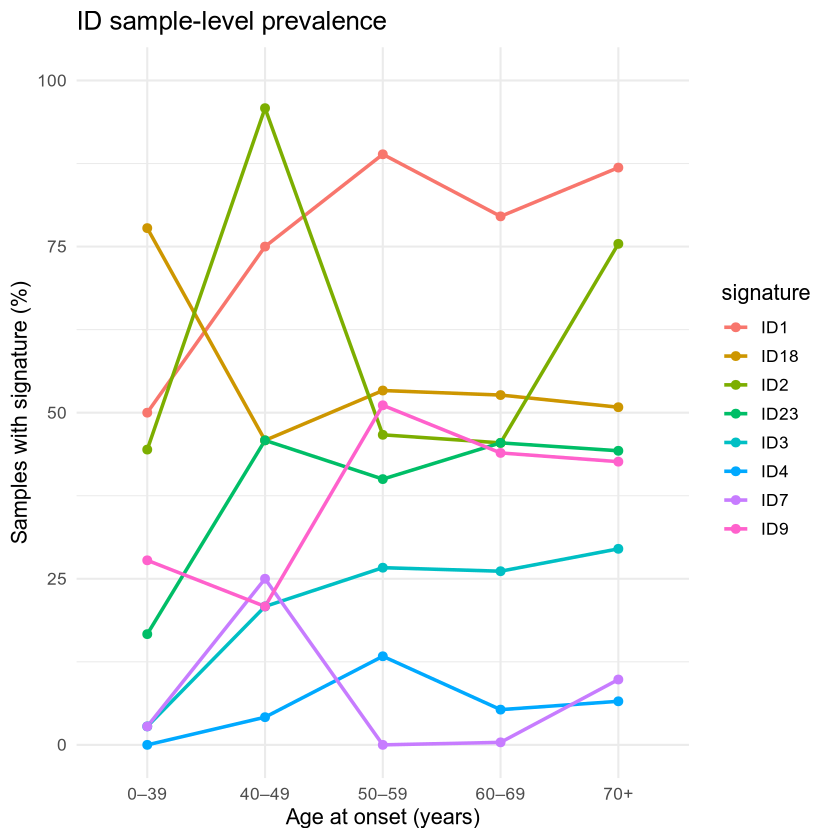

In [34]:
ggplot(sbs_prev_df, aes(
  x = age_bin,
  y = prevalence,
  group = signature,
  color = signature
)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  scale_y_continuous(limits = c(0, 100)) +
  labs(
    title = "SBS sample-level prevalence",
    x = "Age at onset (years)",
    y = "Samples with signature (%)"
  ) +
  theme_minimal(base_size = 13)

ggplot(id_prev_df, aes(
  x = age_bin,
  y = prevalence,
  group = signature,
  color = signature
)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  scale_y_continuous(limits = c(0, 100)) +
  labs(
    title = "ID sample-level prevalence",
    x = "Age at onset (years)",
    y = "Samples with signature (%)"
  ) +
  theme_minimal(base_size = 13)


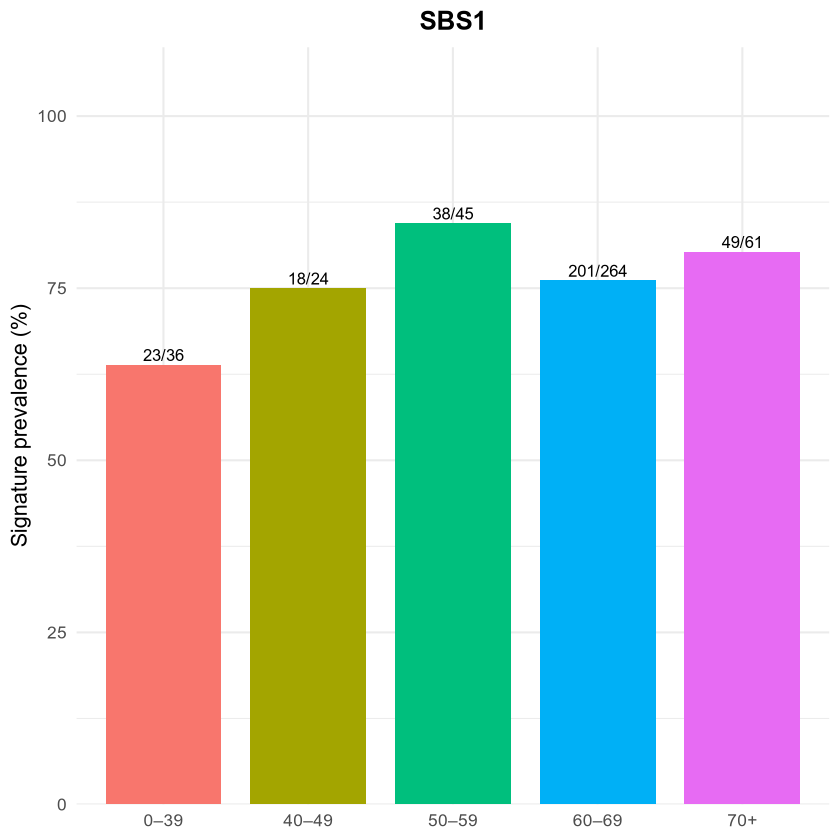

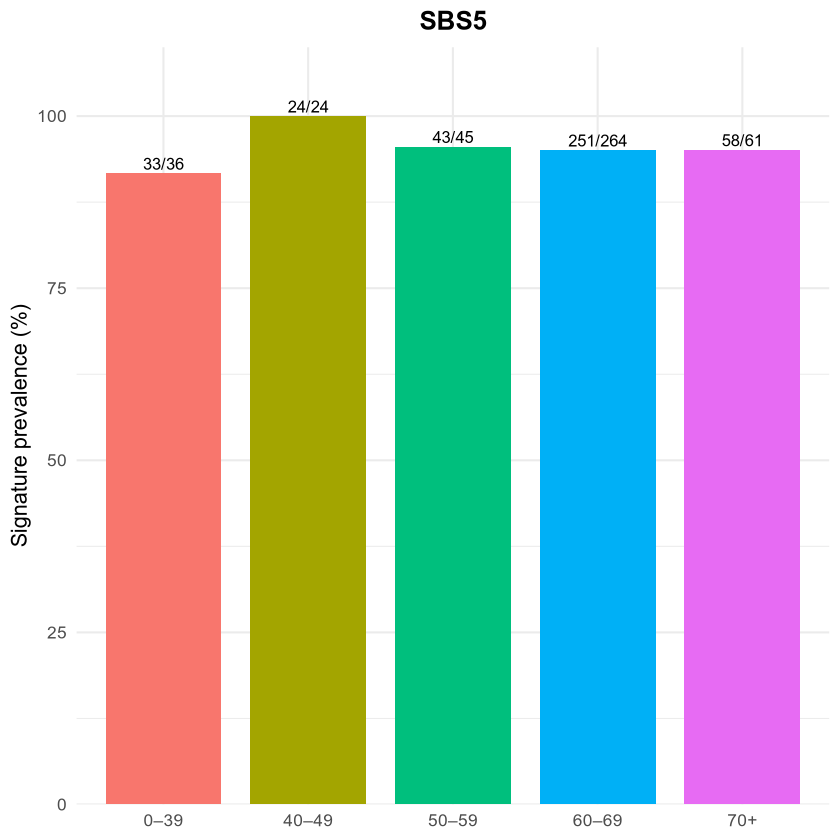

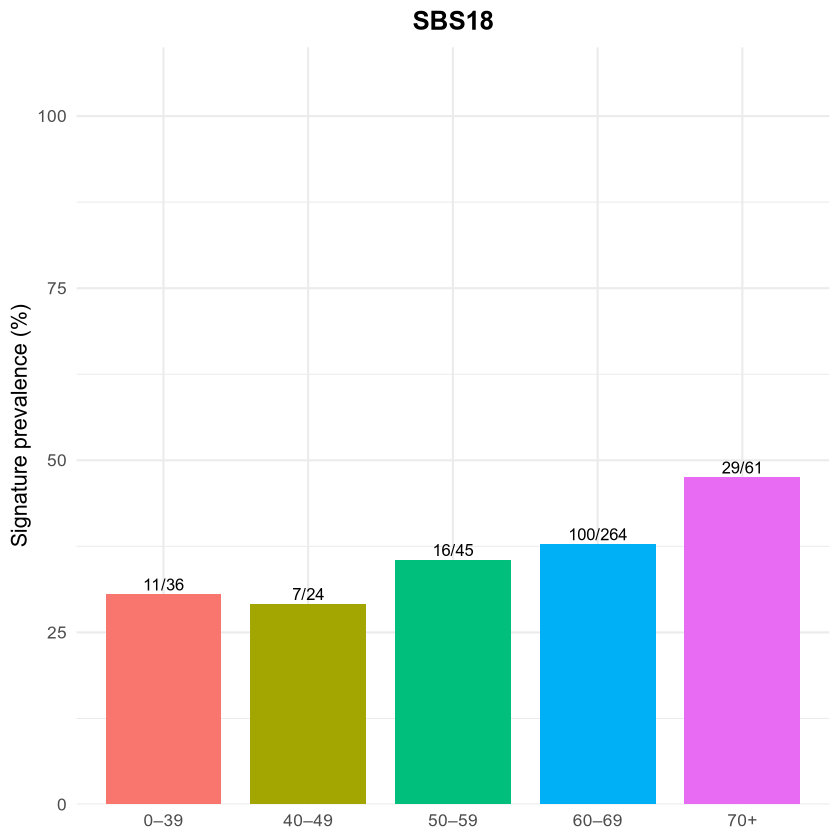

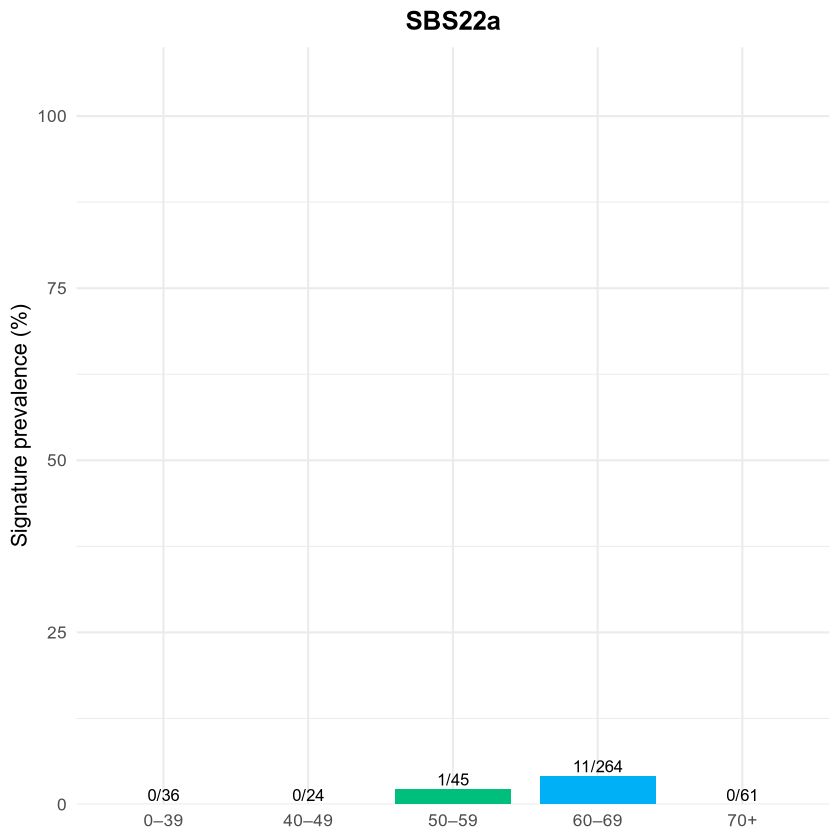

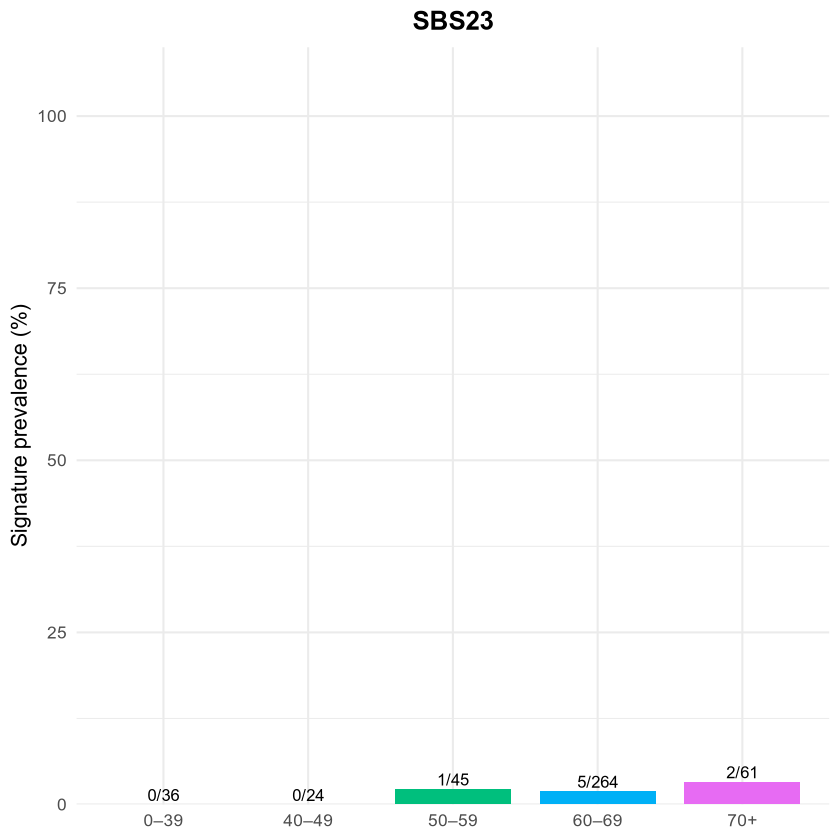

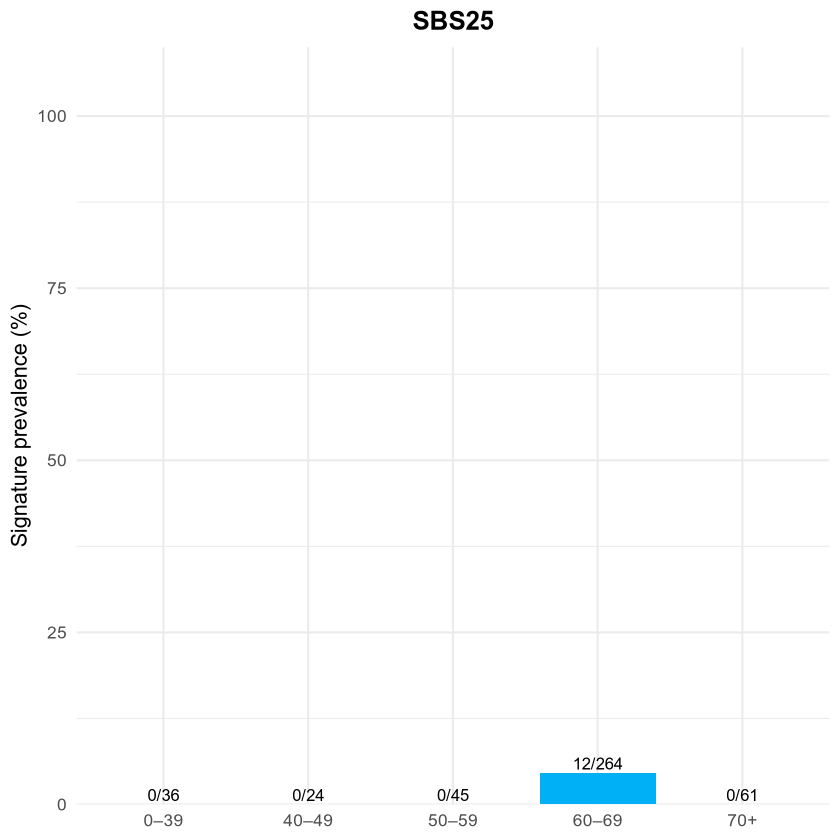

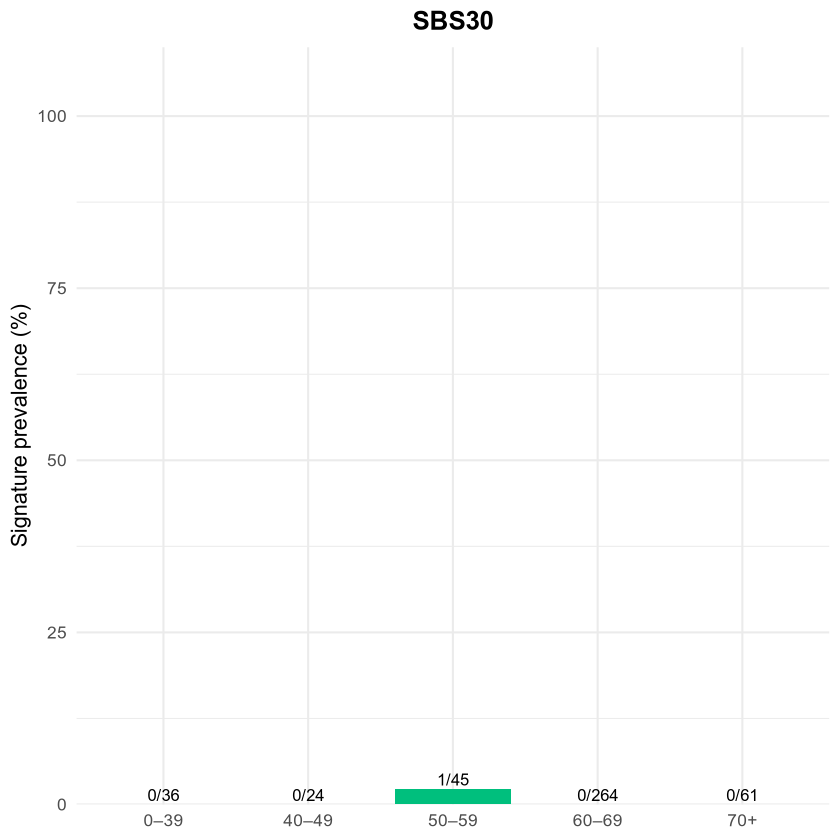

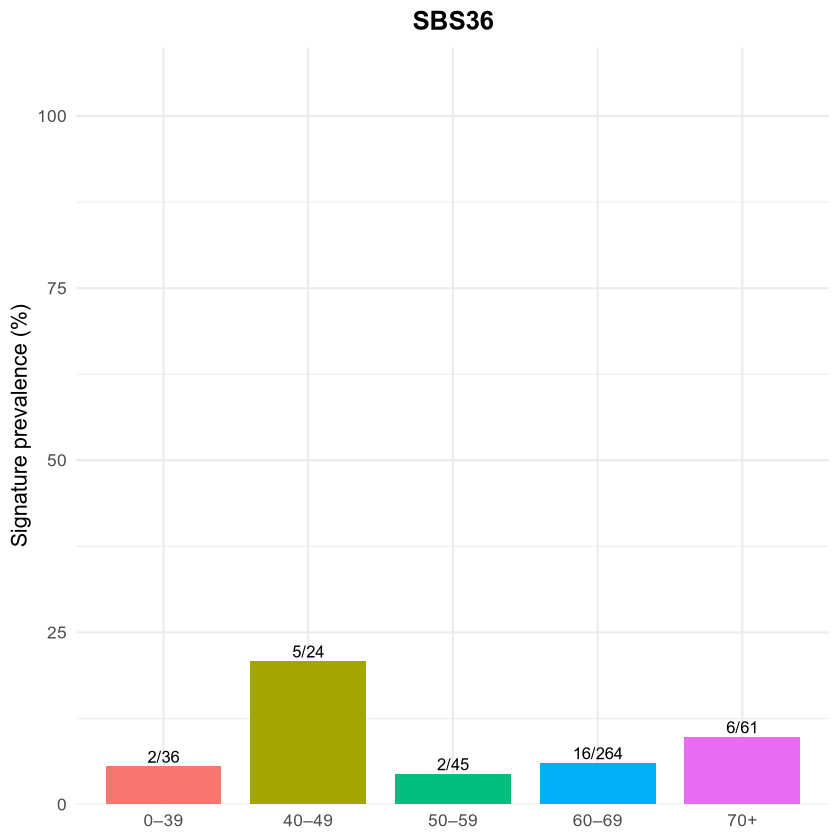

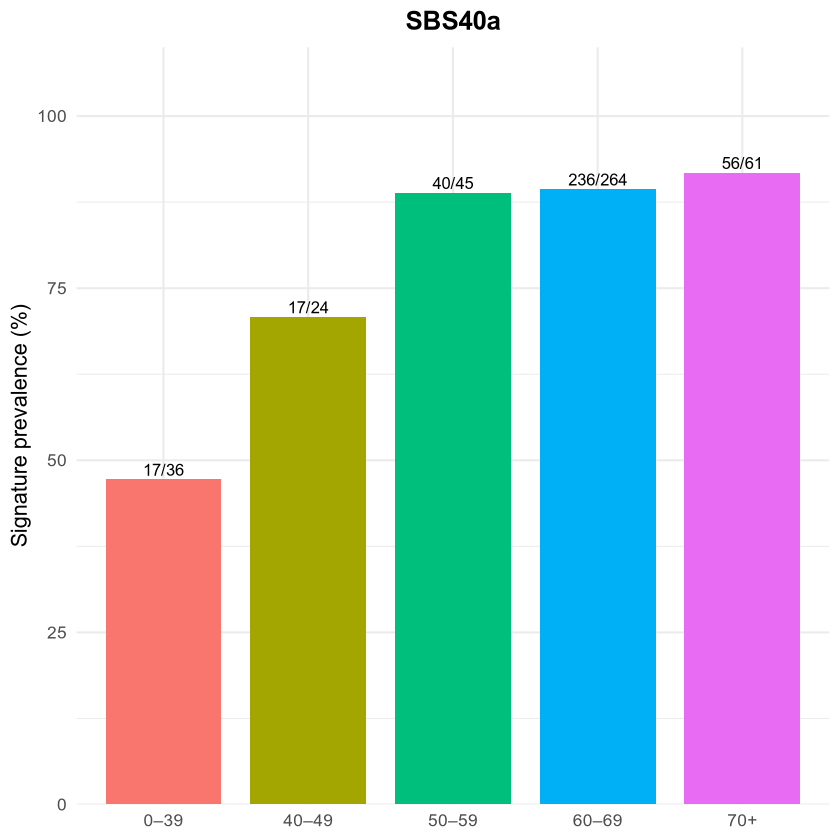

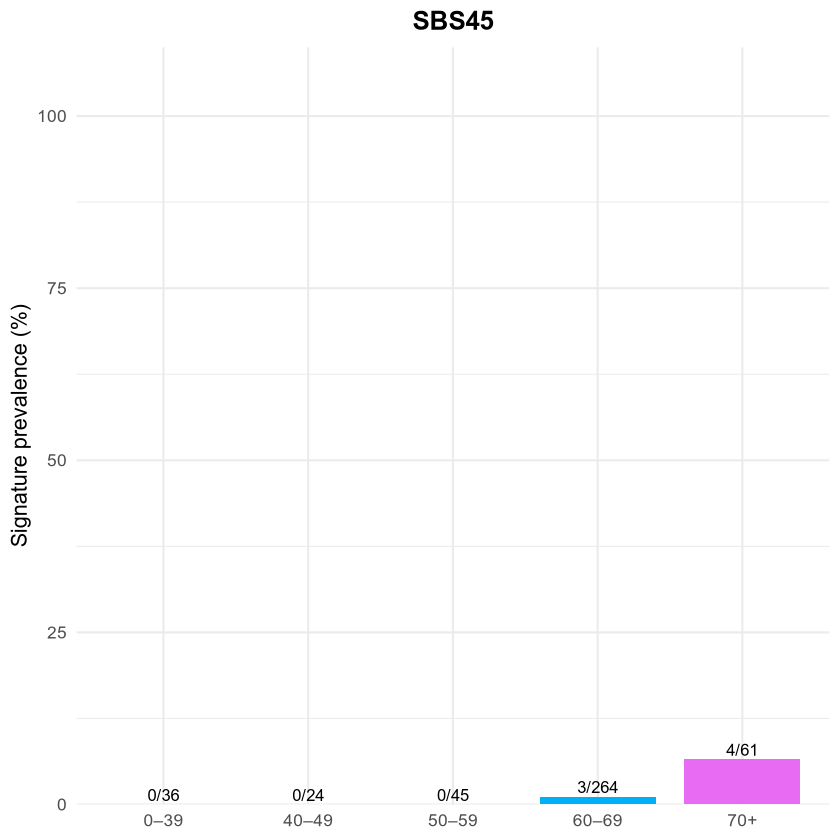

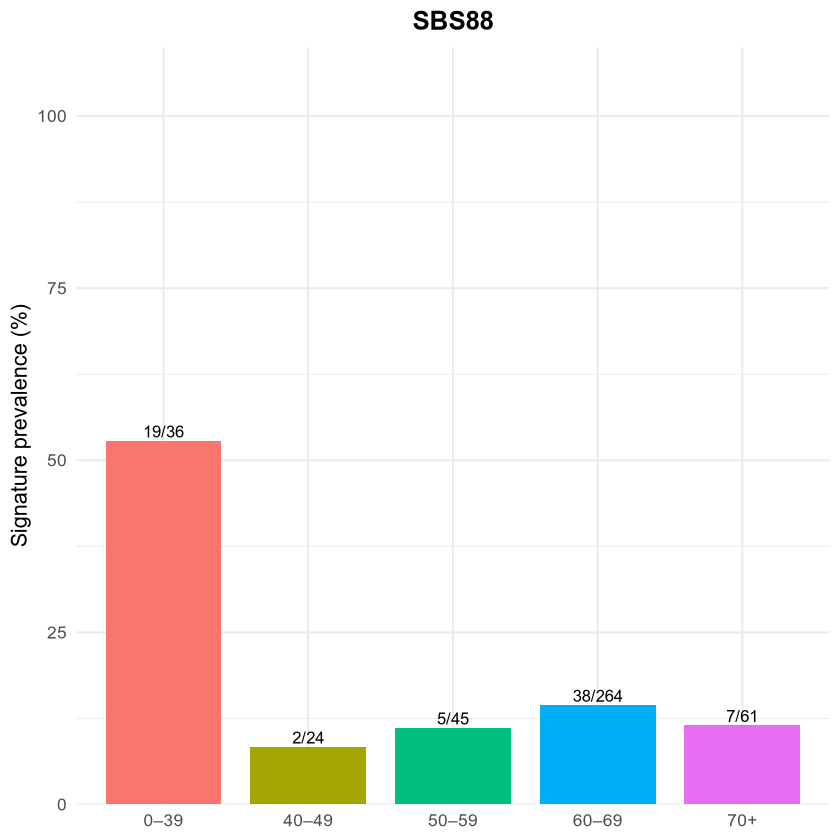

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]


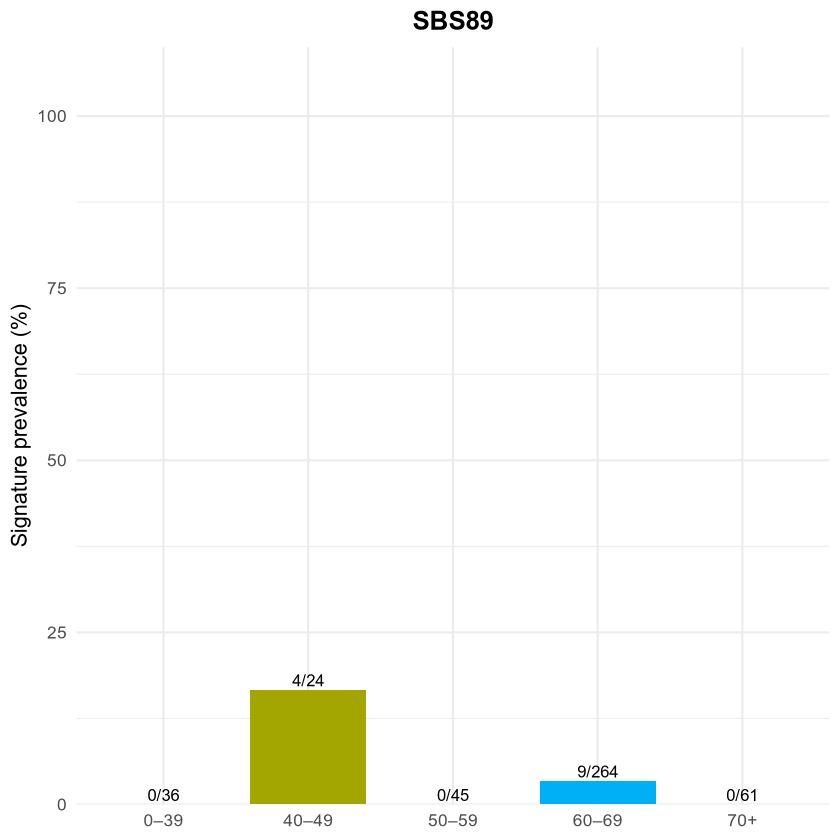

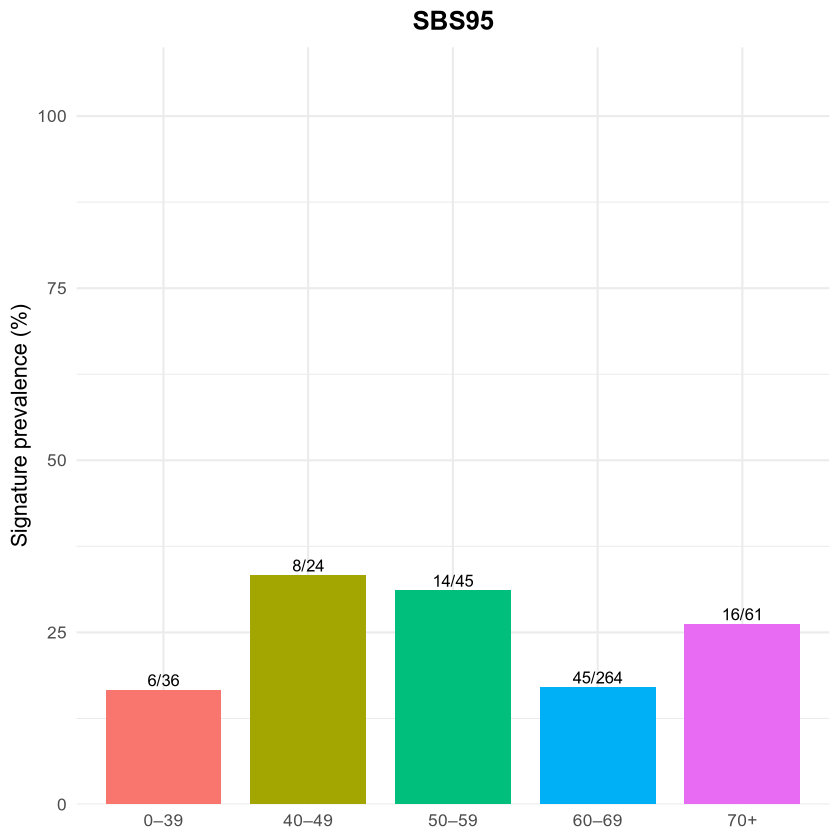

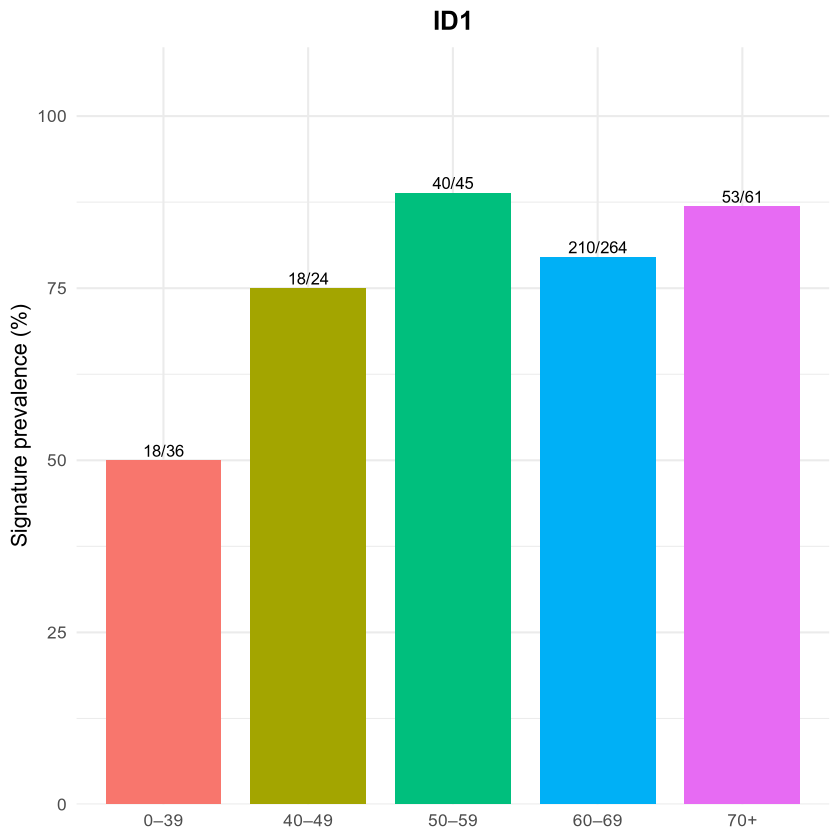

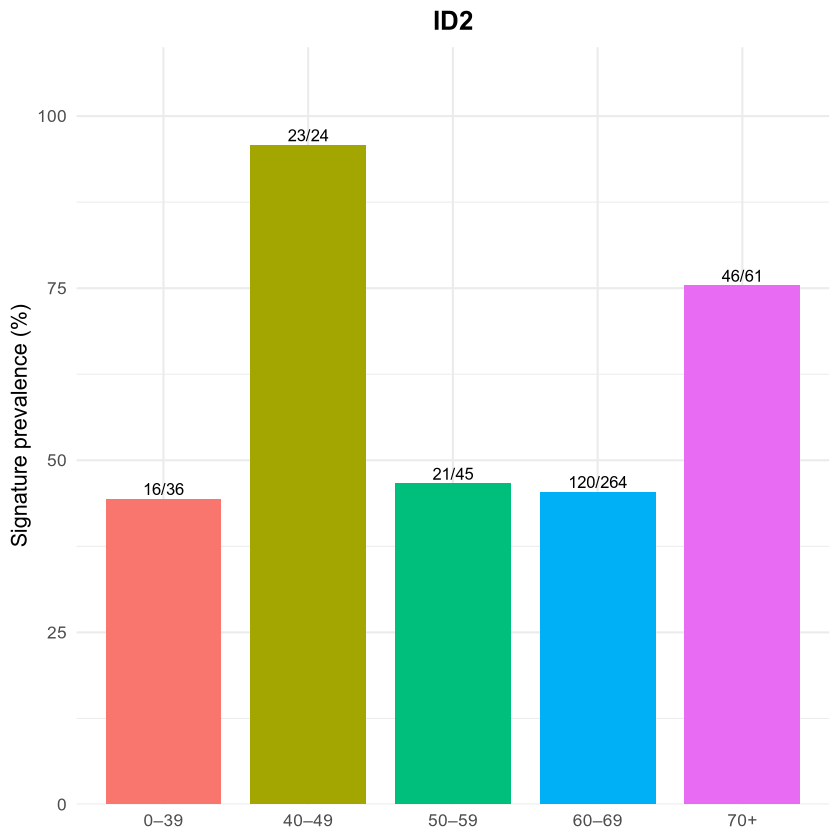

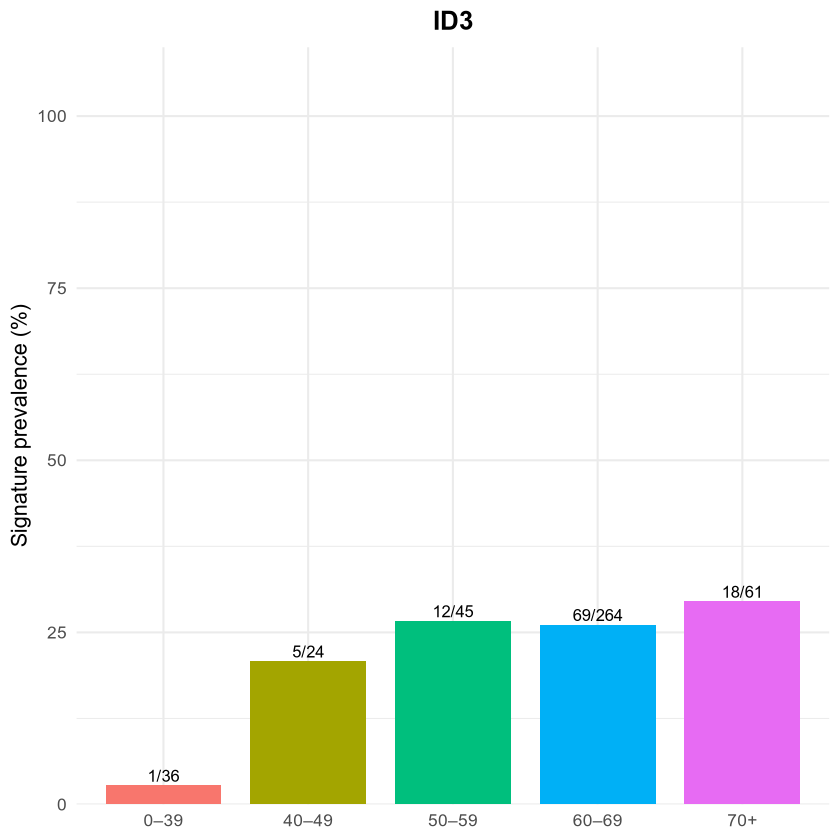

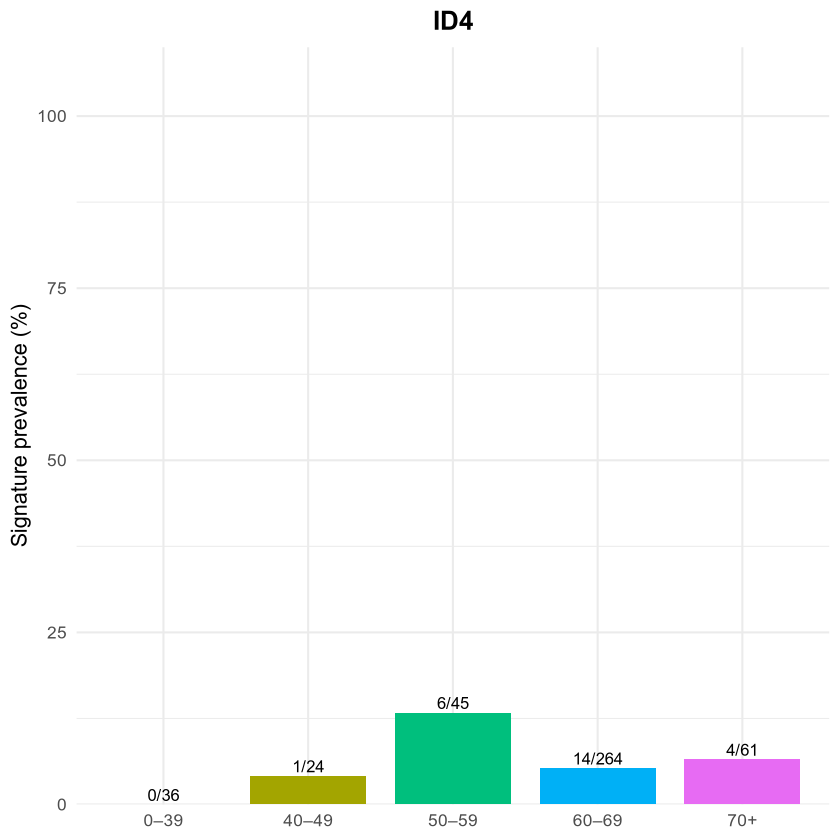

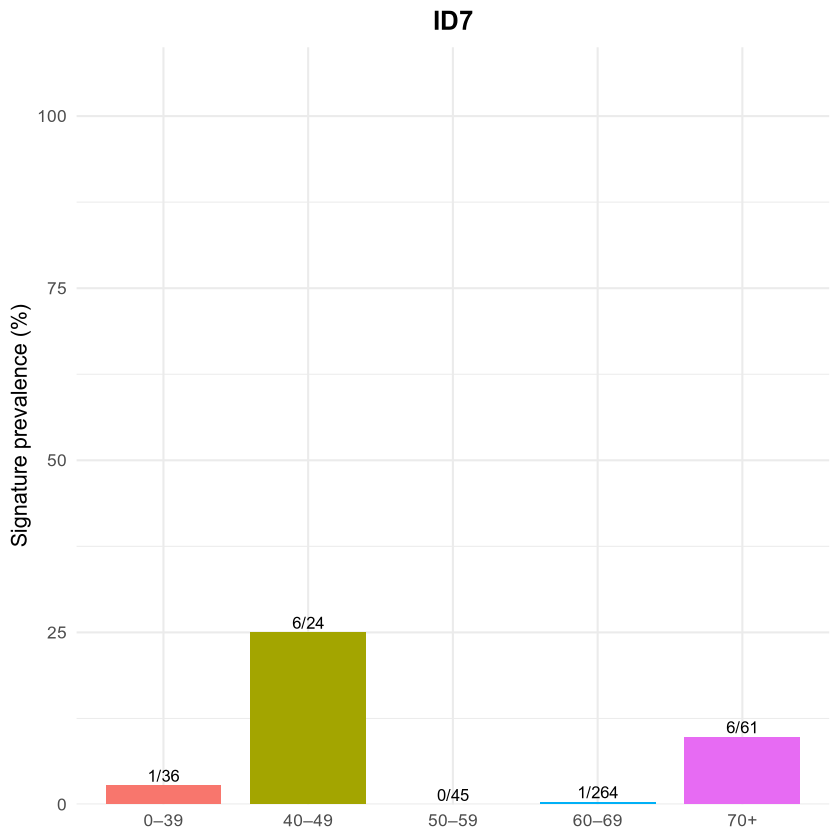

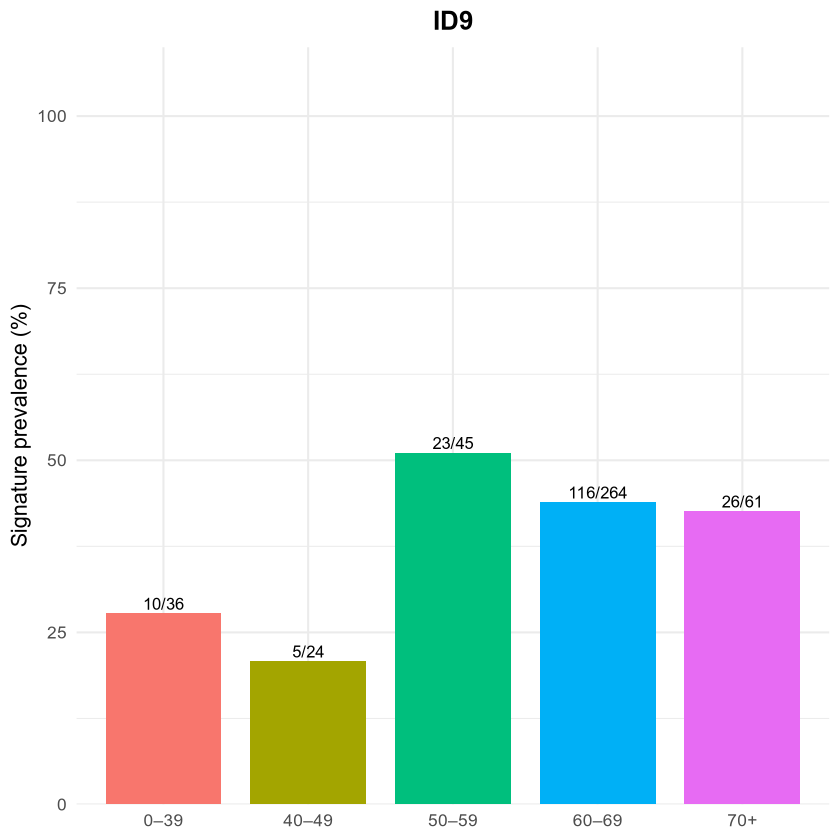

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


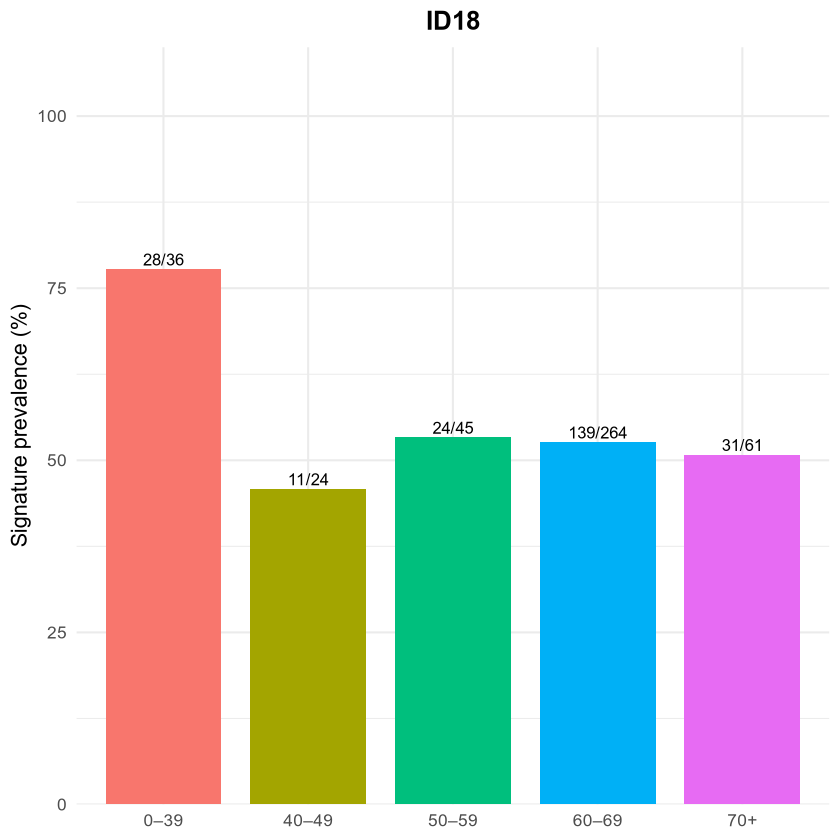

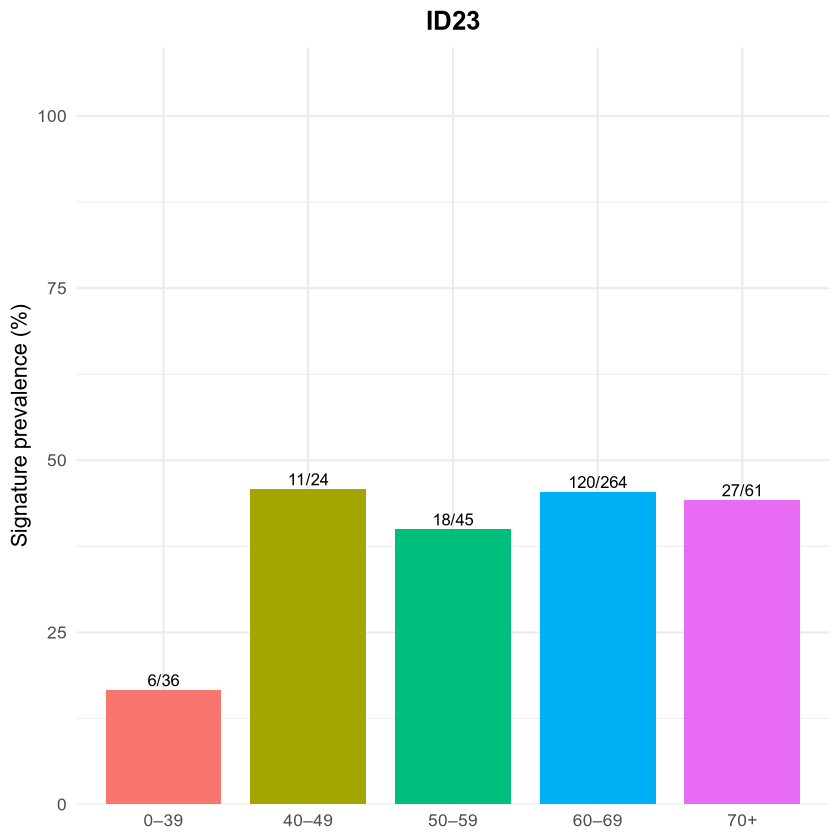

In [35]:
combined_df <- combined_df %>%
  mutate(across(
    all_of(c(sbs_sigs, id_sigs)),
    ~ as.integer(.x > 0)
  ))

  prev_long <- combined_df %>%
  pivot_longer(
    cols = all_of(c(sbs_sigs, id_sigs)),
    names_to = "signature",
    values_to = "present"
  ) %>%
  group_by(signature, age_bin) %>%
  summarise(
    n_present = sum(present, na.rm = TRUE),
    n_total   = n(),
    prevalence = n_present / n_total * 100,
    .groups = "drop"
  )

plot_signature_prevalence <- function(df, sig) {

  df_sig <- df %>% filter(signature == sig)

  ggplot(df_sig, aes(x = age_bin, y = prevalence, fill = age_bin)) +
    geom_col(width = 0.8) +
    geom_text(
      aes(label = paste0(n_present, "/", n_total)),
      vjust = -0.3,
      size = 3.5
    ) +
    scale_y_continuous(
      limits = c(0, 100),
      expand = expansion(mult = c(0, 0.1))
    ) +
    labs(
      title = sig,
      x = NULL,
      y = "Signature prevalence (%)"
    ) +
    theme_minimal(base_size = 13) +
    theme(
      legend.position = "none",
      plot.title = element_text(face = "bold", hjust = 0.5)
    )
}

sbs_plots <- lapply(sbs_sigs, function(sig) {
  plot_signature_prevalence(prev_long, sig)
})

id_plots <- lapply(id_sigs, function(sig) {
  plot_signature_prevalence(prev_long, sig)
})

sbs_plots

id_plots
